In [482]:
#importing 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
#from matplotlib import style
import pickle

In [483]:
#style.use("ggplot")

In [484]:
data = pd.read_csv("student-mat.csv", sep=";")
#Reading our csv file and since our data is seperated by semicolons we need to use (sep = ";")

In [485]:
data = data.dropna()

In [486]:
data.head(1000)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [487]:
#data = pd.get_dummies(data, dummy_na=True)

In [488]:
data = pd.get_dummies(data)

In [489]:
data.head(100)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15,1,1,2,4,1,3,1,2,1,...,0,1,0,1,0,1,0,1,1,0
96,16,4,3,2,1,0,3,3,3,1,...,0,1,1,0,0,1,0,1,1,0
97,16,2,1,1,2,0,4,3,5,1,...,1,0,0,1,0,1,1,0,0,1
98,16,4,4,1,1,0,5,3,4,1,...,0,1,1,0,0,1,0,1,1,0


In [490]:
#Label final grade. This is the value we would like to predict.
predict = "studytime"

In [491]:
#selecting features to predic label
#data = data[["G1", "G2","studytime","G3","freetime","traveltime","failures"]]
#data = shuffle(data) 

In [492]:
data.head(100)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15,1,1,2,4,1,3,1,2,1,...,0,1,0,1,0,1,0,1,1,0
96,16,4,3,2,1,0,3,3,3,1,...,0,1,1,0,0,1,0,1,1,0
97,16,2,1,1,2,0,4,3,5,1,...,1,0,0,1,0,1,1,0,0,1
98,16,4,4,1,1,0,5,3,4,1,...,0,1,1,0,0,1,0,1,1,0


In [493]:
x = np.array(data.drop([predict], 1)) # Features needed in an array and dropping G3.
y =np.array(data[predict]) # Labels

In [494]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
#Implementing the Model
best = 0
for _ in range(50000):
    #splitting our dataset into train and test
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        #Using pickele to save our best model
        with open("studentstudytime.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.17962707012243884
Accuracy: 0.04891987365704986
Accuracy: 0.2664278199589706
Accuracy: 0.11645386281401603
Accuracy: -0.11902092546037402
Accuracy: -0.04529155836655541
Accuracy: 0.17611812350216205
Accuracy: 0.11854621079326522
Accuracy: 0.11999479270280555
Accuracy: 0.09317462050280335
Accuracy: -0.01795947507101414
Accuracy: -0.04486085666174233
Accuracy: -0.33766609511010315
Accuracy: 0.27802299914219475
Accuracy: 0.12354056629133814
Accuracy: -0.07642889850669432
Accuracy: 0.019693546872684875
Accuracy: 0.19662325043168116
Accuracy: 0.2256090154268502
Accuracy: 0.19619312343586762
Accuracy: 0.1621056486740996
Accuracy: -0.030673887035560288
Accuracy: -0.21337147512796406
Accuracy: 0.09381716747495916
Accuracy: -0.03163757324218741
Accuracy: 0.33028396667429694
Accuracy: -0.1278479027387207
Accuracy: 0.09527195738507566
Accuracy: 0.12183048484713843
Accuracy: 0.03886826720627612
Accuracy: 0.1245856793801039
Accuracy: 0.10351808179299336
Accuracy: -0.2556886245019194
Acc

Accuracy: 0.10154317887648234
Accuracy: -0.3558818060678295
Accuracy: -0.05122380705815743
Accuracy: -0.08987553678694638
Accuracy: -0.11152333290669693
Accuracy: 0.26936390984046454
Accuracy: 0.009287616298413015
Accuracy: 0.06414392300489713
Accuracy: 0.18592885208521112
Accuracy: -0.02723389895011974
Accuracy: 0.039060755488359744
Accuracy: 0.24700341527642053
Accuracy: 0.0689305484270839
Accuracy: 0.18531434288270532
Accuracy: 0.21923488093175925
Accuracy: -0.2232514268781509
Accuracy: 0.04209108659219396
Accuracy: 0.01321581734073174
Accuracy: 0.07159910320170437
Accuracy: 0.1319309472009167
Accuracy: 0.3207545534383054
Accuracy: -0.09037216896346467
Accuracy: 0.2917381760578304
Accuracy: 0.18248640633892965
Accuracy: 0.047109359219511204
Accuracy: -0.17716344361100833
Accuracy: 0.011515854208758445
Accuracy: -0.2582231515654265
Accuracy: -0.006762469859467268
Accuracy: 0.058165268805644765
Accuracy: -0.09460142726316167
Accuracy: 0.033739738736344616
Accuracy: 0.28654624178332777

Accuracy: -0.2988137669073274
Accuracy: -0.01821272606675839
Accuracy: 0.034747311379760504
Accuracy: 0.07267508585060545
Accuracy: 0.28460252975404954
Accuracy: 0.20164271180648496
Accuracy: 0.16405367531946735
Accuracy: -0.26462280776883884
Accuracy: 0.041955482896784635
Accuracy: 0.06382404693535393
Accuracy: 0.02977982768788934
Accuracy: -0.09481753045118535
Accuracy: -0.06517080891700022
Accuracy: 0.23988363878042607
Accuracy: 0.16430321393104697
Accuracy: -0.006617184399151377
Accuracy: 0.12901322595058118
Accuracy: 0.04852131947378846
Accuracy: 0.012933429384483386
Accuracy: 0.2541499696356261
Accuracy: -0.12801955310872537
Accuracy: 0.3581410087123075
Accuracy: 0.31948063546362576
Accuracy: 0.1306458151245825
Accuracy: 0.12248829800878946
Accuracy: 0.07009299275999381
Accuracy: 0.0838218698569384
Accuracy: 0.2536261360029559
Accuracy: -0.06637146130551463
Accuracy: 0.0018341639092231967
Accuracy: -8.981553353848425e-05
Accuracy: 0.15037299470880938
Accuracy: 0.3243443184371093


Accuracy: 0.1863135156341088
Accuracy: -0.5351684764637339
Accuracy: 0.13703730910406786
Accuracy: 0.1565804033937419
Accuracy: 0.2427522690096169
Accuracy: 0.15244216953603196
Accuracy: -0.025715172290802002
Accuracy: 0.12285447983668107
Accuracy: 0.19387430605151457
Accuracy: -0.0788634637615595
Accuracy: 0.17419497049771826
Accuracy: -0.35023145199809935
Accuracy: 0.20554274302933062
Accuracy: 0.09692501853912228
Accuracy: -0.20410637715347613
Accuracy: 0.09746064198491655
Accuracy: 0.1742536937295619
Accuracy: 0.1982332909427792
Accuracy: 0.20323801055457924
Accuracy: 0.06872105630093095
Accuracy: -0.1209483874927868
Accuracy: -0.2416790764440191
Accuracy: 0.21213084133341908
Accuracy: 0.227424622344636
Accuracy: 0.26936449461461953
Accuracy: 0.042304668683504465
Accuracy: 0.11232728958129878
Accuracy: -0.011872955092588677
Accuracy: -0.011504907009786347
Accuracy: 0.05529221673709017
Accuracy: 0.15708383858988162
Accuracy: -0.23890665519673251
Accuracy: -0.18424845128740697
Accura

Accuracy: 0.02237175266066238
Accuracy: -0.18900274248767235
Accuracy: 0.18681205459263017
Accuracy: 0.003715749010155922
Accuracy: 0.07791361816919418
Accuracy: -0.054013109887423694
Accuracy: 0.3128837989681542
Accuracy: -0.14763815567130223
Accuracy: 0.16865847023929192
Accuracy: 0.24780200640468486
Accuracy: 0.2946626618504524
Accuracy: -0.04014832459657325
Accuracy: 0.2552517381345488
Accuracy: 0.1299789405134727
Accuracy: 0.21341005269997826
Accuracy: 0.246684944935334
Accuracy: 0.16150845809748715
Accuracy: 0.1771807763130152
Accuracy: 0.1769397863443346
Accuracy: -0.03703707592672423
Accuracy: 0.15636245454839337
Accuracy: -0.24279003145850497
Accuracy: 0.03776113588639618
Accuracy: 0.2488587633148872
Accuracy: -0.10066888260585927
Accuracy: 0.03575251418116865
Accuracy: 0.30749498134745024
Accuracy: -0.11472042691208495
Accuracy: 0.14536497438014162
Accuracy: -0.03588061842234125
Accuracy: 0.31980355398008864
Accuracy: 0.14984651668972349
Accuracy: -0.3324919972224396
Accuracy

Accuracy: -0.057580771545569176
Accuracy: 0.10726651742192983
Accuracy: 0.12649111075751107
Accuracy: -0.6759756929610982
Accuracy: 0.17269758730681328
Accuracy: 0.028913419934973206
Accuracy: -0.018959503990035875
Accuracy: -0.17477777968605412
Accuracy: -0.016169381753021073
Accuracy: -0.13861026013707378
Accuracy: 0.06715132369286225
Accuracy: 0.0007497753502010429
Accuracy: 0.12131124446274621
Accuracy: 0.08524340666813601
Accuracy: 0.1033412500140154
Accuracy: 0.1976303389805868
Accuracy: 0.049265760202791824
Accuracy: 0.12482359365425921
Accuracy: -0.11489970484659273
Accuracy: 0.11469957969161902
Accuracy: -0.1408561393330916
Accuracy: 0.2321978820386541
Accuracy: -0.3809954299149758
Accuracy: -0.13958543513388344
Accuracy: -0.15255522718535186
Accuracy: -0.015705084753510734
Accuracy: 0.22564261131458463
Accuracy: 0.03388506224483312
Accuracy: 0.046792392482124745
Accuracy: 0.2914660223462481
Accuracy: -0.04401859810786379
Accuracy: 0.09227946791529573
Accuracy: -0.075249004831

Accuracy: 0.1115501063595481
Accuracy: -0.06078295456701577
Accuracy: 0.07649811695922504
Accuracy: 0.240513129186803
Accuracy: 0.016935940853024967
Accuracy: 0.2055060026468709
Accuracy: 0.19077485556306406
Accuracy: 0.11329571633674161
Accuracy: -0.37687058503409315
Accuracy: -0.06132584158331156
Accuracy: 0.15398452150162734
Accuracy: 0.2864744252560475
Accuracy: 0.3085031492122706
Accuracy: 0.058600741574603384
Accuracy: 0.1792924985613512
Accuracy: -0.8411499758888232
Accuracy: 0.07148531216397414
Accuracy: -0.27604802258582306
Accuracy: 0.30658707438835753
Accuracy: -0.03510843152823662
Accuracy: 0.08435941785918888
Accuracy: 0.14933590114358664
Accuracy: 0.06798214637316191
Accuracy: 0.18312041220840136
Accuracy: 0.07418320068659578
Accuracy: 0.18265527337214194
Accuracy: -0.03580855645274661
Accuracy: 0.15199812512855992
Accuracy: 0.09179337810001098
Accuracy: -0.15500516775581574
Accuracy: 0.1596117313915434
Accuracy: 0.09994065156853238
Accuracy: -0.002957442394327048
Accurac

Accuracy: 0.3564854332395937
Accuracy: -0.027658861400424506
Accuracy: 0.10622050279905304
Accuracy: 0.043238413165553095
Accuracy: -0.1292676379975468
Accuracy: -0.22947121879049373
Accuracy: 0.14371559482821594
Accuracy: 0.14623197070154437
Accuracy: -0.02451234350662279
Accuracy: -0.08010191508444153
Accuracy: 0.04582047130775124
Accuracy: 0.03360437862987453
Accuracy: 0.1317143149550728
Accuracy: 0.1649750657545933
Accuracy: 0.2553409428900847
Accuracy: 0.04585524384244022
Accuracy: 0.0011782905591480874
Accuracy: 0.07658977318654014
Accuracy: -0.055049555153416696
Accuracy: 0.15302887825814127
Accuracy: 0.29346512619878984
Accuracy: -0.22039075046944
Accuracy: 0.17047081329527392
Accuracy: 0.1217052994320571
Accuracy: 0.14658680147024705
Accuracy: 0.26673661755478895
Accuracy: 0.018177892890058223
Accuracy: -0.5643103617513852
Accuracy: 0.12224422660298072
Accuracy: 0.11693900524573186
Accuracy: 0.1016296658843645
Accuracy: -0.5295005536848498
Accuracy: 0.15402245795553007
Accurac

Accuracy: -0.04730235582048258
Accuracy: 0.12058223093318987
Accuracy: 0.3108114882274057
Accuracy: -0.34764042024373754
Accuracy: 0.11138247418147261
Accuracy: -0.6693384402057752
Accuracy: -0.01613213467888186
Accuracy: 0.33656332697056035
Accuracy: 0.2856303312712245
Accuracy: 0.13298889918807144
Accuracy: 0.20493961092960297
Accuracy: 0.16381498309887066
Accuracy: 0.2087782358947896
Accuracy: -0.10349427165482374
Accuracy: -0.07687128293509415
Accuracy: 0.15843914334590614
Accuracy: 0.2210072119450628
Accuracy: -0.09983903280383832
Accuracy: 0.07099685671512213
Accuracy: 0.16764941738716232
Accuracy: 0.16765793596239875
Accuracy: -0.3490770954533835
Accuracy: 0.0826199992146106
Accuracy: -0.6538964044278537
Accuracy: -0.05417881140837788
Accuracy: 0.22436282101615868
Accuracy: 0.15301909800671076
Accuracy: 0.25873932993232795
Accuracy: 0.0960383030676073
Accuracy: 0.17544150832428387
Accuracy: 0.11101874381333854
Accuracy: -0.004477647470316981
Accuracy: -0.06997638085142222
Accura

Accuracy: 0.04001668967080263
Accuracy: -0.017445787364044563
Accuracy: -0.19028777228392094
Accuracy: -0.011667422317719998
Accuracy: 0.024176117356704774
Accuracy: -0.11662751979024956
Accuracy: 0.006154444235113021
Accuracy: 0.08006305390881607
Accuracy: 0.08861337077763409
Accuracy: 0.09201105658927677
Accuracy: -0.024009587064965254
Accuracy: 0.08047084257890724
Accuracy: 0.043745456977559716
Accuracy: -0.3608962882611153
Accuracy: -0.13732308454689446
Accuracy: 0.05523641279601643
Accuracy: 0.13077403756755357
Accuracy: -0.2874120766249222
Accuracy: 0.23195963717654156
Accuracy: 0.0024284790853977833
Accuracy: 0.06832508039523788
Accuracy: 0.17849754060801137
Accuracy: -0.04417277137537701
Accuracy: -0.6164466268301068
Accuracy: 0.2550821776801283
Accuracy: 0.1773701999336481
Accuracy: 0.14753063239219355
Accuracy: 0.12401183865241405
Accuracy: -0.012466927256766125
Accuracy: 0.009484176930313337
Accuracy: 0.1129317411311993
Accuracy: 0.1370245371270331
Accuracy: -0.0761780765923

Accuracy: -0.11599438328872669
Accuracy: 0.15494702521849557
Accuracy: 0.2847545239439233
Accuracy: 0.09199626704361887
Accuracy: 0.1563925072283726
Accuracy: -0.1941542582407159
Accuracy: -0.0932808854217595
Accuracy: 0.19512673223509536
Accuracy: 0.0037262413287834084
Accuracy: 0.006095861563293337
Accuracy: 0.20709640250072348
Accuracy: 0.13381643514580943
Accuracy: 0.08769651955249258
Accuracy: 0.19634297688802083
Accuracy: 0.12666935324519724
Accuracy: -0.30018189432902975
Accuracy: 0.3520326578134222
Accuracy: 0.14532975086735367
Accuracy: -0.11663375719118929
Accuracy: 0.12087743229503878
Accuracy: 0.15042236501520334
Accuracy: 0.0009071492283038163
Accuracy: 0.2672215887611583
Accuracy: 0.21237381608532413
Accuracy: -0.046286196458483975
Accuracy: -0.09918300504401589
Accuracy: 0.13830661607734318
Accuracy: -0.1628831617671287
Accuracy: -0.10025975433129886
Accuracy: 0.13073394665516347
Accuracy: 0.10225379881251273
Accuracy: 0.1436246713443149
Accuracy: 0.13553469318057565
Acc

Accuracy: 0.2761696371138821
Accuracy: 0.19729000813252218
Accuracy: 0.18493590748574
Accuracy: 0.27983772311307176
Accuracy: -0.002152278099531113
Accuracy: 0.09030840915304339
Accuracy: 0.13383763010908922
Accuracy: 0.21205514154973493
Accuracy: -0.02515699285449391
Accuracy: 0.19068659254844533
Accuracy: 0.20315098315477376
Accuracy: 0.127254411502996
Accuracy: 0.20877377015228074
Accuracy: -0.09472877366372856
Accuracy: -0.08336980318465415
Accuracy: 0.09633419996810488
Accuracy: 0.30981667278066694
Accuracy: 0.23978393446857782
Accuracy: 0.12023959929920935
Accuracy: 0.1989713965097928
Accuracy: -0.04263057449477926
Accuracy: 0.11900822463605021
Accuracy: -0.12742748095359624
Accuracy: 0.1530670613504438
Accuracy: 0.17633356504484177
Accuracy: 0.315435656595628
Accuracy: 0.310877295144645
Accuracy: 0.19366134429464532
Accuracy: 0.26829666500614957
Accuracy: 0.33973872661590576
Accuracy: 0.24851794701975752
Accuracy: -0.3621805872401742
Accuracy: 0.09032370429486036
Accuracy: 0.143

Accuracy: -0.06758846747569547
Accuracy: 0.06131545255421822
Accuracy: 0.02269063889980316
Accuracy: 0.267635335990019
Accuracy: 0.31654520841110223
Accuracy: 0.053766746674814625
Accuracy: 0.1929501739286933
Accuracy: 0.2041096835994699
Accuracy: 0.3586892688489822
Accuracy: 0.07938227802328579
Accuracy: 0.1020525399944745
Accuracy: -0.28917713744427864
Accuracy: 0.15917853547494742
Accuracy: 0.3020262426074637
Accuracy: 0.23033096407776443
Accuracy: 0.25413181684462716
Accuracy: 0.3335961147871884
Accuracy: 0.09222671020788498
Accuracy: 0.06943028095350456
Accuracy: 0.26029703047220576
Accuracy: 0.23820634510880997
Accuracy: 0.10189923882651863
Accuracy: -0.023773692378022293
Accuracy: -0.01472729107556714
Accuracy: -0.09931073759739495
Accuracy: 0.2557916226377027
Accuracy: 0.16894396951731105
Accuracy: -0.009726687675005508
Accuracy: 0.036812751933380516
Accuracy: 0.11803807916743547
Accuracy: -0.12585699476559187
Accuracy: 0.19976851530373096
Accuracy: -0.25323688154635215
Accurac

Accuracy: 0.07057527717686096
Accuracy: -0.10104526105691591
Accuracy: -0.06771840252143924
Accuracy: 0.36351432280106977
Accuracy: -0.10167316432731854
Accuracy: 0.2012793621894241
Accuracy: 0.20823765359818935
Accuracy: 0.1317355601281912
Accuracy: -0.201291148073119
Accuracy: 0.10598983686156727
Accuracy: -0.24364986338398673
Accuracy: 0.31637278935033647
Accuracy: 0.05340946872358754
Accuracy: 0.2612796517874888
Accuracy: 0.2885280084038542
Accuracy: 0.14672270303711676
Accuracy: 0.41744178680326294
Accuracy: 0.040544317949476105
Accuracy: 0.2761528026188578
Accuracy: 0.11465012774945815
Accuracy: 0.11164426813140893
Accuracy: 0.0011416398511645554
Accuracy: 0.2717331733732534
Accuracy: 0.33866608745844695
Accuracy: -0.5377138166590347
Accuracy: 0.00186986545048895
Accuracy: 0.43056602872500305
Accuracy: 0.04140343479604025
Accuracy: 0.2729775791053659
Accuracy: -0.06457530593996919
Accuracy: 0.14295246500914582
Accuracy: 0.10492646904097769
Accuracy: -0.4183657751509955
Accuracy: 

Accuracy: 0.20336717182577302
Accuracy: -0.2284302279986008
Accuracy: 0.32029405032080505
Accuracy: -0.5603928857570073
Accuracy: 0.2692560948067154
Accuracy: 0.0865905073208102
Accuracy: 0.021869937986526033
Accuracy: 0.19284538381685645
Accuracy: 0.007065048186981394
Accuracy: 0.14641670390843797
Accuracy: 0.057003374944184726
Accuracy: 0.1547561318886198
Accuracy: 0.25205965274670594
Accuracy: -0.10662150472477139
Accuracy: 0.10041280874261282
Accuracy: -0.0765930701745674
Accuracy: -0.187203990433503
Accuracy: 0.05047138144786212
Accuracy: 0.13757320219304126
Accuracy: 0.31761585974267553
Accuracy: 0.289276764957479
Accuracy: 0.19294815162926696
Accuracy: 0.23044419736019617
Accuracy: 0.11643986031531706
Accuracy: 0.19546876620176648
Accuracy: 0.08868865605214193
Accuracy: -0.04080908568154995
Accuracy: -0.02918612358124939
Accuracy: -0.024122916492805624
Accuracy: -0.22087139447655857
Accuracy: 0.05410085106901208
Accuracy: -0.17616352510773226
Accuracy: -0.07932432965150382
Accur

Accuracy: 0.056284625083208084
Accuracy: 0.02789337394085334
Accuracy: 0.15097949283457557
Accuracy: 0.16339281837290986
Accuracy: 0.11199904445025544
Accuracy: 0.06254306297373224
Accuracy: 0.23769902381029995
Accuracy: 0.14442188768342767
Accuracy: 0.16042230831339832
Accuracy: 0.09819575179706919
Accuracy: 0.1951315858341912
Accuracy: -0.3998356323756465
Accuracy: -0.05089057779791384
Accuracy: -0.17483825621191773
Accuracy: 0.06889809245924693
Accuracy: 0.2105451764685181
Accuracy: 0.08691466201519527
Accuracy: 0.13006812748505092
Accuracy: 0.2990807986824341
Accuracy: 0.022056862905428076
Accuracy: -0.037262051792468
Accuracy: 0.11516887312945856
Accuracy: 0.005938107954404748
Accuracy: 0.09923464979057184
Accuracy: 0.13825738721882685
Accuracy: -0.38128178305202187
Accuracy: 0.041680790298881054
Accuracy: 0.14696674558921097
Accuracy: -0.3307172692182516
Accuracy: 0.3003318801758781
Accuracy: -0.050157107162522196
Accuracy: 0.29450977819162194
Accuracy: 0.05217578818743296
Accura

Accuracy: 0.08168749610582994
Accuracy: 0.025411728191965466
Accuracy: -0.0012357461691987481
Accuracy: 0.1559680265224217
Accuracy: 0.1436467726909837
Accuracy: 0.0019373915025165944
Accuracy: 0.2654422711811125
Accuracy: 0.07211657590086362
Accuracy: 0.011990320531354515
Accuracy: 0.15842827820358074
Accuracy: -0.16564041615937053
Accuracy: 0.1200801028168541
Accuracy: -0.0339580548560412
Accuracy: 0.35452800041462085
Accuracy: 0.08663499243791928
Accuracy: 0.1251051635815622
Accuracy: 0.0539412902948081
Accuracy: 0.029889153858440154
Accuracy: 0.07630571902202932
Accuracy: 0.07389524434631611
Accuracy: 0.028194184932443855
Accuracy: 0.15488717189404144
Accuracy: 0.09043403007143003
Accuracy: 0.1948076224862001
Accuracy: 0.19527087313558988
Accuracy: 0.1294391248740403
Accuracy: 0.29825531124267024
Accuracy: -0.3668211760709612
Accuracy: 0.29058967800516766
Accuracy: 0.44485091612889216
Accuracy: -0.12391157389541685
Accuracy: 0.008804556383661177
Accuracy: 0.13877475797388827
Accura

Accuracy: 0.1316442936708836
Accuracy: 0.1346531841830495
Accuracy: -0.3124333175697498
Accuracy: -0.19174967003518373
Accuracy: -0.005967509073389721
Accuracy: 0.1770054392757382
Accuracy: 0.08662432593475922
Accuracy: 0.07451039896162737
Accuracy: -0.19042755404518807
Accuracy: 0.1303285459677378
Accuracy: 0.011389253618872885
Accuracy: -0.004331974895453783
Accuracy: 0.28965807962281265
Accuracy: 0.13277776597504043
Accuracy: 0.3970871239434928
Accuracy: 0.2590005361691594
Accuracy: -0.0734704096241019
Accuracy: -0.1606666797529097
Accuracy: 0.11864560937981083
Accuracy: -0.014626762829720974
Accuracy: -0.03906017739625911
Accuracy: 0.21497802315497871
Accuracy: 0.24833762203160145
Accuracy: -0.2631684370065859
Accuracy: 0.12165234586102269
Accuracy: 0.12587570945294435
Accuracy: 0.20288500129325882
Accuracy: -0.17264709727001737
Accuracy: 0.19887957857102667
Accuracy: 0.13469727799890574
Accuracy: 0.0783716562785618
Accuracy: 0.06304588553806145
Accuracy: 0.09105651494164824
Accura

Accuracy: 0.22377943786947674
Accuracy: 0.1571630629955948
Accuracy: 0.13851171574340415
Accuracy: 0.22193096953104294
Accuracy: -0.22716669330632522
Accuracy: 0.10490696954911272
Accuracy: 0.029864867993940947
Accuracy: -0.0999593093776825
Accuracy: -0.08259923237535927
Accuracy: 0.12736599766312307
Accuracy: 0.11885722783895636
Accuracy: 0.2864282597973117
Accuracy: 0.21905861820204775
Accuracy: 0.14822925421202682
Accuracy: -0.1059160608111891
Accuracy: -0.04192298677404449
Accuracy: -0.06379410035206856
Accuracy: 0.09842231543226676
Accuracy: 0.07653381568832696
Accuracy: 0.000759489256671464
Accuracy: 0.30925585256100085
Accuracy: 0.29976492212237416
Accuracy: -0.09455624622279314
Accuracy: 0.28293036245223546
Accuracy: -0.16207357371972117
Accuracy: 0.05439107481277361
Accuracy: 0.15650919440382438
Accuracy: 0.06863368194244635
Accuracy: 0.13845845965265668
Accuracy: 0.18654178552437284
Accuracy: 0.29811376562216385
Accuracy: 0.1254104645293127
Accuracy: -0.009127916633218991
Acc

Accuracy: 0.03549392693317854
Accuracy: 0.11234271927521777
Accuracy: 0.13654489598445677
Accuracy: 0.12440147372871724
Accuracy: -0.014940593860485851
Accuracy: 0.2710529062896967
Accuracy: 0.08686752882870763
Accuracy: 0.019378559397799533
Accuracy: 0.13591425871511287
Accuracy: 0.25538720564348494
Accuracy: -0.053002757867030015
Accuracy: 0.24822191397349036
Accuracy: 0.09435248987073563
Accuracy: 0.09757765783927486
Accuracy: 0.1480626855700451
Accuracy: -0.17010036378582827
Accuracy: 0.11479684854081529
Accuracy: -0.07550927496049553
Accuracy: 0.08641350131237369
Accuracy: 0.03930150382881647
Accuracy: 0.1564467830891989
Accuracy: 0.3401944394239792
Accuracy: -0.047829012875137744
Accuracy: 0.038021610527417815
Accuracy: 0.26779722267875095
Accuracy: -0.061117154012857444
Accuracy: -0.11086599952401133
Accuracy: -0.12251834733295142
Accuracy: 0.27742697449838305
Accuracy: 0.23603549074720254
Accuracy: 0.005107889693284129
Accuracy: 0.3661571230480497
Accuracy: 0.06896773076210272


Accuracy: -0.024663004846799952
Accuracy: 0.30682534474692447
Accuracy: -0.07552610719649298
Accuracy: 0.25809919582428165
Accuracy: 0.3209527734556914
Accuracy: 0.01034769938788116
Accuracy: 0.1397108851794684
Accuracy: 0.29251384405264014
Accuracy: 0.20369080933770545
Accuracy: 0.14858839996254358
Accuracy: 0.06753489733561613
Accuracy: 0.14818738642849738
Accuracy: 0.4106413448026395
Accuracy: -0.05207059144053216
Accuracy: 0.1786240692629949
Accuracy: -0.08404418504505862
Accuracy: 0.26235332827921876
Accuracy: -0.21348917562813963
Accuracy: 0.03912683007841422
Accuracy: -0.13148622394986953
Accuracy: 0.14960490623499245
Accuracy: 0.018081805540021367
Accuracy: -0.0034125590626197244
Accuracy: 0.36111575175845434
Accuracy: -0.3604855937385174
Accuracy: 0.024643413226559496
Accuracy: 0.08385112812784522
Accuracy: 0.40380400556766916
Accuracy: -0.020010697292321744
Accuracy: 0.14562615813338198
Accuracy: 0.05104177457660264
Accuracy: 0.09521921386175614
Accuracy: -0.05456134925285983

Accuracy: 0.16670883171415585
Accuracy: -0.1705745804522718
Accuracy: 0.011551856528967619
Accuracy: 0.02889381149324821
Accuracy: 0.2678284843946851
Accuracy: 0.18078800337141987
Accuracy: 0.2623752027087992
Accuracy: -0.1324595400783417
Accuracy: -0.3980382307940586
Accuracy: 0.21099353725328396
Accuracy: 0.19949617981910706
Accuracy: 0.0819009869857018
Accuracy: 0.15509779084177688
Accuracy: 0.17207177539932572
Accuracy: 0.2368736621664913
Accuracy: 0.2010356812841363
Accuracy: 0.14906596120499893
Accuracy: 0.08752171598650793
Accuracy: 0.2354031788596621
Accuracy: 0.14779720535146745
Accuracy: 0.20631485837924324
Accuracy: 0.23661741654615143
Accuracy: 0.2631061129803719
Accuracy: 0.26387966130430285
Accuracy: 0.05940146934168011
Accuracy: -0.009868247969611055
Accuracy: 0.37005673313424703
Accuracy: -0.050286127414767456
Accuracy: -0.0484619101996
Accuracy: 0.062178622819109575
Accuracy: 0.04908076668523964
Accuracy: -0.001755404857756382
Accuracy: -0.12496138692976122
Accuracy: 0

Accuracy: 0.04013852228437076
Accuracy: -0.05782846819234222
Accuracy: 0.14223380796040785
Accuracy: -0.15166707002778645
Accuracy: 0.008690952118020068
Accuracy: 0.05550009728661753
Accuracy: 0.27411587771647217
Accuracy: -0.19565546367344644
Accuracy: -0.11005077477205893
Accuracy: -0.16705244508907668
Accuracy: 0.057758282048545495
Accuracy: -0.03459351950071077
Accuracy: -0.15663548085704493
Accuracy: 0.0973697137014824
Accuracy: 0.028259936691757415
Accuracy: -0.0583642442763348
Accuracy: 0.2582902714753841
Accuracy: 0.023605085132665127
Accuracy: -0.37161420224464115
Accuracy: 0.040894046440855925
Accuracy: 0.21086683551728236
Accuracy: -0.14636951889778738
Accuracy: -0.0443240089862833
Accuracy: 0.01533077996065646
Accuracy: -0.05305549930091246
Accuracy: -0.031233045641936293
Accuracy: 0.014849086330893213
Accuracy: -0.17202185369520007
Accuracy: -0.12776816124096513
Accuracy: 0.11204823545300556
Accuracy: 0.15738923407426664
Accuracy: -0.28393870258393394
Accuracy: 0.227668119

Accuracy: -0.2697934985861692
Accuracy: 0.1549398215540635
Accuracy: 0.012853503227233887
Accuracy: 0.23972916578901393
Accuracy: -0.04385332203518733
Accuracy: 0.3800688358454474
Accuracy: 0.077464163434663
Accuracy: 0.06837460307038634
Accuracy: -0.10619841143488884
Accuracy: 0.24221347327585574
Accuracy: 0.1577829961041406
Accuracy: 0.4264845148392389
Accuracy: -0.12183808532845619
Accuracy: 0.2131592361593727
Accuracy: -0.05783030794618904
Accuracy: 0.09644786818105666
Accuracy: -0.14861329414979285
Accuracy: 0.029282698611888258
Accuracy: 0.10712266165795903
Accuracy: 0.1362373234026507
Accuracy: 0.1043503260812535
Accuracy: -0.1970433445883466
Accuracy: -0.09353013655670606
Accuracy: 0.09457662780757459
Accuracy: 0.1289418551703574
Accuracy: 0.046466277982168736
Accuracy: 0.3065127205227327
Accuracy: -0.28132727918523126
Accuracy: 0.31546700792032434
Accuracy: 0.17584322602226476
Accuracy: 0.18400180258472554
Accuracy: -0.167623827777869
Accuracy: -0.13373139740731466
Accuracy: 0

Accuracy: 0.04592160430351244
Accuracy: -0.013001676674958329
Accuracy: 0.21112617584211493
Accuracy: 0.10860569231897965
Accuracy: -0.10511753995950124
Accuracy: 0.2872992561509212
Accuracy: 0.20367199320184148
Accuracy: 0.025437104219265372
Accuracy: 0.23495753910007888
Accuracy: -0.029474482544370465
Accuracy: 0.012167258188128471
Accuracy: -0.001966115373831512
Accuracy: 0.2598992353017775
Accuracy: 0.3523215784414395
Accuracy: 0.16518680703968303
Accuracy: 0.010897891811367577
Accuracy: 0.060683584106819954
Accuracy: 0.19667176751224735
Accuracy: 0.02105435374719289
Accuracy: 0.149504666205989
Accuracy: -0.2658862811976699
Accuracy: 0.07196834501844418
Accuracy: 0.056649044263046615
Accuracy: 0.0729733691719805
Accuracy: -0.17025165923681307
Accuracy: 0.10397644634261427
Accuracy: -0.10842660044519503
Accuracy: -0.11918675128340396
Accuracy: 0.015098248038403539
Accuracy: 0.2998759958274576
Accuracy: 0.11636340328615911
Accuracy: 0.3230278013791129
Accuracy: 0.05577596403279538
Ac

Accuracy: 0.5068691669366299
Accuracy: 0.18535626563664243
Accuracy: -0.08203611455180426
Accuracy: -0.05689920546800109
Accuracy: 0.07438271386212336
Accuracy: 0.10767461477449546
Accuracy: -0.20283977913839582
Accuracy: 0.03725515512024857
Accuracy: -0.16032214334993664
Accuracy: 0.22240867087589444
Accuracy: 0.19423546870275243
Accuracy: 0.3045228169016216
Accuracy: 0.08626207459842039
Accuracy: 0.262104535207066
Accuracy: -0.14389169077246877
Accuracy: 0.012402988548667504
Accuracy: 0.3056761925803748
Accuracy: 0.24299267367655572
Accuracy: 0.22446867430179263
Accuracy: -0.017676100231520664
Accuracy: 0.1759448615748428
Accuracy: -0.27157135632350826
Accuracy: 0.38376943270365393
Accuracy: 0.27495731676112156
Accuracy: 0.09929315518524684
Accuracy: -0.3395753888149191
Accuracy: 0.19265473367752617
Accuracy: 0.10401764866239527
Accuracy: 0.27119035079207265
Accuracy: -0.13270947022709634
Accuracy: 0.005708268621476553
Accuracy: -0.21040905990676784
Accuracy: -0.14589390693566728
Acc

Accuracy: -0.19843608349909947
Accuracy: 0.04729141129387737
Accuracy: 0.15135276646072082
Accuracy: 0.01621184779457241
Accuracy: -0.2830273350279535
Accuracy: 0.1313366319074678
Accuracy: -0.02261883806921583
Accuracy: 0.20640269787765153
Accuracy: 0.044980959615845355
Accuracy: -0.18561380554196805
Accuracy: 0.022364094111042676
Accuracy: 0.11861153213041165
Accuracy: 0.033675027164545956
Accuracy: 0.11015989833579931
Accuracy: 0.3003471568585361
Accuracy: -0.023612542774366307
Accuracy: 0.17412218950980207
Accuracy: -0.16851123122911793
Accuracy: 0.09820401217929275
Accuracy: 0.0534120024759559
Accuracy: 0.1444628983209758
Accuracy: 0.10108845850283465
Accuracy: 0.13631148723555242
Accuracy: 0.06506083400572749
Accuracy: 0.20078446071664158
Accuracy: 0.025263091871216004
Accuracy: 0.022367947508902256
Accuracy: 0.2538676287207846
Accuracy: 0.21451339402149627
Accuracy: -0.0923474889779763
Accuracy: 0.043511575488251575
Accuracy: 0.08944042356962478
Accuracy: -0.0777976707488024
Acc

Accuracy: -0.0009798218041312534
Accuracy: 0.06517704942087577
Accuracy: -0.24963734613210667
Accuracy: 0.10214789059697371
Accuracy: -0.12661814130842686
Accuracy: 0.27769973649451474
Accuracy: -0.09020774293205026
Accuracy: -0.03362284777288771
Accuracy: 0.032732897814008566
Accuracy: 0.2691747203942644
Accuracy: -0.34271179265140184
Accuracy: 0.10768201870232053
Accuracy: 0.0613070671595094
Accuracy: 0.2877639477190218
Accuracy: 0.049564200410168735
Accuracy: -0.03164514514053751
Accuracy: 0.22162106558054437
Accuracy: 0.0736025378108025
Accuracy: 0.12181265352119997
Accuracy: -0.10861733343659186
Accuracy: -0.2344877782256105
Accuracy: -0.041028872586605036
Accuracy: 0.0744621886147393
Accuracy: 0.07360746636099758
Accuracy: 0.2921693851239979
Accuracy: 0.014901339310484096
Accuracy: -0.224212939850986
Accuracy: 0.32330162651770933
Accuracy: 0.015261563855935578
Accuracy: 0.018748148330270165
Accuracy: -0.02761931797318562
Accuracy: 0.14960218474585962
Accuracy: 0.15646815757778743

Accuracy: -0.14050337331718765
Accuracy: 0.1646075619155848
Accuracy: 0.10983300152143594
Accuracy: 0.1775962168955727
Accuracy: -0.16417653409342026
Accuracy: 0.09595303728901294
Accuracy: 0.058223155555346184
Accuracy: -0.27810119832246727
Accuracy: -0.022133978831905488
Accuracy: -0.33011813919110145
Accuracy: 0.1666639884312947
Accuracy: 0.23709048159621848
Accuracy: 0.12278256355011596
Accuracy: 0.23545720256654357
Accuracy: 0.016466465262645835
Accuracy: 0.09695579427970591
Accuracy: -0.018329266807995737
Accuracy: 0.05123755178443801
Accuracy: 0.1028981460354018
Accuracy: 0.029012478601474045
Accuracy: 0.0954289544167829
Accuracy: -0.3044009311067546
Accuracy: 0.3731557935198179
Accuracy: 0.08784895962971861
Accuracy: -0.09832682881833588
Accuracy: 0.08960765303924079
Accuracy: 0.22337258674628727
Accuracy: -0.21120143294548055
Accuracy: 0.11931906846853402
Accuracy: 0.14534835404543656
Accuracy: 0.21777753404141598
Accuracy: -0.014488060865653461
Accuracy: -0.02040956334239641


Accuracy: 0.013495847852468268
Accuracy: 0.09917770099127654
Accuracy: 0.19266044839899588
Accuracy: 0.22821709075607566
Accuracy: 0.06819698748068292
Accuracy: 0.039574993794110336
Accuracy: -0.1262956657741643
Accuracy: 0.030127117035598117
Accuracy: 0.08100903824066052
Accuracy: -0.1284264678475242
Accuracy: 0.09003169216374152
Accuracy: 0.026228712060555326
Accuracy: 0.3520216633996117
Accuracy: 0.0065134930513508485
Accuracy: 0.05668696245092819
Accuracy: 0.25223660319576446
Accuracy: 0.28115906419779735
Accuracy: 0.053533725571789925
Accuracy: 0.14175965878847652
Accuracy: 0.01453410722315307
Accuracy: 0.2138622630689596
Accuracy: 0.09471362004638195
Accuracy: 0.13907586250756832
Accuracy: 0.15369139308145696
Accuracy: -0.21396581595763564
Accuracy: 0.3122238379137682
Accuracy: 0.2314632214032687
Accuracy: 0.13150163146100768
Accuracy: 0.027062147492315614
Accuracy: 0.07663003018457593
Accuracy: -0.038631525029260816
Accuracy: 0.22708884887082414
Accuracy: 0.21036690155548665
Acc

Accuracy: -0.3627980332081928
Accuracy: 0.10335997669160557
Accuracy: 0.13087965861556017
Accuracy: -0.006289883685335784
Accuracy: -0.24434846732471668
Accuracy: -0.22148259679711813
Accuracy: -0.07499176777563377
Accuracy: -0.07938522071086718
Accuracy: 0.05839328774263863
Accuracy: 0.003113228456951389
Accuracy: 0.13451346171915268
Accuracy: -0.029988090976390987
Accuracy: 0.09272767021737027
Accuracy: 0.0624924082505075
Accuracy: 0.1326135132581957
Accuracy: -0.07733663220176168
Accuracy: 0.015506743846748218
Accuracy: 0.23293103972279225
Accuracy: 0.0719503572485315
Accuracy: -0.12047725906398843
Accuracy: 0.1278769307498342
Accuracy: 0.0859912622596415
Accuracy: 0.384517349034905
Accuracy: 0.331687446873535
Accuracy: -0.12236864547636639
Accuracy: 0.18720172514063826
Accuracy: 0.20015259589999915
Accuracy: -0.2817867956793225
Accuracy: 0.24240156877194
Accuracy: 0.19751243204572677
Accuracy: 0.24696608005581921
Accuracy: -0.027597440257429717
Accuracy: 0.4057595296864359
Accuracy

Accuracy: 0.08123112337362681
Accuracy: 0.2813599413278334
Accuracy: 0.25075559290470906
Accuracy: 0.20500445629837757
Accuracy: 0.08303624445189983
Accuracy: 0.2043824487225303
Accuracy: -0.12718256690262586
Accuracy: 0.16783713828858626
Accuracy: -0.02582305577964017
Accuracy: 0.136129124156388
Accuracy: 0.26765953524963315
Accuracy: -0.0371717272421741
Accuracy: -0.014863842060039767
Accuracy: 0.14145463622660137
Accuracy: -0.15853011637227632
Accuracy: 0.09908679325001046
Accuracy: 0.12615255784435075
Accuracy: -0.11974553366502128
Accuracy: 0.17424096223200713
Accuracy: 0.10135615261425235
Accuracy: 0.15375948986863452
Accuracy: 0.07034729038203891
Accuracy: 0.10448495674629889
Accuracy: 0.026691330530843382
Accuracy: 0.1600019276394683
Accuracy: -0.06451004081832301
Accuracy: -0.051232234851734004
Accuracy: 0.2488849123186092
Accuracy: 0.05536049878910965
Accuracy: 0.0024668116432925435
Accuracy: 0.18453976591078414
Accuracy: -0.02448200401827405
Accuracy: -0.10791484275496122
Ac

Accuracy: -0.06663177748175331
Accuracy: 0.273144302994241
Accuracy: 0.07876944920373341
Accuracy: -0.019658612129046293
Accuracy: 0.08636904694139957
Accuracy: -0.1162089966025881
Accuracy: 0.32944375981566726
Accuracy: 0.12186643730404621
Accuracy: 0.16651017969569404
Accuracy: -0.19120838082475067
Accuracy: -0.013643696282740425
Accuracy: -0.18070737779641344
Accuracy: 0.10803725849837065
Accuracy: -0.06585809165435519
Accuracy: 0.15530831065552775
Accuracy: 0.08070390050235188
Accuracy: -0.40319656948798244
Accuracy: -0.08213662167556435
Accuracy: 0.22018142705111154
Accuracy: 0.0985991808224036
Accuracy: 0.1637899203091303
Accuracy: 0.1393565638941161
Accuracy: -0.0531993532382633
Accuracy: 0.0436042312174163
Accuracy: -0.4541019777058386
Accuracy: -0.05043319845388061
Accuracy: -0.38050296694733365
Accuracy: 0.08858308920989155
Accuracy: 0.18308896608760572
Accuracy: 0.1335924442336407
Accuracy: 0.020562661929173554
Accuracy: 0.35484050820911184
Accuracy: -0.025586847751533748
Ac

Accuracy: 0.11012478070478815
Accuracy: -0.10469205057581732
Accuracy: 0.22550239236558486
Accuracy: 0.22573756979163795
Accuracy: 0.1614157454004066
Accuracy: 0.24299389290410042
Accuracy: -0.27972856577060123
Accuracy: 0.08904790475561807
Accuracy: -0.07264928774583423
Accuracy: 0.23686907670757362
Accuracy: 0.10022706672381809
Accuracy: 0.009045220639071871
Accuracy: -0.002192749070615063
Accuracy: 0.11925903929515824
Accuracy: 0.19425010394227837
Accuracy: 0.23787801968775205
Accuracy: -0.10380437490486871
Accuracy: 0.23199374241517579
Accuracy: 0.06771288300288547
Accuracy: -0.015059168200797888
Accuracy: 0.2009111885433249
Accuracy: 0.2550825946157871
Accuracy: 0.30816534040916865
Accuracy: -0.20407661499867902
Accuracy: 0.16702992609723943
Accuracy: 0.2515234337350116
Accuracy: 0.2414185217733662
Accuracy: 0.16952806142870747
Accuracy: 0.0031115136679298323
Accuracy: 0.03864816934443438
Accuracy: 0.11796875575472443
Accuracy: 0.06578643773376769
Accuracy: 0.18374276069140338
Acc

Accuracy: -0.041798571727140965
Accuracy: 0.3497404558905238
Accuracy: 0.21139470525195814
Accuracy: 0.28634474858625414
Accuracy: 0.13918533092071206
Accuracy: -0.014002988847541475
Accuracy: 0.11067207508227406
Accuracy: 0.12150672484151304
Accuracy: -0.2041270075373669
Accuracy: 0.15039399127056308
Accuracy: 0.12576813489005345
Accuracy: 0.38683141420284906
Accuracy: -0.046226666952362105
Accuracy: 0.15559247494616746
Accuracy: 0.0658050054017395
Accuracy: -0.22192910918804243
Accuracy: 0.025866469090163657
Accuracy: -0.005615574015347846
Accuracy: -0.04737896701502198
Accuracy: -0.06799159271815869
Accuracy: -0.12700930624727502
Accuracy: 0.04687332067435013
Accuracy: -0.23985113478020612
Accuracy: 0.09575273216203772
Accuracy: -0.3644025774459556
Accuracy: -0.033952286085797256
Accuracy: -0.06951672088500516
Accuracy: 0.0011098158817427484
Accuracy: -0.057601195405906136
Accuracy: 0.1500185359316536
Accuracy: 0.17109588248422347
Accuracy: 0.17268415514411306
Accuracy: -0.026584362

Accuracy: -0.0586056464408462
Accuracy: 0.12744511360839272
Accuracy: 0.11486385024176216
Accuracy: 0.10753010493078563
Accuracy: -0.03027323454049191
Accuracy: 0.066038838830627
Accuracy: 0.03273845322122593
Accuracy: 0.2511013785414894
Accuracy: 0.1583672288136605
Accuracy: 0.12398839311836274
Accuracy: -0.14741735055413052
Accuracy: -0.11979980244595768
Accuracy: 0.17310034935760088
Accuracy: 0.1734132187326527
Accuracy: 0.159877923818735
Accuracy: -0.18535437712227343
Accuracy: 0.04241451390515094
Accuracy: 0.17270032712498973
Accuracy: 0.026971422294822966
Accuracy: -0.029197240248322487
Accuracy: 0.24202488900886643
Accuracy: 0.36812916496918674
Accuracy: 0.1657565686717687
Accuracy: 0.04133279376506316
Accuracy: -0.23029967693642517
Accuracy: -0.11941472868746117
Accuracy: 0.008634459073982304
Accuracy: -0.22527784621959437
Accuracy: 0.22382786345841288
Accuracy: 0.16214456542284972
Accuracy: 0.11581244809768021
Accuracy: 0.22698729879715862
Accuracy: 0.10734881198322888
Accurac

Accuracy: 0.20638981867242265
Accuracy: 0.04172558083756417
Accuracy: 0.22158493168702686
Accuracy: 0.2112132843904787
Accuracy: -0.19049555045240263
Accuracy: 0.19842013133847836
Accuracy: 0.1743334216185105
Accuracy: -0.02871052708679267
Accuracy: 0.41721698546127695
Accuracy: 0.13163991933688524
Accuracy: 0.15866733586437953
Accuracy: 0.27634400391095393
Accuracy: -0.14701621602971393
Accuracy: -0.057521915694667136
Accuracy: 0.12939145166987442
Accuracy: 0.0018559303208303124
Accuracy: 0.1819633649855874
Accuracy: 0.2918873823048632
Accuracy: 0.1653587926269392
Accuracy: -0.10919073484606055
Accuracy: 0.029805239964848518
Accuracy: -0.00045549078575235486
Accuracy: 0.006555144545398184
Accuracy: 0.24281479184886065
Accuracy: 0.09584063263366104
Accuracy: 0.05164219844035611
Accuracy: -0.15176645204960537
Accuracy: 0.02766822038350769
Accuracy: 0.20173106349942171
Accuracy: 0.19202215572137338
Accuracy: 0.19601784972423308
Accuracy: -0.01991196870803824
Accuracy: 0.11678387704542137

Accuracy: 0.0927786046106901
Accuracy: 0.0380657974042391
Accuracy: 0.0252812071294759
Accuracy: 0.017776852683620614
Accuracy: 0.13264241290917334
Accuracy: 0.1844079656840224
Accuracy: 0.030587920150469183
Accuracy: 0.21729648436633453
Accuracy: 0.1821888630604821
Accuracy: 0.08638007851207963
Accuracy: 0.21152275523903197
Accuracy: -0.09889827260449625
Accuracy: 0.2088175547872997
Accuracy: -0.13820367794871813
Accuracy: -0.28936291948719584
Accuracy: 0.24407524476645115
Accuracy: 0.0848981643479968
Accuracy: 0.17456124817401586
Accuracy: -0.041421118916865396
Accuracy: 0.276770254952854
Accuracy: 0.11253969313214518
Accuracy: 0.035542190074920654
Accuracy: -0.10885461355433046
Accuracy: 0.15982682919089408
Accuracy: -0.06570389791032971
Accuracy: 0.15648702612116117
Accuracy: -0.056014906685307286
Accuracy: -0.22560924677243796
Accuracy: 0.13138297887948835
Accuracy: 0.24670117944267336
Accuracy: 0.15320789643883337
Accuracy: 0.027127839172806038
Accuracy: 0.09561805198361373
Accur

Accuracy: 0.1932073117228188
Accuracy: 0.05771791119149272
Accuracy: 0.34633621445135987
Accuracy: 0.07593255437595747
Accuracy: -0.20235730190666357
Accuracy: 0.19608219078904054
Accuracy: 0.3484272436745839
Accuracy: 0.10485762350185944
Accuracy: 0.12651298746211026
Accuracy: -0.037176839606560375
Accuracy: 0.28589960991004637
Accuracy: 0.12932432420232443
Accuracy: 0.1901952971417743
Accuracy: 0.131226987180744
Accuracy: -0.02188761399979744
Accuracy: 0.2310184446905494
Accuracy: 0.11993965684913588
Accuracy: 0.10070863245362105
Accuracy: -0.08538232453579297
Accuracy: 0.21166888293985553
Accuracy: 0.17599033734005876
Accuracy: 0.13272702346909804
Accuracy: -0.021533991602641796
Accuracy: -0.19510601322332288
Accuracy: 0.13604340456717512
Accuracy: 0.1509864542443874
Accuracy: -0.03395411154909933
Accuracy: 0.01755615848373926
Accuracy: -0.06622967241826139
Accuracy: -0.0393874555928837
Accuracy: 0.2785223831563911
Accuracy: -0.012949959952488268
Accuracy: 0.18508969893738558
Accura

Accuracy: 0.12504095334598775
Accuracy: -0.042033365797684574
Accuracy: -0.01652451037648195
Accuracy: 0.037008126493261684
Accuracy: 0.2288907867601019
Accuracy: -0.12423994195264365
Accuracy: 0.2910471374857915
Accuracy: 0.2262459508930854
Accuracy: 0.12833290582148693
Accuracy: -0.007780412721900331
Accuracy: 0.12536008472211269
Accuracy: 0.16684000489038153
Accuracy: 0.3444096198927721
Accuracy: 0.1725994644688199
Accuracy: 0.15108164658939294
Accuracy: -0.06473712258383824
Accuracy: 0.018351064758234448
Accuracy: -0.16627174119154597
Accuracy: 0.189511633625156
Accuracy: -0.37788730369291135
Accuracy: 0.13790129826984554
Accuracy: 0.17817316835649077
Accuracy: 0.02208571315407115
Accuracy: 0.16535567892975067
Accuracy: -0.005105790610496763
Accuracy: 0.17598801676698306
Accuracy: 0.33921138528320527
Accuracy: 0.06786947485841355
Accuracy: 0.02605955694377249
Accuracy: 0.004311553099316523
Accuracy: -0.34010466947595686
Accuracy: -0.33653913817092707
Accuracy: 0.1892921496778871
Ac

Accuracy: 0.07211612039160664
Accuracy: 0.2854769056727461
Accuracy: 0.09416701475839229
Accuracy: 0.18910009567084884
Accuracy: 0.15537168356505301
Accuracy: 0.07671237327485436
Accuracy: -0.01953286809382293
Accuracy: -0.14833122296658985
Accuracy: -0.009876119582008958
Accuracy: 0.10757586733752668
Accuracy: 0.07492670123182232
Accuracy: -0.24112010308324483
Accuracy: 0.21889874369445317
Accuracy: 0.2398834633640945
Accuracy: 0.007132493391000194
Accuracy: -0.00178594241729213
Accuracy: 0.3385328171220986
Accuracy: 0.06250768680514007
Accuracy: -0.07141097756012837
Accuracy: 0.23948201738918817
Accuracy: -0.11067281947607466
Accuracy: 0.2434725913778283
Accuracy: -0.028991973883397026
Accuracy: 0.20211177130324254
Accuracy: -0.13721268601936876
Accuracy: 0.24079100272520704
Accuracy: -0.2082782456432555
Accuracy: 0.10085076696943873
Accuracy: 0.074655669046215
Accuracy: 0.2931109016272171
Accuracy: -0.06896386803303178
Accuracy: 0.2566068586968244
Accuracy: -0.0141399123033501
Accur

Accuracy: -0.12458787559107277
Accuracy: 0.09174085917666008
Accuracy: -0.014756858348846436
Accuracy: 0.0903988471072642
Accuracy: 0.06226800991792747
Accuracy: 0.07658515072808013
Accuracy: -0.08478153910901809
Accuracy: 0.13894611999205464
Accuracy: 0.3192428291246415
Accuracy: -0.3882917703093587
Accuracy: -0.16383132156060665
Accuracy: 0.06142686917854523
Accuracy: -0.0580849667381913
Accuracy: 0.2357815029599517
Accuracy: 0.25426342011731595
Accuracy: 0.259718230070594
Accuracy: 0.10730491865320546
Accuracy: -0.20791709511777867
Accuracy: 0.12468574929527654
Accuracy: 0.325068383162584
Accuracy: 0.1606352592114092
Accuracy: 0.05602113070452319
Accuracy: -0.08213417190413241
Accuracy: -0.007145170418300317
Accuracy: 0.21340011065865194
Accuracy: -0.048225319679872536
Accuracy: 0.08406930546039149
Accuracy: 0.054543936070185484
Accuracy: -0.04837678304145765
Accuracy: -0.532857112210839
Accuracy: 0.17798414029264564
Accuracy: 0.1722227523685883
Accuracy: -0.3566921604452309
Accurac

Accuracy: -0.029185542648428205
Accuracy: 0.2476780035045253
Accuracy: 0.32843611687839197
Accuracy: -0.059019533268204194
Accuracy: -0.09125642620738406
Accuracy: 0.24546109796438031
Accuracy: 0.28209737422257075
Accuracy: -0.2474209988484526
Accuracy: 0.10717725336134021
Accuracy: 0.13596764313323162
Accuracy: 0.30564079072130934
Accuracy: 0.11475281081867028
Accuracy: 0.05239762050778041
Accuracy: 0.2813879772239005
Accuracy: 0.3004986617181983
Accuracy: 0.2844035003548553
Accuracy: -0.15060122244694263
Accuracy: -0.22297124147711234
Accuracy: 0.1930673460415574
Accuracy: 0.16231472649736378
Accuracy: -0.2600125195616385
Accuracy: 0.026210665968911973
Accuracy: 0.12478671515608573
Accuracy: 0.14188159931609978
Accuracy: 0.2127390405755829
Accuracy: 0.19504441387274396
Accuracy: 0.07405028016315585
Accuracy: 0.19723556224198546
Accuracy: 0.2519492915532253
Accuracy: 0.10161115725835168
Accuracy: 0.15068994941690417
Accuracy: 0.23008013415980977
Accuracy: 0.14547292047951355
Accuracy:

Accuracy: 0.07569955695759156
Accuracy: 0.15151233780808696
Accuracy: 0.26003866270184517
Accuracy: 0.11629139057384652
Accuracy: -0.007848031345217166
Accuracy: 0.047372011776249945
Accuracy: -0.40459850067821296
Accuracy: 0.07738783531095195
Accuracy: -0.01427240313829059
Accuracy: 0.0785918657196637
Accuracy: 0.08750768796415653
Accuracy: -0.11073548931915388
Accuracy: -0.24161595440912587
Accuracy: 0.06577835893923678
Accuracy: 0.1547911192633603
Accuracy: -0.19187940884870147
Accuracy: 0.0769944823883727
Accuracy: -0.10334525027108232
Accuracy: -0.08308129533894659
Accuracy: 0.16512059008132962
Accuracy: 0.18642973254263462
Accuracy: 0.2776084195930457
Accuracy: 0.35711691539885626
Accuracy: -0.09563026583138035
Accuracy: -0.24695391381869983
Accuracy: -0.011035748017140135
Accuracy: -0.09838421244758111
Accuracy: 0.3125495450520838
Accuracy: 0.26469178962418816
Accuracy: 0.07448731975842127
Accuracy: 0.07319575045521298
Accuracy: -0.2288281836477266
Accuracy: 0.011534560343314793

Accuracy: -0.24756407930854474
Accuracy: 0.024270751863813
Accuracy: -0.32787399531221717
Accuracy: 0.04134292949329721
Accuracy: -0.023586104321517976
Accuracy: 0.1908276526977314
Accuracy: -0.10226630375085266
Accuracy: -0.3585417490064
Accuracy: 0.20387638491192617
Accuracy: 0.015157013865453872
Accuracy: 0.33668172971071375
Accuracy: 0.2935000776679595
Accuracy: -0.020519854960928452
Accuracy: 0.18939548726375396
Accuracy: 0.15139968146880467
Accuracy: -0.11032692239862095
Accuracy: 0.1363757236174178
Accuracy: 0.12327881674377295
Accuracy: 0.3116910155535243
Accuracy: 0.17076381854712963
Accuracy: 0.2648465211819979
Accuracy: -0.10684037536710833
Accuracy: 0.17282038754262063
Accuracy: 0.1615755169186741
Accuracy: 0.15157692818649138
Accuracy: 0.35630852622066156
Accuracy: -0.013893092204333657
Accuracy: 0.012133224030672518
Accuracy: 0.16234092223338592
Accuracy: -0.19610027183552048
Accuracy: 0.1160517713160516
Accuracy: 0.16102324513601174
Accuracy: -0.45953036592804275
Accurac

Accuracy: 0.25884715214903886
Accuracy: -0.24569135904312134
Accuracy: 0.4019877653643411
Accuracy: 0.19700508635497213
Accuracy: 0.205108689821437
Accuracy: 0.25753728644963403
Accuracy: 0.16509102975691636
Accuracy: -0.1378031550333083
Accuracy: 0.18616413029503687
Accuracy: 0.1755091255278397
Accuracy: 0.08388902975505674
Accuracy: 0.11215297597925321
Accuracy: 0.10330501954946936
Accuracy: 0.17651657421680322
Accuracy: 0.19375139474868774
Accuracy: 0.07318281114791814
Accuracy: 0.01322105962238962
Accuracy: -0.15393828324344772
Accuracy: 0.07768218807177618
Accuracy: 0.2637665989007124
Accuracy: -0.7749629556546334
Accuracy: 0.29762080863811835
Accuracy: -0.073744667504551
Accuracy: 0.15795137286962324
Accuracy: 0.17396614871054983
Accuracy: -0.028328424948267594
Accuracy: -0.7977830152666305
Accuracy: -0.2207213391664682
Accuracy: -0.023514459746471372
Accuracy: -0.2778660893822329
Accuracy: 0.1643228125848365
Accuracy: 0.1650202485485649
Accuracy: -0.003683148815645243
Accuracy: 

Accuracy: 0.3977580494188432
Accuracy: 0.0395732568903272
Accuracy: -0.012868866644020649
Accuracy: 0.1922116030488995
Accuracy: -0.1424605048188332
Accuracy: -0.10995638688010256
Accuracy: 0.06807268489383556
Accuracy: 0.20525215401634445
Accuracy: -0.13416468262429304
Accuracy: 0.187457467118899
Accuracy: 0.1250974736074052
Accuracy: -0.07643647516360041
Accuracy: 0.0005150488051934854
Accuracy: -0.007794274235828569
Accuracy: -0.5100527344605863
Accuracy: -0.25839783986409515
Accuracy: 0.18135379326068068
Accuracy: -0.12429836269492234
Accuracy: 0.2269330317747659
Accuracy: 0.24012721050530672
Accuracy: 0.18506163612499338
Accuracy: 0.10493009336506387
Accuracy: 0.16332035817227863
Accuracy: 0.11737684621460065
Accuracy: 0.15970935260106023
Accuracy: 0.24819394014775753
Accuracy: 0.2491097422816189
Accuracy: -0.07313298308583338
Accuracy: 0.0069321429325363
Accuracy: 0.2427297060688337
Accuracy: 0.16529376820364186
Accuracy: 0.2949063231275826
Accuracy: 0.2298259180371124
Accuracy: 

Accuracy: -0.22483889726823517
Accuracy: 0.23603425542992296
Accuracy: 0.13233784307235785
Accuracy: 0.09850393325389428
Accuracy: 0.2876285218732533
Accuracy: 0.1644400841120609
Accuracy: 0.3426581654686891
Accuracy: 0.20755184479201627
Accuracy: 0.01065262979099535
Accuracy: 0.0526457174514785
Accuracy: 0.23046867993548711
Accuracy: 0.011734508656644051
Accuracy: 0.08581807794242868
Accuracy: -0.08690732259016776
Accuracy: 0.32783681109096063
Accuracy: -0.00515647746241088
Accuracy: 0.10543688151934372
Accuracy: 0.03213119914389073
Accuracy: -0.23833779382972087
Accuracy: -0.3034111273106433
Accuracy: 0.2526547524980024
Accuracy: -0.06673433600997725
Accuracy: 0.16981153109780267
Accuracy: 0.07352602385608498
Accuracy: 0.06471886105045921
Accuracy: -0.20457209295027853
Accuracy: -0.13799269126353653
Accuracy: 0.18035084490311679
Accuracy: 0.07504721612170129
Accuracy: -0.04163360489154355
Accuracy: 0.1276599219616329
Accuracy: -0.0011604618208080897
Accuracy: -0.03433786952452933
Acc

Accuracy: 0.2494034742678405
Accuracy: 0.34490993490979716
Accuracy: 0.03238569529710622
Accuracy: 0.0044925344432911185
Accuracy: -0.06570974035751553
Accuracy: 0.06947572083682052
Accuracy: 0.08259004307764828
Accuracy: 0.055674822387082545
Accuracy: 0.16125667461142945
Accuracy: 0.15305669697847657
Accuracy: 0.47972057139978996
Accuracy: 0.1988980567342118
Accuracy: -0.12073074770487957
Accuracy: -0.15690173607112623
Accuracy: 0.220587589524009
Accuracy: -0.1240932871149405
Accuracy: 0.16399244797913826
Accuracy: 0.12212537256060652
Accuracy: 0.2638964521649637
Accuracy: 0.15437020286972836
Accuracy: 0.16483384157261105
Accuracy: 0.041298500311217845
Accuracy: -0.08428742643359421
Accuracy: -0.4724239394926899
Accuracy: 0.12292048166773839
Accuracy: -0.04146393868061616
Accuracy: -0.3321795586950591
Accuracy: -0.4536481505123582
Accuracy: 0.17028712769815224
Accuracy: 0.21735960846653335
Accuracy: 0.2362024837362745
Accuracy: 0.18389723463250066
Accuracy: 0.1626420286899831
Accuracy

Accuracy: -0.09712854151924444
Accuracy: 0.1881698942026839
Accuracy: -0.19352695245734952
Accuracy: 0.22952842479380064
Accuracy: -0.10472456141164765
Accuracy: 0.09869278467852961
Accuracy: -0.022298361993197346
Accuracy: -0.12291226640809327
Accuracy: -0.05872080297542737
Accuracy: -1.3893073770700322
Accuracy: 0.12317399159530919
Accuracy: 0.29550474099183477
Accuracy: 0.11825646053660988
Accuracy: 0.01992458895152338
Accuracy: 0.1456332417615389
Accuracy: -0.13646272407925664
Accuracy: -0.013060349200642696
Accuracy: 0.2899200584897663
Accuracy: 0.03703741968413932
Accuracy: -0.005690579073315494
Accuracy: 0.2878618976671723
Accuracy: -0.005614533272294775
Accuracy: -0.0006622553209738591
Accuracy: 0.19135705077877274
Accuracy: -0.07747856268866204
Accuracy: 0.04258287925923909
Accuracy: 0.3559975343471541
Accuracy: 0.08953444215483852
Accuracy: 0.10808374124485454
Accuracy: -0.4803020903284514
Accuracy: 0.15361880265694017
Accuracy: 0.23002676820276569
Accuracy: -0.28396722210658

Accuracy: 0.1286776169222229
Accuracy: 0.09866274704675493
Accuracy: -0.06672846869136495
Accuracy: 0.21904206614923702
Accuracy: -0.0645986877792244
Accuracy: -0.4363562273487788
Accuracy: 0.006522953534947584
Accuracy: -0.06319392745264518
Accuracy: 0.16282342902074265
Accuracy: -0.0697705872234402
Accuracy: 0.10046534438927969
Accuracy: 0.23504041282181398
Accuracy: -0.15530218146201502
Accuracy: 0.24533878172303594
Accuracy: 0.12423655021243596
Accuracy: -0.053177578512667356
Accuracy: 0.23037092712919982
Accuracy: 0.12403729389465978
Accuracy: -0.10783583793222597
Accuracy: 0.0662526104853155
Accuracy: 0.2252800832404065
Accuracy: 0.12314656110449207
Accuracy: -0.12201104531655682
Accuracy: 0.18000197628674808
Accuracy: 0.2862529477327487
Accuracy: 0.2619655711170087
Accuracy: 0.23151896772633163
Accuracy: -0.07886276789940892
Accuracy: 0.21185585627584647
Accuracy: 0.20224267946632246
Accuracy: -0.19529731337624678
Accuracy: 0.33095054831623605
Accuracy: 0.2617269981944417
Accura

Accuracy: -0.0734116705069292
Accuracy: 0.21119312618975528
Accuracy: -0.08258485752636902
Accuracy: 0.0747871331260963
Accuracy: 0.023075003019520923
Accuracy: -0.31980167055088593
Accuracy: 0.21016865958497943
Accuracy: 0.17338924521450383
Accuracy: -0.09761337069414999
Accuracy: 0.10605495694292133
Accuracy: 0.014240254448460665
Accuracy: 0.19190091138895804
Accuracy: 0.06357901950444744
Accuracy: -0.10171043037370642
Accuracy: 0.07019304295564877
Accuracy: -0.06343960890205969
Accuracy: 0.11795531989822916
Accuracy: -0.2272053362291786
Accuracy: 0.1952104071610704
Accuracy: 0.09098021078891316
Accuracy: 0.1057647436093061
Accuracy: -0.2502558192326909
Accuracy: 0.15070059060064311
Accuracy: 0.21043894796516704
Accuracy: 0.3557655907137218
Accuracy: 0.21434894592029385
Accuracy: 0.13936628194058565
Accuracy: 0.09997442553580649
Accuracy: 0.031766954211095766
Accuracy: -0.11479147759450048
Accuracy: 0.18705893135987794
Accuracy: 0.13075622704107892
Accuracy: 0.1822994998062898
Accura

Accuracy: -0.11542921093568004
Accuracy: 0.04943336759680417
Accuracy: -0.11297524344519448
Accuracy: 0.2824376435713335
Accuracy: -0.09254452733113405
Accuracy: 0.19172412631451152
Accuracy: 0.12262757122516632
Accuracy: -0.02275873806230866
Accuracy: 0.06193553402296926
Accuracy: 0.14623019998219278
Accuracy: -0.034824841450422195
Accuracy: -0.07862166918672475
Accuracy: 0.27588271930865005
Accuracy: 0.21439433169838062
Accuracy: 0.11727532878352698
Accuracy: -0.0048946877442566095
Accuracy: 0.0735809516246132
Accuracy: -0.02288338282169433
Accuracy: -0.4012876388771851
Accuracy: 0.25410374579951167
Accuracy: 0.36233091151504015
Accuracy: -0.08244471691778577
Accuracy: 0.21224279081452946
Accuracy: 0.019287019240070813
Accuracy: 0.22798617044630198
Accuracy: 0.2010344657341413
Accuracy: 0.06825504079461098
Accuracy: 0.11508983629394919
Accuracy: -0.046172801513066686
Accuracy: 0.0033999788736125414
Accuracy: 0.1909018477772253
Accuracy: -0.06793172493678679
Accuracy: 0.13989393292842

Accuracy: 0.15958759493485375
Accuracy: 0.24210162912130784
Accuracy: 0.23272715906236086
Accuracy: 0.18274366832077704
Accuracy: 0.2792825866344053
Accuracy: 0.00421646601256398
Accuracy: -0.16735565789275642
Accuracy: -0.04765834448238215
Accuracy: 0.09783681459499126
Accuracy: 0.1141968679161711
Accuracy: 0.24723590753274038
Accuracy: -0.031665430829471264
Accuracy: 0.1719666494536075
Accuracy: 0.16692633226693399
Accuracy: -0.19250760927182853
Accuracy: 0.09174909838770018
Accuracy: 0.13761096791579175
Accuracy: 0.17949549201875925
Accuracy: 0.012970623477545407
Accuracy: -0.4456709421597995
Accuracy: -0.20455149637193082
Accuracy: -0.16620966861683883
Accuracy: 0.024408984278875723
Accuracy: 0.23622129093585675
Accuracy: 0.10644391172807821
Accuracy: 0.3504859698858752
Accuracy: 0.23494967267718678
Accuracy: 0.118596839758752
Accuracy: 0.06562205326337756
Accuracy: -0.019495973345551088
Accuracy: 0.00653135949286876
Accuracy: -0.13500317238118797
Accuracy: 0.37257224213507045
Accu

Accuracy: 0.07917501274090422
Accuracy: -0.07073130352156487
Accuracy: 0.1666440850298211
Accuracy: 0.3309472774465879
Accuracy: 0.06542168350165578
Accuracy: 0.11361240636623426
Accuracy: 0.23155343074077828
Accuracy: -0.023651071392774226
Accuracy: 0.3061840182071556
Accuracy: 0.28904750508189103
Accuracy: 0.04250037100544002
Accuracy: -0.10547062778896454
Accuracy: -0.11954162980520078
Accuracy: -0.011954259298317504
Accuracy: 0.19433029605382135
Accuracy: 0.26564965210363556
Accuracy: -0.1557445343094428
Accuracy: 0.24164072668692826
Accuracy: 0.11998928608927262
Accuracy: 0.24186692730681217
Accuracy: -0.09368873627058096
Accuracy: -0.0987758170138451
Accuracy: 0.13261160815037543
Accuracy: 0.18753074724121954
Accuracy: 0.22902337193632527
Accuracy: 0.2982226144117859
Accuracy: 0.19850731540692446
Accuracy: 0.034298508714287856
Accuracy: 0.023436467938709127
Accuracy: 0.03795535968784047
Accuracy: 0.03268768134729816
Accuracy: 0.3112953086043485
Accuracy: 0.025192909719400802
Accu

Accuracy: 0.13655393235347824
Accuracy: 0.2729273503398202
Accuracy: -0.3628961924532075
Accuracy: 0.13496481720358133
Accuracy: -0.02431433679390138
Accuracy: 0.014942904315911498
Accuracy: 0.06069379067048419
Accuracy: 0.3428951197804514
Accuracy: 0.2190173208934495
Accuracy: 0.27612323091065427
Accuracy: 0.008767365077354428
Accuracy: 0.05660770271226889
Accuracy: 0.19315703678876184
Accuracy: 0.07560712374173673
Accuracy: 0.12187470232572029
Accuracy: -0.08840743990656308
Accuracy: 0.029794630726012735
Accuracy: 0.019838006948523224
Accuracy: 0.0510467949284833
Accuracy: 0.21837242785371347
Accuracy: -0.0003461148589849472
Accuracy: -0.02084973229552234
Accuracy: 0.01406393977875442
Accuracy: -0.013585960588349268
Accuracy: 0.09945653559749622
Accuracy: 0.09013807019100917
Accuracy: -0.029701500480949772
Accuracy: -0.06845555388838331
Accuracy: 0.22742818592173675
Accuracy: -0.013874778262081389
Accuracy: -0.3727902733413868
Accuracy: 0.22986651108798048
Accuracy: 0.087098357560976

Accuracy: 0.15291879732700242
Accuracy: 0.16049305374405276
Accuracy: 0.18136593655671973
Accuracy: 0.24955320862484862
Accuracy: 0.01046739026298893
Accuracy: -0.1920513271276083
Accuracy: -0.19347385207424936
Accuracy: -0.015880605842493845
Accuracy: -0.09616689464933903
Accuracy: -0.02854554397119613
Accuracy: 0.2864323074718885
Accuracy: 0.1348093635953811
Accuracy: 0.01657593529083834
Accuracy: 0.12048808587163995
Accuracy: 0.07624644245305112
Accuracy: 0.21027484274393804
Accuracy: 0.06881783700858546
Accuracy: 0.22655562148429453
Accuracy: -0.3484211929873926
Accuracy: 0.02985136367772745
Accuracy: 0.1212980771892046
Accuracy: 0.2212143752051707
Accuracy: 0.3079372174494589
Accuracy: 0.11377950369033198
Accuracy: 0.39155366445370654
Accuracy: 0.04633888772324368
Accuracy: -0.3143157506532548
Accuracy: 0.2885312747011043
Accuracy: -0.11911160226852169
Accuracy: 0.2287378795984862
Accuracy: -0.06769974614465513
Accuracy: 0.1652299411440625
Accuracy: 0.10153492154769483
Accuracy: 0

Accuracy: -0.07416672345023857
Accuracy: -0.007265488306681389
Accuracy: 0.09476983490713398
Accuracy: -0.07472747020572279
Accuracy: 0.15774451046772708
Accuracy: 0.08748159980654113
Accuracy: -0.0680117547433523
Accuracy: 0.17618312451937423
Accuracy: 0.24121343174282417
Accuracy: -0.01788590434983739
Accuracy: -0.34272607081126827
Accuracy: 0.25540488093547675
Accuracy: 0.15114311454687934
Accuracy: 0.12521425548162768
Accuracy: 0.23386911118093812
Accuracy: -0.2453508968991518
Accuracy: 0.08336692185912398
Accuracy: -0.24496589890486908
Accuracy: 0.06741866077493364
Accuracy: 0.05754737400261156
Accuracy: 0.20145201234283594
Accuracy: -0.09064175756679327
Accuracy: -0.016747593617988832
Accuracy: 0.24281899575354426
Accuracy: 0.06994380511798426
Accuracy: -0.11407846637655973
Accuracy: 0.06764150851660666
Accuracy: 0.1375255037606964
Accuracy: -0.07484629681015287
Accuracy: 0.04982416496108932
Accuracy: -0.04164603160835845
Accuracy: 0.14333319028218583
Accuracy: 0.0008581376356294

Accuracy: 0.24974977056456119
Accuracy: 0.056200230242226645
Accuracy: 0.21221167445601363
Accuracy: 0.1762282540289204
Accuracy: -0.049826805293559984
Accuracy: 0.02083246198191513
Accuracy: 0.05663214983084264
Accuracy: 0.0719480319573238
Accuracy: 0.18781956302595104
Accuracy: 0.1802227302622028
Accuracy: -0.29485196801295777
Accuracy: 0.15355692923641462
Accuracy: 0.10396808216404352
Accuracy: 0.008878785995999672
Accuracy: -0.004844553195513246
Accuracy: 0.16693399515693297
Accuracy: 0.007306643815715441
Accuracy: -0.1717155619906594
Accuracy: -0.20354725961230402
Accuracy: -0.09769534506526689
Accuracy: 0.25794744581154516
Accuracy: 0.12317750251027237
Accuracy: -0.40466781267480223
Accuracy: -0.3100290889958391
Accuracy: -0.13172507861798466
Accuracy: 0.2257679629529642
Accuracy: -0.13363915710087637
Accuracy: 0.2959254748769615
Accuracy: -0.06412273855293837
Accuracy: -0.11788154046794208
Accuracy: 0.15748995960317466
Accuracy: 0.04371984759155578
Accuracy: 0.08243957290465365


Accuracy: 0.013388534791790918
Accuracy: 0.028601989274501083
Accuracy: 0.015045530863186274
Accuracy: -0.029312346491650935
Accuracy: 0.010419814449140197
Accuracy: 0.05440856729234966
Accuracy: -0.047488628965452806
Accuracy: 0.09706840609047562
Accuracy: 0.22271598815718618
Accuracy: -0.23192052372489202
Accuracy: 0.22335927933454514
Accuracy: -0.07263491622039253
Accuracy: 0.20044202395875887
Accuracy: 0.1505476124313475
Accuracy: -0.5110593287246721
Accuracy: 0.14947279844920414
Accuracy: 0.2602791954385171
Accuracy: -0.011322908186436775
Accuracy: 0.12093571017453408
Accuracy: 0.3708618370363036
Accuracy: 0.11065109348829893
Accuracy: -0.042241437755750955
Accuracy: 0.1393226094854375
Accuracy: -0.05030996646671149
Accuracy: -0.09541285477700767
Accuracy: 0.03657214057435165
Accuracy: 0.15795350190123192
Accuracy: 0.04411616424570397
Accuracy: 0.005345775527714647
Accuracy: -0.07819862890975804
Accuracy: 0.013100731785275932
Accuracy: 0.1973179335931612
Accuracy: 0.09479064177058

Accuracy: 0.04431073292802201
Accuracy: 0.18923554537095233
Accuracy: 0.21873734358814545
Accuracy: 0.12715622560224604
Accuracy: -0.39950785551752355
Accuracy: 0.04274393807967192
Accuracy: 0.17741847302421154
Accuracy: -0.021513725224409308
Accuracy: -0.024565593354285653
Accuracy: 0.16917621520613993
Accuracy: 0.1537139733325561
Accuracy: 0.23367874254987597
Accuracy: 0.04213950445728443
Accuracy: -0.05408371875575879
Accuracy: -0.1721997299004416
Accuracy: -0.01918297073852382
Accuracy: 0.00721523612631747
Accuracy: 0.15469098194707986
Accuracy: -0.18166222582551894
Accuracy: 0.0414741043050112
Accuracy: 0.21504647770462482
Accuracy: 0.14542374275957348
Accuracy: 0.1179584114284329
Accuracy: 0.240554391744867
Accuracy: -0.35760296633339994
Accuracy: -0.3538061165914532
Accuracy: 0.27675782405224036
Accuracy: 0.17602480956686672
Accuracy: 0.25560594826671745
Accuracy: 0.06677436989706909
Accuracy: 0.1761443429105395
Accuracy: 0.18134608176312872
Accuracy: 0.007933339917702842
Accura

Accuracy: 0.02958181426199602
Accuracy: -0.5160913072901125
Accuracy: 0.08298710982004798
Accuracy: 0.07124166171252622
Accuracy: 0.3052784928975887
Accuracy: 0.1732593220550528
Accuracy: 0.2963628013535301
Accuracy: 0.045021613216932876
Accuracy: 0.20471765909167283
Accuracy: -0.05188464301691065
Accuracy: -0.07696963595105455
Accuracy: 0.08815215354742001
Accuracy: 0.17249679218031588
Accuracy: 0.05502050316777374
Accuracy: 0.08054108545184135
Accuracy: 0.009276443540151336
Accuracy: -0.22547591614989604
Accuracy: -0.046437586566823175
Accuracy: 0.2963641539206027
Accuracy: -0.02831434037057723
Accuracy: 0.08243047636608736
Accuracy: 0.09193677374640029
Accuracy: -0.281214854647619
Accuracy: 0.06966266647043584
Accuracy: 0.2119656027477026
Accuracy: 0.12864892178981002
Accuracy: -0.006393962599817726
Accuracy: 0.22683254591649082
Accuracy: -0.028452055740992188
Accuracy: 0.15879508350164262
Accuracy: -0.1103563315113063
Accuracy: 0.05352084127429835
Accuracy: 0.07643940789919146
Accu

Accuracy: 0.1991326715091538
Accuracy: 0.18543922202705132
Accuracy: 0.20839231919556378
Accuracy: -0.13243281299417675
Accuracy: 0.14534749314848294
Accuracy: 0.11014276939827405
Accuracy: -0.013151253480835344
Accuracy: 0.0826455401477838
Accuracy: 0.01603189773580993
Accuracy: 0.08176226085890526
Accuracy: -0.08416224577532061
Accuracy: -0.12402159108593303
Accuracy: 0.18505688476194423
Accuracy: 0.049170690839543174
Accuracy: 0.05240482944654501
Accuracy: -0.027388423482841654
Accuracy: 0.006088342524081858
Accuracy: -0.1895340263495553
Accuracy: 0.10882921698177761
Accuracy: 0.09084445655797457
Accuracy: 0.19895471960333655
Accuracy: -0.19939517854645805
Accuracy: -0.12506867631290297
Accuracy: -0.02603640689317932
Accuracy: 0.09838260166228785
Accuracy: -0.14565701942133202
Accuracy: -0.16409064952689253
Accuracy: 0.07209754452821737
Accuracy: -0.19756964582893732
Accuracy: 0.2052078459507185
Accuracy: -0.14795383677802265
Accuracy: -0.040443488519483095
Accuracy: 0.1590843482451

Accuracy: 0.08808370871488058
Accuracy: 0.11694421954452995
Accuracy: -0.19321394942163184
Accuracy: 0.34141421544335854
Accuracy: -0.17173936376921928
Accuracy: 0.15528153618790153
Accuracy: -0.21594085094913806
Accuracy: 0.04125626811046934
Accuracy: 0.2753395571331798
Accuracy: 0.2863296841123447
Accuracy: 0.16718686478478575
Accuracy: 0.07274031634819145
Accuracy: -0.007947587966918856
Accuracy: 0.11633663332698096
Accuracy: 0.036151157184080684
Accuracy: 0.1981802623925204
Accuracy: 0.3689759031276497
Accuracy: -0.17802676495847036
Accuracy: 0.20812886654179985
Accuracy: -0.22971937754817717
Accuracy: -0.027586888890021255
Accuracy: 0.034938207205688854
Accuracy: 0.22235459422122983
Accuracy: 0.2896879627533806
Accuracy: 0.12216381331668391
Accuracy: -0.3437635071253635
Accuracy: -0.08422386416301708
Accuracy: 0.1336359276069894
Accuracy: -0.15191267262334418
Accuracy: -0.0925935444951167
Accuracy: 0.02366513268006676
Accuracy: 0.2319195618160276
Accuracy: 0.1609145336759732
Accur

Accuracy: -0.14267897882056513
Accuracy: 0.30531321426868274
Accuracy: 0.028820377667255648
Accuracy: 0.08794733548057732
Accuracy: 0.17453545761622513
Accuracy: 0.31266326681677126
Accuracy: 0.2083363138601142
Accuracy: 0.21245254901210953
Accuracy: 0.012787860822628394
Accuracy: 0.2217040848388977
Accuracy: 0.186581590935204
Accuracy: -0.09326932793548903
Accuracy: 0.13427221076712725
Accuracy: 0.04990591819097745
Accuracy: 0.10074772458698555
Accuracy: 0.08106217453522346
Accuracy: 0.0018012103709307281
Accuracy: -0.08769665232031598
Accuracy: -0.1448384706472008
Accuracy: -0.06469863927678055
Accuracy: 0.1517278728457494
Accuracy: -0.23448366100845466
Accuracy: 0.17529763417300503
Accuracy: 0.2295615756234457
Accuracy: 0.0157299843304467
Accuracy: 0.001599918726993943
Accuracy: 0.1504896624974208
Accuracy: 0.3507959810786422
Accuracy: -0.09224090005672125
Accuracy: 0.02337826972247847
Accuracy: 0.15024238311595117
Accuracy: -0.07048205181334932
Accuracy: 0.31223628313293583
Accurac

Accuracy: 0.16796480858465657
Accuracy: -0.06899961279757205
Accuracy: 0.015652894065740774
Accuracy: 0.0565744164871842
Accuracy: 0.12739162062322806
Accuracy: 0.13163153362562874
Accuracy: 0.06278993003070343
Accuracy: 0.10361443064175546
Accuracy: -0.05128193316703511
Accuracy: -0.13108271085298973
Accuracy: 0.17581245605258145
Accuracy: 0.29386060473359665
Accuracy: 0.016442250386536905
Accuracy: 0.2875257306092598
Accuracy: 0.0697990100479482
Accuracy: 0.03509163464020415
Accuracy: 0.13965266703043955
Accuracy: -0.015252903990232047
Accuracy: 0.02369656445736168
Accuracy: 0.07221189469627753
Accuracy: -0.30083819524378397
Accuracy: 0.29642432662166884
Accuracy: 0.14338183143033367
Accuracy: 0.133369902636842
Accuracy: -0.027295605466805425
Accuracy: 0.11536098083240065
Accuracy: 0.22182020777261546
Accuracy: 0.14917144138709826
Accuracy: 0.06149974184532536
Accuracy: 0.03798973788187665
Accuracy: 0.17237751826368297
Accuracy: -0.017076785881234846
Accuracy: 0.1322143650981885
Accu

Accuracy: -0.0890655480827669
Accuracy: 0.0026900577853483654
Accuracy: 0.01701097621729486
Accuracy: 0.11909777296671997
Accuracy: 0.09662442434923346
Accuracy: -0.009421349220358755
Accuracy: -0.06829837323877497
Accuracy: -0.07710222019652146
Accuracy: -0.0372751909182969
Accuracy: 0.20412979415945096
Accuracy: 0.18887727037321356
Accuracy: 0.019680187357679513
Accuracy: -0.014713333583435519
Accuracy: 0.1615650331804538
Accuracy: -0.02851183418911485
Accuracy: 0.30868012334891304
Accuracy: 0.1481186368475399
Accuracy: -0.20412875785294804
Accuracy: 0.15707243680953975
Accuracy: -0.0002684249327733479
Accuracy: 0.1892647000065454
Accuracy: -0.09119594052919044
Accuracy: 0.19076150955993743
Accuracy: 0.20792358206545059
Accuracy: 0.012491574820174267
Accuracy: 0.17797056236817188
Accuracy: -0.4484128142293542
Accuracy: 0.21808700436995787
Accuracy: -0.09202247102495642
Accuracy: -0.012685173987407206
Accuracy: -0.04484084387795728
Accuracy: -0.0380207838881057
Accuracy: 0.05120689227

Accuracy: -0.0316787735533961
Accuracy: -0.06068476618335228
Accuracy: 0.05425622674383079
Accuracy: 0.03220850122826435
Accuracy: -0.04207201412237449
Accuracy: 0.2618875775839594
Accuracy: -0.0366582417034651
Accuracy: 0.16798504763113087
Accuracy: -0.10379505157470703
Accuracy: 0.34081216901540756
Accuracy: 0.221340401155932
Accuracy: -0.19771208842376287
Accuracy: -0.16276900520102244
Accuracy: 0.20486275477287097
Accuracy: -0.08993443529450618
Accuracy: -0.1743109441689541
Accuracy: -0.11242213712115467
Accuracy: -0.5037910479910763
Accuracy: 0.16274191377642322
Accuracy: -0.021969005183311907
Accuracy: 0.1035375612772117
Accuracy: 0.14049046601240456
Accuracy: 0.02923464788631958
Accuracy: -0.001884327353542492
Accuracy: 0.1705172165565807
Accuracy: -0.008437020048971178
Accuracy: -0.1342400312423706
Accuracy: 0.15185455750378885
Accuracy: 0.0663501464952373
Accuracy: 0.1322850825373516
Accuracy: 0.04091870434315714
Accuracy: 0.2532333667678889
Accuracy: -0.09761336780581109
Accu

Accuracy: -0.07096492167329416
Accuracy: -0.12245675176382066
Accuracy: 0.18036681578801905
Accuracy: 0.002809229315635098
Accuracy: 0.043062753081492766
Accuracy: -0.027208830623959068
Accuracy: 0.17075798785754404
Accuracy: 0.03052966119721534
Accuracy: 0.08365215113724522
Accuracy: 0.13004729328231546
Accuracy: 0.33806548859875085
Accuracy: 0.1159951091314867
Accuracy: 0.3269367102570062
Accuracy: 0.14180874798266374
Accuracy: 0.056365685593493864
Accuracy: 0.2962865386294722
Accuracy: -0.17921046693535403
Accuracy: -0.1588866246755416
Accuracy: -0.016744238634904374
Accuracy: 0.36249356012558565
Accuracy: 0.045056910499146285
Accuracy: 0.05501968284078185
Accuracy: 0.038239968153494064
Accuracy: 0.16645174640051352
Accuracy: -0.3262146701264099
Accuracy: -0.056887711269967056
Accuracy: -0.13850525545355996
Accuracy: -0.11031825168603637
Accuracy: 0.0783533836604462
Accuracy: 0.36688065275880494
Accuracy: 0.04497861418746074
Accuracy: 0.1658604098154185
Accuracy: -0.0911203088297525

Accuracy: -0.3210727183186277
Accuracy: 0.14540255367755894
Accuracy: -0.14201613343337427
Accuracy: 0.24475483892019834
Accuracy: 0.04031570301725507
Accuracy: -0.05192277790876587
Accuracy: 0.1225640426526915
Accuracy: 0.059748756192657855
Accuracy: 0.09183701145210388
Accuracy: 0.11469177515021689
Accuracy: -0.0014015441696548778
Accuracy: -0.0672351863721139
Accuracy: 0.15647461984669786
Accuracy: 0.15194903720508923
Accuracy: 0.04377000971510314
Accuracy: 0.3414701775009591
Accuracy: 0.13448768773954
Accuracy: 0.024150520698376976
Accuracy: 0.18938673158263086
Accuracy: 0.049804488477775966
Accuracy: 0.08984863491511541
Accuracy: 0.00556098836571417
Accuracy: 0.4050478110593766
Accuracy: 0.19414262677873806
Accuracy: -0.06714223596888291
Accuracy: 0.11076078093832444
Accuracy: 0.018230321523801774
Accuracy: 0.025686335382501424
Accuracy: 0.01448881957684689
Accuracy: 0.09294076518222738
Accuracy: 0.29103959713796834
Accuracy: 0.024928096108711495
Accuracy: -0.18976242874310967
Acc

Accuracy: 0.11389131185219227
Accuracy: 0.35644035488980297
Accuracy: 0.14521089738659687
Accuracy: -0.1522852995332742
Accuracy: 0.02716380165275234
Accuracy: 0.035275393338418115
Accuracy: -0.02208318929156916
Accuracy: 0.06538691029243149
Accuracy: 0.022340809406877327
Accuracy: -0.09673100744227048
Accuracy: -0.1624085976116445
Accuracy: 0.28144130977939386
Accuracy: 0.13899723892046223
Accuracy: 0.0910655612742056
Accuracy: 0.0070396707487359045
Accuracy: 0.16779179453747384
Accuracy: -0.1476786171832165
Accuracy: 0.004156518150383315
Accuracy: -0.09923429599853884
Accuracy: 0.29336371148626006
Accuracy: 0.4270868209692148
Accuracy: 0.09367933157316832
Accuracy: 0.11412515838084547
Accuracy: 0.26246249570255786
Accuracy: 0.2795640006544634
Accuracy: 0.09507942931773183
Accuracy: 0.0841454453766346
Accuracy: 0.043642432662738595
Accuracy: 0.14402508879388265
Accuracy: -0.019857671729295978
Accuracy: -0.02479187588713838
Accuracy: -0.07432979523180117
Accuracy: 0.041849334131587534


Accuracy: 0.17687535061975945
Accuracy: 0.23284914078703633
Accuracy: 0.047491117047944065
Accuracy: -0.13271453244790754
Accuracy: 0.127677315213665
Accuracy: 0.19581798965095842
Accuracy: 0.09196906325554888
Accuracy: 0.13085213805872964
Accuracy: -0.007919820942102751
Accuracy: 0.20217477105878623
Accuracy: -0.04699361774172339
Accuracy: 0.0950467332523829
Accuracy: 0.1580203564470799
Accuracy: 0.059627416042181136
Accuracy: -0.17019278295660678
Accuracy: 0.14433421744033692
Accuracy: 0.02397026220092302
Accuracy: 0.4437161594552147
Accuracy: 0.10860003023925756
Accuracy: 0.2602077907301843
Accuracy: 0.230161192256464
Accuracy: -0.3962748779361196
Accuracy: 0.41071529649388117
Accuracy: 0.2508745643981667
Accuracy: 0.09130370801455713
Accuracy: 0.27984767343022776
Accuracy: 0.1106091922026442
Accuracy: -0.028721537077217363
Accuracy: -0.011791544809163224
Accuracy: 0.27267292111709307
Accuracy: 0.05951091261169272
Accuracy: 0.09360813137504742
Accuracy: -0.1760320351459086
Accuracy:

Accuracy: -0.07416578083125458
Accuracy: 0.16832797536392785
Accuracy: 0.14786109395549452
Accuracy: -0.15062057391706252
Accuracy: -0.01645496305770311
Accuracy: 0.011188532816062469
Accuracy: 0.11284945971731619
Accuracy: 0.25587800252868464
Accuracy: 0.19734645096780565
Accuracy: -0.008006361035452825
Accuracy: -0.12725779750965183
Accuracy: -0.11433750346525384
Accuracy: 0.1685840191771184
Accuracy: 0.14897063284969103
Accuracy: 0.044681359216344085
Accuracy: 0.2841980662132866
Accuracy: -0.08723798564042862
Accuracy: 0.10638805843256995
Accuracy: 0.2746189438594391
Accuracy: -0.4300977823845413
Accuracy: 0.1326409150752781
Accuracy: 0.13975681696201148
Accuracy: -0.053686353953557024
Accuracy: -0.1881447700517518
Accuracy: -0.04689891207124419
Accuracy: 0.09848428671592813
Accuracy: 0.11451386379984141
Accuracy: 0.22584651845746329
Accuracy: 0.03181352495562795
Accuracy: 0.15721053737262403
Accuracy: -0.027105756723134977
Accuracy: 0.24294547589628301
Accuracy: 0.25072103649288335

Accuracy: -0.07922908807595008
Accuracy: 0.1904943159770266
Accuracy: -0.11411301484725
Accuracy: -0.01688916217518477
Accuracy: 0.17283063984487157
Accuracy: -0.10503592948329499
Accuracy: 0.3145744321116024
Accuracy: -0.2714081460212565
Accuracy: 0.31534912165435014
Accuracy: 0.3206681628696255
Accuracy: -0.032947638333132856
Accuracy: -0.04519545333459973
Accuracy: 0.1123270338798017
Accuracy: 0.32965340820586764
Accuracy: 0.003017202648012862
Accuracy: 0.17229318552251374
Accuracy: -0.20630709090606247
Accuracy: 0.027472876984140138
Accuracy: -0.13139093261148552
Accuracy: 0.1842814302071928
Accuracy: 0.17295413846183416
Accuracy: 0.10573950835636692
Accuracy: 0.23477124407149275
Accuracy: 0.17728553935782643
Accuracy: 0.08681889091219219
Accuracy: 0.13520538055144993
Accuracy: 0.20161613910650344
Accuracy: 0.2326622819333335
Accuracy: 0.15271800784336453
Accuracy: -0.15576738147374014
Accuracy: -0.014366678200687934
Accuracy: -0.13454946140652324
Accuracy: 0.21324424452691282
Accu

Accuracy: -0.3009710840545552
Accuracy: 0.19885792612860154
Accuracy: 0.22944194924532924
Accuracy: -0.16429409207818724
Accuracy: -0.13756591040502353
Accuracy: 0.050077648050543266
Accuracy: 0.16142591816914822
Accuracy: 0.13824740374124578
Accuracy: 0.12038931587281143
Accuracy: 0.14206169923578482
Accuracy: 0.1529554534925275
Accuracy: 0.14602439762221975
Accuracy: 0.2378144153918937
Accuracy: 0.07803017195210904
Accuracy: -0.17133837457741752
Accuracy: 0.05447778102973755
Accuracy: -0.04211134626280355
Accuracy: -0.14068522321169086
Accuracy: 0.14167905868808683
Accuracy: -0.16956386537058288
Accuracy: 0.009315984855805093
Accuracy: 0.2928363566825811
Accuracy: 0.2800751801710142
Accuracy: -0.34448761120438576
Accuracy: -0.0526931956410408
Accuracy: 0.04814394538614919
Accuracy: 0.16415446273036538
Accuracy: 0.0025370908018854665
Accuracy: -0.21935946163626355
Accuracy: -0.02161367459222685
Accuracy: 0.06904723774641752
Accuracy: 0.1493696251415667
Accuracy: 0.35631756997038044
Ac

Accuracy: 0.21102562665710456
Accuracy: 0.20287445063045473
Accuracy: 0.11688335055871812
Accuracy: 0.05234520097036621
Accuracy: 0.21853844977136871
Accuracy: 0.09324417369706295
Accuracy: 0.04133193334038643
Accuracy: -0.176958701238229
Accuracy: -0.24659715916545902
Accuracy: 0.002995663082476785
Accuracy: 0.028779573102003186
Accuracy: 0.1202143183437512
Accuracy: 0.08990354037460235
Accuracy: 0.16509657620838103
Accuracy: 0.27300965622329854
Accuracy: 0.2542559002594086
Accuracy: 0.015985386441682348
Accuracy: 0.11287769976876337
Accuracy: 0.055606355853993754
Accuracy: 0.05624850342671072
Accuracy: -0.04425906329541584
Accuracy: 0.32133086574025993
Accuracy: 0.20691757329872673
Accuracy: 0.2591486970217025
Accuracy: 0.04203442768629673
Accuracy: -0.1116012486370952
Accuracy: 0.15098618177881507
Accuracy: 0.15538961982107868
Accuracy: -0.22980351266214405
Accuracy: 0.1955162088989335
Accuracy: -0.30892214459656797
Accuracy: -0.21202465583291352
Accuracy: 0.28206166123921894
Accura

Accuracy: 0.2553482269372592
Accuracy: 0.20190111473682038
Accuracy: 0.2745817287100686
Accuracy: -0.0005102154818621418
Accuracy: 0.14013547440951835
Accuracy: -0.1761051826017761
Accuracy: -0.2643184847488462
Accuracy: 0.18744306654726728
Accuracy: 0.21878658290219544
Accuracy: -0.23266557628502627
Accuracy: -0.1734673892769132
Accuracy: -0.33966265616313446
Accuracy: -0.024530163359592905
Accuracy: 0.1558521463101199
Accuracy: 0.292901880424937
Accuracy: -0.06624980696610039
Accuracy: 0.13322304209135916
Accuracy: 0.3594639136976804
Accuracy: 0.17699695831567197
Accuracy: 0.11302535956104598
Accuracy: -0.07364841942538591
Accuracy: -0.04244193328811096
Accuracy: -0.13370561151532456
Accuracy: 0.20159794832561373
Accuracy: 0.10855316459902475
Accuracy: -0.207774686308144
Accuracy: 0.24358034578001722
Accuracy: 0.08392152865508895
Accuracy: -0.4292308156019087
Accuracy: -0.006200129840536306
Accuracy: -0.4917284800040145
Accuracy: -0.10827587176359454
Accuracy: 0.0999886714969862
Accu

Accuracy: 0.1746185275327068
Accuracy: -0.22854457465429712
Accuracy: 0.2276106955878986
Accuracy: 0.14200179131522694
Accuracy: 0.18935036741503208
Accuracy: 0.10898042167743627
Accuracy: 0.15220833748052143
Accuracy: 0.06584171466273336
Accuracy: 0.16350952073848446
Accuracy: -0.27095902704936803
Accuracy: 0.20285612544757425
Accuracy: 0.0841469329729283
Accuracy: 0.09004185174212953
Accuracy: -0.07694688712119269
Accuracy: 0.2534313182036082
Accuracy: -0.10111286719095758
Accuracy: 0.13381933329342788
Accuracy: -0.04794912842155207
Accuracy: 0.11546602866149978
Accuracy: -0.10136954448535108
Accuracy: 0.011712014805231763
Accuracy: 0.062227215975011796
Accuracy: 0.17670754551172574
Accuracy: 0.11261852357529101
Accuracy: 0.1566955268123671
Accuracy: -0.10851936189221667
Accuracy: 0.09060935697848194
Accuracy: 0.037137943822461716
Accuracy: -0.0252135202150654
Accuracy: 0.036400046361829586
Accuracy: 0.2638685905539596
Accuracy: -0.1026649708833578
Accuracy: 0.13288587188548528
Accur

Accuracy: 0.18378158157884472
Accuracy: 0.0789243233687591
Accuracy: -0.056996964501756064
Accuracy: 0.11268187441348221
Accuracy: -0.3415940712063999
Accuracy: 0.09578905968771745
Accuracy: 0.013775113733216604
Accuracy: 0.041528137264104426
Accuracy: 0.32119448566978626
Accuracy: 0.272165087178725
Accuracy: 0.2454310992489691
Accuracy: 0.05563063259036494
Accuracy: 0.09195644475743914
Accuracy: -0.03275459011395765
Accuracy: 0.11529645479120909
Accuracy: 0.17080669775958313
Accuracy: -0.23730387332789957
Accuracy: 0.28131032866678607
Accuracy: 0.006879446040913284
Accuracy: 0.2569730336685757
Accuracy: -0.010735900695983513
Accuracy: 0.35956013922610996
Accuracy: -0.13004479867716623
Accuracy: 0.06488529305545543
Accuracy: -0.002839435273886304
Accuracy: 0.06513666865083978
Accuracy: 0.07335763140581553
Accuracy: 0.17313604536666705
Accuracy: 0.06660685480179418
Accuracy: 0.16725352475655672
Accuracy: 0.11719753151998835
Accuracy: -0.03653974030129081
Accuracy: 0.15484934595315103
Ac

Accuracy: 0.18363888081646362
Accuracy: -0.004222234717775386
Accuracy: 0.07006862800229674
Accuracy: 0.21779036007635133
Accuracy: -0.1238380227785385
Accuracy: 0.011366080140952084
Accuracy: 0.05295142421015986
Accuracy: 0.013151004640520547
Accuracy: -0.12097775074258686
Accuracy: -0.21788521944466277
Accuracy: 0.14507339444925194
Accuracy: -0.3892479921808307
Accuracy: 0.16170250982919
Accuracy: 0.2641724952248754
Accuracy: -0.20824298614110703
Accuracy: 0.23074337086304153
Accuracy: 0.09847050950337122
Accuracy: 0.058272004248098086
Accuracy: 0.13934913308670116
Accuracy: 0.3068428988221964
Accuracy: -0.016839161082222498
Accuracy: 0.09240016235561699
Accuracy: -0.27281844139643474
Accuracy: -0.033677501825390754
Accuracy: 0.201501101771142
Accuracy: 0.2807500846683979
Accuracy: 0.16967372252390936
Accuracy: -0.11504405950559948
Accuracy: 0.16014130386786585
Accuracy: -0.043759038094123515
Accuracy: 0.12620575395274236
Accuracy: -0.10980245828314406
Accuracy: 0.08112595910974185
A

Accuracy: 0.04408774149260086
Accuracy: 0.015095684423438449
Accuracy: 0.02932308944383999
Accuracy: 0.04593714802850234
Accuracy: 0.11791384011658647
Accuracy: 0.3267394205705634
Accuracy: 0.12314762621361597
Accuracy: 0.04942853168951633
Accuracy: 0.29883034927341645
Accuracy: 0.0628714482138295
Accuracy: 0.261655232976578
Accuracy: 0.059294050759945094
Accuracy: 0.03976016890242262
Accuracy: 0.1352174776881333
Accuracy: 0.11728010788025889
Accuracy: 0.09607278613197123
Accuracy: 0.16480764402035575
Accuracy: 0.3308402185651258
Accuracy: -0.024424006994252956
Accuracy: -0.15515103044059123
Accuracy: 0.2368245493798995
Accuracy: -0.004587882312251379
Accuracy: 0.1452488349112745
Accuracy: -0.044867766744608906
Accuracy: 0.08102966243284648
Accuracy: -0.009360727016216597
Accuracy: 0.10749927590351116
Accuracy: 0.1609635828334154
Accuracy: 0.012031243406098735
Accuracy: 0.24995178113813
Accuracy: 0.11298905385223257
Accuracy: -0.14597652778547165
Accuracy: 0.14126411547481454
Accuracy:

Accuracy: 0.19336631967120455
Accuracy: 0.06011104583740223
Accuracy: -0.09455335870734417
Accuracy: 0.18400956393316772
Accuracy: 0.08344481434406159
Accuracy: -0.043329772644483455
Accuracy: -0.06728094218374037
Accuracy: 0.11107600526754724
Accuracy: 0.16809182863932362
Accuracy: 0.15244730543368135
Accuracy: -0.07399909870553878
Accuracy: 0.19388843090916474
Accuracy: 0.18706677836598828
Accuracy: 0.12138540622298455
Accuracy: -0.043662644228404934
Accuracy: 0.25845800971899024
Accuracy: 0.07631090235608262
Accuracy: 0.1985086746053748
Accuracy: -0.12472860108095186
Accuracy: 0.07024268642999232
Accuracy: 0.06319343805992372
Accuracy: 0.20902393573945544
Accuracy: 0.12125710974677328
Accuracy: 0.13761395334481386
Accuracy: 0.041412185328229545
Accuracy: -0.03521449294027712
Accuracy: 0.11955488466170139
Accuracy: 0.1317963445743855
Accuracy: -0.07773748406900549
Accuracy: 0.016179529863555753
Accuracy: -0.1136236764841132
Accuracy: 0.022126171823339758
Accuracy: -0.1510359096115536

Accuracy: 0.18975095956228694
Accuracy: 0.36068839593125235
Accuracy: -0.10744148073062076
Accuracy: 0.13882781867869198
Accuracy: 0.008196254313888152
Accuracy: 0.16325444744547035
Accuracy: -0.30012270595346163
Accuracy: 0.08606193481404101
Accuracy: 0.04536649501985979
Accuracy: -0.06327353584778383
Accuracy: 0.14686718272666133
Accuracy: -0.04285102292715769
Accuracy: 0.028179713011700306
Accuracy: 0.15128919738726532
Accuracy: 0.1584489893430645
Accuracy: 0.09083882535530917
Accuracy: 0.1609828764708483
Accuracy: 0.010672556913203459
Accuracy: 0.22715027769445442
Accuracy: 0.14035937352065941
Accuracy: 0.002358335804929501
Accuracy: 0.00020897145173992548
Accuracy: 0.07526725161392078
Accuracy: 0.15722111759283341
Accuracy: -0.3077147677540779
Accuracy: 0.20283279169563506
Accuracy: -0.022469076783232067
Accuracy: -0.06940711227556084
Accuracy: 0.019195845473705453
Accuracy: 0.18780094728251928
Accuracy: 0.2308071603903079
Accuracy: 0.26684738674435005
Accuracy: 0.0805146696740104

Accuracy: 0.14347848263726148
Accuracy: 0.09374028153251857
Accuracy: 0.11309402927182044
Accuracy: -0.0812189090936628
Accuracy: -0.15375303490779357
Accuracy: -0.29354763087503155
Accuracy: -0.13867346737300146
Accuracy: 0.1766593412542895
Accuracy: -0.15367244573894379
Accuracy: 0.33218469451981014
Accuracy: -0.3138190290192142
Accuracy: 0.15454892917110374
Accuracy: 0.07180623326715563
Accuracy: -0.056041937300612917
Accuracy: -0.24992121788898758
Accuracy: -0.2170583829763848
Accuracy: 0.06424794802172717
Accuracy: 0.22616338400721459
Accuracy: 0.0998235102472309
Accuracy: -0.017266988245137505
Accuracy: 0.0433061817610586
Accuracy: 0.1597945161037525
Accuracy: 0.023731592010476255
Accuracy: 0.12046706643661209
Accuracy: 0.1306452085264027
Accuracy: 0.10506086489261002
Accuracy: -0.15364083699370346
Accuracy: 0.016136779669472023
Accuracy: -0.3279882277926347
Accuracy: -0.05457236830527612
Accuracy: 0.09607557446974947
Accuracy: 0.11496456389400445
Accuracy: -0.03899940037827121
A

Accuracy: 0.0004074019385464922
Accuracy: -0.05008020127007429
Accuracy: 0.2607670840195586
Accuracy: 0.061969205136655936
Accuracy: -0.0339590448599596
Accuracy: -0.09326256878682204
Accuracy: 0.10069807779338957
Accuracy: 0.20824440360638272
Accuracy: -0.02707079263247758
Accuracy: 0.09586703279867603
Accuracy: 0.1632648723447363
Accuracy: 0.23763696368057444
Accuracy: 0.07907762113801331
Accuracy: -0.06487064210827964
Accuracy: -0.1296570055961126
Accuracy: -0.0035842477092460356
Accuracy: 0.04700834317840774
Accuracy: 0.03764792254968552
Accuracy: 0.14403892958367792
Accuracy: -0.35044679962671704
Accuracy: 0.037734202886240964
Accuracy: 0.3308219924806375
Accuracy: 0.09405620717550867
Accuracy: 0.30029449358926996
Accuracy: 0.213111691073411
Accuracy: -0.10763303661321366
Accuracy: 0.06414704063868937
Accuracy: 0.11509811629851663
Accuracy: 0.199859363004514
Accuracy: 0.23570471951058392
Accuracy: 0.14471040903020183
Accuracy: -0.028694565092038493
Accuracy: -0.11578388568504083
A

Accuracy: 0.02321207723138052
Accuracy: 0.0832094914383359
Accuracy: 0.18937772561506694
Accuracy: 0.12759115919470787
Accuracy: -0.017058182831237945
Accuracy: 0.22190612129404053
Accuracy: 0.12302488623342166
Accuracy: -0.20970553443545392
Accuracy: 0.14777139090866187
Accuracy: 0.18580554522143244
Accuracy: 0.11431535621128408
Accuracy: 0.08482577809956082
Accuracy: -0.1444095400876777
Accuracy: -0.1440782103648135
Accuracy: 0.1360914699802458
Accuracy: 0.19773977246131746
Accuracy: 0.021797469684055822
Accuracy: 0.10746523184531699
Accuracy: 0.15307784589325502
Accuracy: 0.07001016137447191
Accuracy: 0.006828479136207211
Accuracy: 0.2464131707303291
Accuracy: 0.027766466453276628
Accuracy: -0.07872432176585153
Accuracy: 0.3935714882264022
Accuracy: 0.15429795257820555
Accuracy: 0.11260375339123928
Accuracy: 0.042614836205718265
Accuracy: 0.23266500127014264
Accuracy: 0.22545468300218852
Accuracy: 0.10620559693481291
Accuracy: -0.28099625532874395
Accuracy: 0.07547881365952336
Accur

Accuracy: 0.11985391132692069
Accuracy: 0.09806255921433793
Accuracy: 0.1309394090965298
Accuracy: 0.21167208373570812
Accuracy: -0.14292053421538098
Accuracy: 0.44403355516776266
Accuracy: 0.11135145669563562
Accuracy: 0.11200927117232795
Accuracy: -0.25012599118299317
Accuracy: -0.1349368503282744
Accuracy: -0.005292786719372389
Accuracy: -0.0638775545982877
Accuracy: 0.10036521235366436
Accuracy: 0.09602786592541279
Accuracy: 0.14248102017351094
Accuracy: 0.014864128381913866
Accuracy: 0.13709075592860986
Accuracy: 0.23673872852867295
Accuracy: 0.1705730829483424
Accuracy: 0.24009145741169557
Accuracy: -0.07054084040519948
Accuracy: -0.09851914542642493
Accuracy: 0.08624710817313974
Accuracy: 0.16273949035625113
Accuracy: 0.1055561540702331
Accuracy: 0.041811541781888506
Accuracy: 0.1286110703400447
Accuracy: 0.20995353233246583
Accuracy: 0.4144781151514374
Accuracy: 0.10868747900510078
Accuracy: -0.2659259189540464
Accuracy: 0.24564301662593294
Accuracy: -0.06759994680231274
Accura

Accuracy: 0.2577895045164831
Accuracy: -0.2725168840886063
Accuracy: 0.1705010251803637
Accuracy: -0.1880716342860469
Accuracy: -0.06329429661855102
Accuracy: 0.22573149142165982
Accuracy: -0.3067392875318937
Accuracy: 0.0062637716591900094
Accuracy: 0.05488627999882889
Accuracy: 0.08872956763768948
Accuracy: 0.12291685688586974
Accuracy: 0.15521489209843375
Accuracy: -0.04966298741689523
Accuracy: 0.024831617156218844
Accuracy: -0.7272451851103043
Accuracy: 0.10494936725229653
Accuracy: 0.17301004485009197
Accuracy: -0.08689496268523977
Accuracy: 0.10641638867232506
Accuracy: 0.13661118348493106
Accuracy: 0.16696619192223672
Accuracy: 0.2502385162308135
Accuracy: 0.40068529800734887
Accuracy: -0.03312445480851123
Accuracy: 0.17276986204214828
Accuracy: 0.029439209841421565
Accuracy: 0.1722219888492138
Accuracy: 0.19146964382692708
Accuracy: -0.00269937145361121
Accuracy: 0.14045325213787607
Accuracy: 0.27722996235080644
Accuracy: -0.04180457742382959
Accuracy: 0.15300678461790085
Accu

Accuracy: 0.3510493198877136
Accuracy: 0.06758550644842876
Accuracy: 0.13442022787792562
Accuracy: -0.05572014558510707
Accuracy: -0.08806361718835998
Accuracy: -0.11757095181121603
Accuracy: 0.22541097019166256
Accuracy: 0.012971398490557175
Accuracy: 0.40128803632153576
Accuracy: 0.18288332332546509
Accuracy: -0.026408744656319483
Accuracy: 0.11834605715491553
Accuracy: -0.0495883565890185
Accuracy: -0.041108421981334686
Accuracy: 0.16396212839754298
Accuracy: -0.02945341151826697
Accuracy: 0.1327739204273235
Accuracy: -0.31901863669788844
Accuracy: 0.06739768182877814
Accuracy: -0.11156811186159232
Accuracy: 0.06373479794852877
Accuracy: 0.3194743087767301
Accuracy: -0.5149316050369166
Accuracy: -0.053214990903460935
Accuracy: 0.08179410015063349
Accuracy: -0.10472101376146047
Accuracy: 0.21628414042061195
Accuracy: -0.03123712458194383
Accuracy: 0.0011114181238710552
Accuracy: 0.11521084324018538
Accuracy: -0.45069085311417156
Accuracy: 0.1200118128683697
Accuracy: -0.3548017028107

Accuracy: 0.07487455764670425
Accuracy: 0.2676618444458656
Accuracy: -0.019956398840438316
Accuracy: 0.0917639471958549
Accuracy: -0.28839891026925457
Accuracy: 0.13757271204725496
Accuracy: 0.22633779608198723
Accuracy: 0.1068553879637929
Accuracy: 0.23959696673441797
Accuracy: -0.16248261618923832
Accuracy: 0.39812901623959895
Accuracy: 0.2584688894908521
Accuracy: 0.0839312441539074
Accuracy: 0.01311047691370737
Accuracy: 0.050834521275156974
Accuracy: 0.19842996789798772
Accuracy: -0.03273877813435977
Accuracy: 0.06169246680997764
Accuracy: 0.00481155436790115
Accuracy: -0.011427948251366615
Accuracy: -0.09915155848419221
Accuracy: 0.05374830729416913
Accuracy: 0.19786463182739278
Accuracy: 0.2200751465402151
Accuracy: 0.06762155806382997
Accuracy: -0.15475649938601177
Accuracy: 0.014139188061064512
Accuracy: -0.1498145100465016
Accuracy: 0.3480231178959242
Accuracy: 0.003515886487784226
Accuracy: 0.11623418515253248
Accuracy: 0.1669364164893825
Accuracy: 0.06238018649898158
Accura

Accuracy: -0.07648435579104862
Accuracy: 0.19899433335239025
Accuracy: 0.11120229178493701
Accuracy: -0.28637177488323795
Accuracy: -0.08310361613777273
Accuracy: 0.036481585612553546
Accuracy: 0.14015660838910282
Accuracy: 0.021878631887781386
Accuracy: -0.038703108206391335
Accuracy: 0.29307494785522736
Accuracy: 0.40239252184025937
Accuracy: 0.1593158037254685
Accuracy: 0.10410363094082897
Accuracy: 0.013007992472728436
Accuracy: 0.04756951566088086
Accuracy: 0.060052726943291
Accuracy: 0.1614977525574468
Accuracy: 0.09043626405439531
Accuracy: -0.03551224133524711
Accuracy: 0.1708333666125933
Accuracy: -0.005929496618760411
Accuracy: 0.10738175440775721
Accuracy: -0.06844564955704202
Accuracy: 0.0736007439560914
Accuracy: 0.0636746783943759
Accuracy: 0.09898883909809897
Accuracy: -0.12699517396626403
Accuracy: 0.3964565730205289
Accuracy: 0.06423348332303624
Accuracy: -0.14024957028418972
Accuracy: 0.02132287439924252
Accuracy: 0.07238104202606532
Accuracy: 0.17074457027985102
Accu

Accuracy: 0.1860471434688168
Accuracy: 0.19277631611568946
Accuracy: 0.1402278522535113
Accuracy: 0.24022955882216945
Accuracy: 0.04879880165609318
Accuracy: 0.256582377260022
Accuracy: 0.04119261346020542
Accuracy: 0.24846447664384033
Accuracy: 0.13696317515582757
Accuracy: -0.0984414746053517
Accuracy: 0.12347068976272237
Accuracy: 0.01738255086914131
Accuracy: 0.09873472290109842
Accuracy: -0.14043298225840273
Accuracy: -0.1859377419730781
Accuracy: 0.23880384953707035
Accuracy: -0.15602301622646442
Accuracy: 0.20289226528800863
Accuracy: -0.05222892572351534
Accuracy: 0.2123450651263451
Accuracy: -0.02474488655418261
Accuracy: -0.08637933101134276
Accuracy: -0.192507993300449
Accuracy: 0.18774802658095813
Accuracy: 0.14781935354278675
Accuracy: 0.3583480903884302
Accuracy: -0.1590715955313482
Accuracy: 0.3274921126664489
Accuracy: -0.2532768318286309
Accuracy: -0.1373246914081392
Accuracy: 0.01034198777869999
Accuracy: 0.07315513056882372
Accuracy: 0.20519875561839096
Accuracy: -0.

Accuracy: 0.24522822353089346
Accuracy: -0.15865351715866405
Accuracy: 0.06490473155747045
Accuracy: -0.23263421883949875
Accuracy: 0.05992717267918524
Accuracy: 0.2844905142842884
Accuracy: 0.0954303677549997
Accuracy: -0.042533217673282664
Accuracy: -0.08777292727855812
Accuracy: 0.11096597304109679
Accuracy: -0.16135319655453095
Accuracy: -0.14340730302326676
Accuracy: 0.2542877012775058
Accuracy: -0.28816550257473317
Accuracy: 0.09567727294622685
Accuracy: 0.0709843848295918
Accuracy: 0.27595792215998804
Accuracy: -0.02015412056987942
Accuracy: -0.024298244794475732
Accuracy: 0.07749376306176115
Accuracy: 0.1576073826602472
Accuracy: 0.19275800328365744
Accuracy: 0.08253831753563501
Accuracy: 0.23445732683958287
Accuracy: 0.1345795680269779
Accuracy: 0.09095710161125181
Accuracy: 0.32275517633239337
Accuracy: 0.08099884149635328
Accuracy: -0.017856279362604255
Accuracy: -0.10520406683074056
Accuracy: 0.05288901559288206
Accuracy: 0.22384188576722253
Accuracy: 0.09179366297192049
Ac

Accuracy: 0.02028315525124036
Accuracy: 0.15818449877279817
Accuracy: 0.06290768953753323
Accuracy: -0.23522291850784535
Accuracy: 0.08325685725908238
Accuracy: -0.005817850864383134
Accuracy: -0.07676125414993429
Accuracy: -0.1460751282118089
Accuracy: 0.1129081798135303
Accuracy: 0.3389672386139977
Accuracy: -0.28504977034130463
Accuracy: 0.17306569961765084
Accuracy: -0.3213312515220781
Accuracy: -0.1646772394983136
Accuracy: -0.15734283693812112
Accuracy: 0.17420937175241602
Accuracy: 0.08871407897668926
Accuracy: 0.19558680030246622
Accuracy: 0.08974196014646028
Accuracy: 0.14036096490030991
Accuracy: -0.039071110245414875
Accuracy: 0.10986291836289797
Accuracy: 0.1055084824346113
Accuracy: 0.10412583680986198
Accuracy: 0.10666540880849962
Accuracy: -0.09935377098795461
Accuracy: 0.043020183841387505
Accuracy: 0.13325907959454308
Accuracy: 0.23750727433653795
Accuracy: 0.19663999384099784
Accuracy: 0.20233580878322255
Accuracy: 0.2855996394129131
Accuracy: -0.047403537668287754
Ac

Accuracy: 0.1663446645569523
Accuracy: -0.11227875701668322
Accuracy: 0.2613135297510315
Accuracy: -0.025013086451138644
Accuracy: -0.10363496742775546
Accuracy: -0.15474340030733402
Accuracy: 0.08507360611110926
Accuracy: 0.16341248232250416
Accuracy: 0.05883803970367386
Accuracy: 0.024901786567612657
Accuracy: 0.09136970392684872
Accuracy: 0.11431755115783293
Accuracy: -0.18348595767128018
Accuracy: 0.3409337960594887
Accuracy: 0.01554434280020578
Accuracy: -0.10569521307035257
Accuracy: 0.059829657464111397
Accuracy: 0.23737735487520695
Accuracy: 0.08316178969395016
Accuracy: -0.3009866573057085
Accuracy: 0.1110706961363026
Accuracy: 0.19048709413719908
Accuracy: 0.25222146046130167
Accuracy: -0.056364588985112984
Accuracy: 0.00253122666209038
Accuracy: 0.2293047490099931
Accuracy: 0.04533131999101525
Accuracy: 0.2298478113575888
Accuracy: -0.17351725024634468
Accuracy: 0.32130913226465174
Accuracy: 0.16844808326762473
Accuracy: -0.05734179027422238
Accuracy: -0.15458574564201544
Ac

Accuracy: 0.3318453034246227
Accuracy: 0.2318049309204645
Accuracy: 0.24606088470870469
Accuracy: -0.04208174148855148
Accuracy: 0.23986757944310044
Accuracy: 0.10157947957660984
Accuracy: 0.40802906149177154
Accuracy: -0.1436646084310158
Accuracy: 0.15627149963902598
Accuracy: -0.1847234306639567
Accuracy: 0.142416663043484
Accuracy: -0.0955783237714889
Accuracy: -0.07412814945522439
Accuracy: -0.19124263203401348
Accuracy: -0.1867405497036998
Accuracy: 0.23475535381569634
Accuracy: -0.05387301807277467
Accuracy: -0.21329484399480392
Accuracy: -0.010498449206352234
Accuracy: 0.25513039462496967
Accuracy: 0.14595572866413964
Accuracy: 0.2780163195559532
Accuracy: -0.06820354181953725
Accuracy: 0.302911349204787
Accuracy: 0.12352628774709773
Accuracy: -0.04514750142961277
Accuracy: -0.14825618483803482
Accuracy: 0.3492787313725002
Accuracy: 0.23471103016141082
Accuracy: -0.012785574574632587
Accuracy: 0.24170574435993886
Accuracy: 0.18723480972477935
Accuracy: -0.07905155001971576
Accur

Accuracy: -0.033939307118639794
Accuracy: -0.003461963350142927
Accuracy: 0.1051945784802284
Accuracy: 0.13379292349676952
Accuracy: 0.16745858452331408
Accuracy: 0.1858467293581859
Accuracy: 0.214993134025104
Accuracy: 0.16905516103952511
Accuracy: 0.28376599287407267
Accuracy: 0.0875455373303473
Accuracy: 0.29428208009133083
Accuracy: -0.026850427397798752
Accuracy: 0.30835461524462604
Accuracy: 0.2457131590690136
Accuracy: -0.09354592850468912
Accuracy: 0.04059590251155876
Accuracy: -0.01635998742573941
Accuracy: 0.11585775388092479
Accuracy: -0.660864043615945
Accuracy: 0.08821852004621178
Accuracy: 0.14334519447038463
Accuracy: 0.07726632800612432
Accuracy: 0.13159291188160827
Accuracy: -0.032651590878153725
Accuracy: 0.06783993902351593
Accuracy: 0.24830903820693495
Accuracy: 0.07313235111725636
Accuracy: 0.06949809357424153
Accuracy: -0.03324162367107397
Accuracy: 0.14780424034245265
Accuracy: -0.1193344369530678
Accuracy: -0.17335843983837362
Accuracy: 0.08601677400307417
Accur

Accuracy: -0.07206884630785826
Accuracy: -0.034646376633822085
Accuracy: 0.15766221128772695
Accuracy: 0.3224158491939306
Accuracy: -0.07233106955968371
Accuracy: 0.26999113584166445
Accuracy: -0.007453081116440385
Accuracy: 0.1446325143534818
Accuracy: 0.165026583887539
Accuracy: 0.047627326686645495
Accuracy: 0.03498926642220779
Accuracy: -0.10515982836651404
Accuracy: 0.024463177629513555
Accuracy: -0.0226135621844874
Accuracy: -0.18640415083558692
Accuracy: -0.1779090639915435
Accuracy: 0.13303535997528648
Accuracy: 0.30700063904790975
Accuracy: 0.015359871609266329
Accuracy: -0.0821088931438323
Accuracy: 0.09158681514610023
Accuracy: -0.02250037448746811
Accuracy: 0.12119565576659641
Accuracy: 0.10188389262661135
Accuracy: 0.31806857531546007
Accuracy: -0.06855852853555744
Accuracy: 0.13075071310231579
Accuracy: 0.11297291759639594
Accuracy: -0.00010824843765422365
Accuracy: -0.20972372946384077
Accuracy: -0.034128477424383075
Accuracy: 0.07292301119161593
Accuracy: -0.34854796716

Accuracy: 0.21070370492703663
Accuracy: 0.11272332101823801
Accuracy: 0.11078966586021598
Accuracy: 0.25923566568981515
Accuracy: 0.24102426007263023
Accuracy: -0.1423571256265621
Accuracy: 0.15794003249187646
Accuracy: 0.058104740133044896
Accuracy: 0.09232965531561312
Accuracy: 0.22325868288771744
Accuracy: -0.022954411631858518
Accuracy: -0.1719353388560534
Accuracy: 0.1892398302781515
Accuracy: 0.2148747792653588
Accuracy: -0.038177910918894886
Accuracy: 0.13667790224118925
Accuracy: 0.19070311775308157
Accuracy: -0.08579475578316109
Accuracy: 0.05945236728984904
Accuracy: 0.032486091949624485
Accuracy: -0.07446847737825224
Accuracy: -0.026037957484258856
Accuracy: -0.08344447612762451
Accuracy: -0.07203675939013476
Accuracy: -0.10002763884168275
Accuracy: -0.02483529390785444
Accuracy: 0.18238080230578457
Accuracy: 0.14748093505166437
Accuracy: 0.20148183453589852
Accuracy: 0.1558913481592903
Accuracy: 0.05487854843554296
Accuracy: -0.055598253232118644
Accuracy: -0.11844321704023

Accuracy: 0.03064066050590275
Accuracy: 0.26574419393683923
Accuracy: 0.1567544274026602
Accuracy: 0.07136416952002644
Accuracy: 0.26317609919351526
Accuracy: 0.18907932511397774
Accuracy: 0.07951230475971771
Accuracy: -0.004804943772879433
Accuracy: 0.4188177537311006
Accuracy: 0.11533317277653687
Accuracy: 0.032764099434557936
Accuracy: -0.2676918172560958
Accuracy: 0.07582708371976321
Accuracy: -0.023635849828871347
Accuracy: -0.16420456007937534
Accuracy: 0.062025245744735
Accuracy: 0.2556904910997366
Accuracy: 0.03447695346742208
Accuracy: -0.06639803533575361
Accuracy: 0.18994153138051695
Accuracy: 0.05137182346278191
Accuracy: -0.050148046042744365
Accuracy: 0.292554504340662
Accuracy: 0.06739657410366773
Accuracy: 0.19179118671035886
Accuracy: 0.16762521287157117
Accuracy: 0.24391338808304608
Accuracy: 0.18728450772164018
Accuracy: -0.18496953692610418
Accuracy: 0.16854327612057118
Accuracy: -0.008549450060068464
Accuracy: 0.3243935730246869
Accuracy: 0.013655943748278498
Accur

Accuracy: 0.030959477607111596
Accuracy: -0.04567774601913755
Accuracy: 0.14018604240234933
Accuracy: 0.07757984278058372
Accuracy: 0.08020115145415918
Accuracy: 0.24730221176432843
Accuracy: 0.028522967096286326
Accuracy: 0.1856936268004712
Accuracy: 0.27160832376556465
Accuracy: -0.15658629224836917
Accuracy: 0.33247026051962025
Accuracy: 0.2766748977595034
Accuracy: -0.04595171337266213
Accuracy: 0.14264074970337648
Accuracy: 0.20187385580771722
Accuracy: 0.09194094338485304
Accuracy: 0.06947834541400277
Accuracy: 0.2222517281356402
Accuracy: -0.04086729249468557
Accuracy: 0.06583488791262448
Accuracy: -0.0429520563689536
Accuracy: -0.3024306867464046
Accuracy: 0.17028330569265104
Accuracy: 0.07329604267124157
Accuracy: -0.009803764584237706
Accuracy: 0.18964098764468407
Accuracy: -0.23597796666561743
Accuracy: 0.37411865404291955
Accuracy: 0.06912954901779955
Accuracy: 0.24249857839268862
Accuracy: -0.2136699934490025
Accuracy: 0.051110080001577574
Accuracy: -0.2951292753449739
Acc

Accuracy: -0.15373718909802703
Accuracy: 0.29978510846073425
Accuracy: 0.1934226910385366
Accuracy: -0.2458908299863081
Accuracy: -0.1536113339520635
Accuracy: -0.004216395009576823
Accuracy: 0.1552410430963187
Accuracy: 0.15940344822397667
Accuracy: 0.19991186205042677
Accuracy: -0.20324192689386766
Accuracy: 0.10508716898400582
Accuracy: 0.19016705209196205
Accuracy: 0.043498601411850135
Accuracy: -0.14895274674918002
Accuracy: -0.3449195870813333
Accuracy: 0.29335676917904296
Accuracy: 0.13637274193217908
Accuracy: 0.24004860118763452
Accuracy: -0.09870720927935417
Accuracy: -0.00271122573581839
Accuracy: 0.00872853202897994
Accuracy: 0.29970752612255935
Accuracy: 0.1315861709176026
Accuracy: 0.14446930704959882
Accuracy: -0.03637729173010973
Accuracy: -0.19675910985982914
Accuracy: -0.2456347792792037
Accuracy: 0.1431061253333703
Accuracy: 0.025267355217791998
Accuracy: 0.3076106321199117
Accuracy: 0.19657888450787675
Accuracy: 0.11820123547021255
Accuracy: 0.16225965706538048
Accu

Accuracy: 0.0028177267682235607
Accuracy: 0.1313274333374106
Accuracy: 0.4103234010326796
Accuracy: -0.3922159471418789
Accuracy: 0.3646519732162309
Accuracy: 0.3077188034852346
Accuracy: 0.32431933613604835
Accuracy: -0.3023591898503317
Accuracy: 0.25038207989806927
Accuracy: 0.32980015460976997
Accuracy: 0.28751029748329304
Accuracy: -0.09070614017733392
Accuracy: -0.004114432802279744
Accuracy: 0.09999819380791719
Accuracy: 0.05380236500905489
Accuracy: -0.19499299030064202
Accuracy: 0.27366411769374577
Accuracy: -0.015286578132052586
Accuracy: 0.10318418997063483
Accuracy: 0.10906975635805637
Accuracy: -0.008454904609316305
Accuracy: 0.09413983554820837
Accuracy: -0.1211041575376164
Accuracy: -0.052052337497738854
Accuracy: 0.25241241892792166
Accuracy: -0.18742087203592894
Accuracy: 0.218036920136335
Accuracy: 0.36972238705839977
Accuracy: 0.020164289288014614
Accuracy: -0.0023781619494473993
Accuracy: 0.12472337921276501
Accuracy: 0.13289977317182433
Accuracy: 0.14612651827770307

Accuracy: 0.037799016659019635
Accuracy: -0.6692426795175996
Accuracy: 0.12368226282065574
Accuracy: 0.32741829317827775
Accuracy: -0.3488457955514328
Accuracy: 0.03680634753399603
Accuracy: -0.30116301201104
Accuracy: -0.6376618439910793
Accuracy: 0.17772142883932274
Accuracy: 0.22818038102893812
Accuracy: 0.0947712970276674
Accuracy: 0.29764182449818466
Accuracy: 0.263637331799214
Accuracy: -0.19096831060225838
Accuracy: -0.1804546451353395
Accuracy: 0.17116296359492955
Accuracy: 0.12668239472057152
Accuracy: 0.0826666261401664
Accuracy: 0.18998230815581665
Accuracy: 0.2807351776313294
Accuracy: 0.24016191086298977
Accuracy: 0.017648873505768825
Accuracy: 0.0707712932940453
Accuracy: 0.17103638859101156
Accuracy: -0.38338659174423895
Accuracy: 0.034376142413186095
Accuracy: -0.003428125306905727
Accuracy: -0.3905034051868954
Accuracy: 0.3166819112781951
Accuracy: 0.12280059719279868
Accuracy: -0.17659206399351457
Accuracy: 0.2225196633098272
Accuracy: 0.14572747956429233
Accuracy: 0.

Accuracy: 0.17647593840956688
Accuracy: -0.0244265677712181
Accuracy: -0.2740353188357194
Accuracy: -0.2560369588082536
Accuracy: 0.12222312601386409
Accuracy: -0.019428788917139173
Accuracy: 0.08733080668621762
Accuracy: 0.007565506747774897
Accuracy: 0.2004281999773545
Accuracy: 0.013802190347413146
Accuracy: 0.1526521881864692
Accuracy: 0.016600822506006807
Accuracy: -0.5207199458235583
Accuracy: -0.04866906223818668
Accuracy: -0.007265279106065447
Accuracy: -0.009834483319814515
Accuracy: 0.2076798866690206
Accuracy: -0.06486083486531657
Accuracy: 0.2483477279668906
Accuracy: -0.007293952362877886
Accuracy: -0.07179027596872656
Accuracy: -0.013393909756328037
Accuracy: -0.21261328681244107
Accuracy: -0.08757851445534715
Accuracy: 0.3365921713653485
Accuracy: -0.29345574575806666
Accuracy: 0.3559496617473832
Accuracy: 0.07725022882223131
Accuracy: 0.14153802178870822
Accuracy: -0.09763939911720311
Accuracy: 0.1400082098941008
Accuracy: 0.19886309204925423
Accuracy: 0.160420559346675

Accuracy: 0.02318185549848395
Accuracy: 0.13175925454884496
Accuracy: 0.2933754582732422
Accuracy: 0.029207571396380305
Accuracy: -0.10857173170207846
Accuracy: -0.35671195422360324
Accuracy: -0.062208472152067255
Accuracy: 0.03484293068285582
Accuracy: -0.07399186967952853
Accuracy: 0.2763648753233574
Accuracy: 0.11900985200190917
Accuracy: -0.18052709120802746
Accuracy: 0.08437555294236397
Accuracy: 0.06573011426468178
Accuracy: 0.21704409846689418
Accuracy: -0.027632441626675552
Accuracy: -0.1283781016097656
Accuracy: -0.448184496138883
Accuracy: -0.1556738328647327
Accuracy: -0.0043281922876106105
Accuracy: -0.637555487961045
Accuracy: 0.0014040874656532365
Accuracy: 0.22570151811620187
Accuracy: 0.024728450674954442
Accuracy: 0.01533564124211273
Accuracy: 0.15557655514999702
Accuracy: 0.16468164875238622
Accuracy: 0.010962994399572712
Accuracy: 0.20642615930038555
Accuracy: 0.22896137544762196
Accuracy: 0.10980088940225385
Accuracy: -0.7707809536804829
Accuracy: 0.2536210247972633

Accuracy: -0.04278174692199954
Accuracy: -0.046185673678678096
Accuracy: 0.12155256263354965
Accuracy: 0.04778090623852582
Accuracy: 0.07274719969265986
Accuracy: 0.17418427089351485
Accuracy: 0.02173468008792645
Accuracy: -0.020790126885434468
Accuracy: 0.0001555693081835008
Accuracy: 0.17003274666222656
Accuracy: 0.1942755405276202
Accuracy: 0.03404507506305765
Accuracy: 0.018833734960085446
Accuracy: 0.03379309827974741
Accuracy: -0.1444181636864934
Accuracy: 0.15198777073309555
Accuracy: 0.2602952321849994
Accuracy: 0.11111149326227299
Accuracy: 0.20182476676366312
Accuracy: -0.028551744648314337
Accuracy: 0.27677007043244173
Accuracy: -0.06434653412837243
Accuracy: 0.22125524319708345
Accuracy: 0.2989805612827032
Accuracy: -0.23781779670131423
Accuracy: 0.1462832330326035
Accuracy: -0.12773992205038676
Accuracy: -0.12706000245086324
Accuracy: 0.044528519725707046
Accuracy: 0.41523889443094564
Accuracy: 0.0710160475545939
Accuracy: -0.0815987521090753
Accuracy: -0.08258000829863166

Accuracy: 0.008492258193382174
Accuracy: -0.06613465383941053
Accuracy: 0.05618227567451462
Accuracy: -0.27261942606695566
Accuracy: -0.06965687386424402
Accuracy: 0.04167214876352132
Accuracy: 0.14125772966149786
Accuracy: 0.014947498327290476
Accuracy: 0.2986468818763045
Accuracy: -0.10099889088941882
Accuracy: 0.18666470799923462
Accuracy: 0.20379966702568653
Accuracy: 0.19023738055168715
Accuracy: -0.03006494266439796
Accuracy: 0.10355375886531781
Accuracy: 0.04372555452020965
Accuracy: 0.03844278436809323
Accuracy: 0.20302893180528903
Accuracy: 0.2334811789945368
Accuracy: 0.036283534708746346
Accuracy: 0.14783516637612226
Accuracy: -0.29919271628949895
Accuracy: 0.23184464421009124
Accuracy: 0.21087736617589747
Accuracy: 0.08857117718011798
Accuracy: 0.35078722036754084
Accuracy: 0.030340816607677068
Accuracy: -0.12082655712122659
Accuracy: 0.21835419964045286
Accuracy: -0.04170785310498881
Accuracy: -0.16531557518690443
Accuracy: 0.004292024176940079
Accuracy: 0.2716296116042861

Accuracy: 0.10136511913596535
Accuracy: 0.23736039799145237
Accuracy: 0.12528993638794184
Accuracy: 0.0017112265340983868
Accuracy: -0.29255297499614663
Accuracy: 0.20654773203682564
Accuracy: 0.2403960162127994
Accuracy: 0.06741099329012334
Accuracy: 0.14400622783297734
Accuracy: 0.05583795524658042
Accuracy: 0.10845537453840104
Accuracy: -0.0640987325753184
Accuracy: 0.15461957214146116
Accuracy: -0.04531692916002039
Accuracy: 0.21504818047901908
Accuracy: -0.11294415403267632
Accuracy: 0.28753397309083706
Accuracy: -0.028920485006544316
Accuracy: 0.18455052082655876
Accuracy: 0.09530721962231992
Accuracy: 0.17548916849087481
Accuracy: 0.2245244417946769
Accuracy: 0.020476153449230483
Accuracy: -0.05545088950757937
Accuracy: -0.05499484339507954
Accuracy: 0.26847808237542237
Accuracy: -0.1103141929474345
Accuracy: 0.18723101741266268
Accuracy: 0.22832114156335592
Accuracy: -0.3630033673655182
Accuracy: 0.08174708011998211
Accuracy: -0.3164266081782312
Accuracy: 0.17428098467780728
Ac

Accuracy: 0.15662674955075628
Accuracy: -0.030789007375526815
Accuracy: 0.0755677577455891
Accuracy: -0.09809297170394515
Accuracy: 0.22945768425339141
Accuracy: -0.027655730769038156
Accuracy: 0.1737639995467296
Accuracy: 0.08151726277781202
Accuracy: 0.2241300138828357
Accuracy: -0.32656302674543736
Accuracy: -0.1716113331226201
Accuracy: 0.31083390203108974
Accuracy: -0.2708584039871986
Accuracy: -0.011506692441396904
Accuracy: -0.016132827974962183
Accuracy: -0.02604319138960398
Accuracy: 0.09565073579098238
Accuracy: 0.06185317687743663
Accuracy: 0.10808634091720104
Accuracy: -0.10470646518428306
Accuracy: 0.2632846517184757
Accuracy: 0.06409605211789393
Accuracy: 0.15464068995788693
Accuracy: -0.05220896352932414
Accuracy: 0.15857804250781948
Accuracy: 0.10681315208678911
Accuracy: -0.18417188438591212
Accuracy: -0.14891410893362367
Accuracy: 0.07862830720218927
Accuracy: -0.04577442567984935
Accuracy: 0.16257333982702493
Accuracy: 0.22258300670785794
Accuracy: -0.197531429456553

Accuracy: 0.021000879212013324
Accuracy: 0.18749446551141125
Accuracy: -0.3170243545142095
Accuracy: 0.025916751625353007
Accuracy: 0.18887692655438804
Accuracy: 0.10811050652444165
Accuracy: 0.16758120415302424
Accuracy: -0.04229149594902992
Accuracy: 0.25576077166229694
Accuracy: 0.13665876117362796
Accuracy: 0.13657090406557615
Accuracy: 0.23412455245852482
Accuracy: 0.25313758235928174
Accuracy: 0.13034944312134322
Accuracy: 0.100779567189475
Accuracy: 0.05572615952346516
Accuracy: 0.118072430543808
Accuracy: -0.02341122004440077
Accuracy: 0.16429713505965016
Accuracy: -0.13400367110685152
Accuracy: 0.056450689790928155
Accuracy: 0.13932693769639348
Accuracy: 0.07370860586524941
Accuracy: -0.09144616162493113
Accuracy: -0.05005065446414281
Accuracy: 0.04685102480087322
Accuracy: 0.11297737264296215
Accuracy: 0.001964975207571218
Accuracy: 0.13754755023559773
Accuracy: -0.06919126384923246
Accuracy: 0.19988416733351033
Accuracy: -0.011575119442208017
Accuracy: -0.04575550051499677
A

Accuracy: 0.19019100201430905
Accuracy: 0.1615582137338576
Accuracy: 0.026980155000561168
Accuracy: -0.04342632328664808
Accuracy: 0.2959083779464857
Accuracy: -0.2565936284393866
Accuracy: 0.2923212844183186
Accuracy: 0.08415001258254051
Accuracy: 0.3460407662844226
Accuracy: 0.0034917368357166856
Accuracy: 0.12949958368868808
Accuracy: 0.1739231217894448
Accuracy: 0.14172457847335684
Accuracy: -0.5192406025917633
Accuracy: 0.2600213722938086
Accuracy: 0.32086978675955424
Accuracy: -0.11056792796623616
Accuracy: 0.23727860536040835
Accuracy: 0.0642138800770865
Accuracy: 0.1950346362958798
Accuracy: 0.0761077561005643
Accuracy: -0.14659862252332848
Accuracy: 0.19652972718079884
Accuracy: 0.19159765402596496
Accuracy: 0.22355268785403748
Accuracy: -0.12237864199464465
Accuracy: -0.2053625390582663
Accuracy: -0.0807843774935042
Accuracy: 0.166492212976184
Accuracy: 0.22352703500397597
Accuracy: 0.23577668109328476
Accuracy: 0.28929216162091986
Accuracy: 0.11465215872354817
Accuracy: 0.16

Accuracy: 0.06285143216279054
Accuracy: -0.028987223634848736
Accuracy: -0.12015399969861318
Accuracy: 0.24398438812708775
Accuracy: 0.002640302172203346
Accuracy: -0.223061371831492
Accuracy: 0.031720596551895186
Accuracy: 0.07358080985326598
Accuracy: -0.013430887323979235
Accuracy: -0.15138332682301803
Accuracy: -0.009221543716375846
Accuracy: 0.2058260985760091
Accuracy: 0.37799062436193087
Accuracy: 0.039560867554279344
Accuracy: 0.19894688017779993
Accuracy: -0.09230185728417806
Accuracy: 0.11121879305158344
Accuracy: 0.18407880834170753
Accuracy: -0.0356578938519172
Accuracy: -0.1858046596293692
Accuracy: 0.18216940319116348
Accuracy: 0.035347078471564486
Accuracy: 0.003604499406592798
Accuracy: -0.006326080801395184
Accuracy: 0.008596020388741632
Accuracy: 0.08899955043410768
Accuracy: 0.14563387230721447
Accuracy: 0.05513528965971836
Accuracy: 0.19026958217779988
Accuracy: 0.1324121328821114
Accuracy: 0.2637930804023053
Accuracy: -0.16361079586518779
Accuracy: 0.06922194459276

Accuracy: -0.2159004694298854
Accuracy: 0.10216710388155315
Accuracy: 0.2615031921383688
Accuracy: 0.13776820393037592
Accuracy: 0.15182080330146908
Accuracy: -0.013293508495764605
Accuracy: 0.1746204057321037
Accuracy: 0.18492124281603328
Accuracy: 0.058946442358272615
Accuracy: 0.22645459097208942
Accuracy: 0.38908908574376255
Accuracy: 0.10431803396296879
Accuracy: -0.18332019434975733
Accuracy: 0.2672946190353359
Accuracy: 0.2100081248609751
Accuracy: -0.20902847032994032
Accuracy: 0.1687444741484394
Accuracy: -0.08455538434604182
Accuracy: -0.4115272900175513
Accuracy: -0.04282441027669637
Accuracy: 0.04467553148897196
Accuracy: 0.04759409897115696
Accuracy: 0.0726693723473375
Accuracy: 0.24748011517300494
Accuracy: 0.24792219705593135
Accuracy: 0.11462210466001399
Accuracy: -0.08018575782424842
Accuracy: 0.33217977484067296
Accuracy: 0.2537219045452701
Accuracy: 0.049185525182524725
Accuracy: -0.10235354673932308
Accuracy: 0.20211763415399464
Accuracy: -0.443330295008721
Accuracy

Accuracy: 0.018815403610889625
Accuracy: -0.18055090901679272
Accuracy: 0.11562276005112315
Accuracy: 0.15013113422005864
Accuracy: -0.31318184290584994
Accuracy: -0.14345974284133578
Accuracy: -0.05003332647294556
Accuracy: 0.1198157811776186
Accuracy: -0.12369545161356621
Accuracy: -0.13671580684483775
Accuracy: 0.1533992876103425
Accuracy: -0.18323769922540478
Accuracy: 0.1738899871004077
Accuracy: 0.18042939972707794
Accuracy: -0.021871041000360858
Accuracy: 0.0987522429772888
Accuracy: -0.051648902063597735
Accuracy: 0.12360554864507844
Accuracy: 0.12076974053888989
Accuracy: -0.09523191452026358
Accuracy: 0.27467188411380217
Accuracy: 0.13621711588269092
Accuracy: -0.048874104419943
Accuracy: -0.039856200355561144
Accuracy: 0.15063870388035783
Accuracy: -0.08728498140879926
Accuracy: 0.019651880353782514
Accuracy: 0.05596106944892032
Accuracy: 0.03789690742424878
Accuracy: 0.15654295217084135
Accuracy: 0.1028978756195631
Accuracy: -0.0812683978129316
Accuracy: 0.03014477904710499

Accuracy: 0.28267203212006864
Accuracy: 0.10596225986341434
Accuracy: -0.015162452248672633
Accuracy: -0.010165031058425589
Accuracy: 0.16195503623541063
Accuracy: -0.0947292130820605
Accuracy: 0.004855662364939617
Accuracy: 0.12201274310437328
Accuracy: -0.03866903418251755
Accuracy: 0.1921452492599801
Accuracy: 0.0949204893715958
Accuracy: 0.44420801849206915
Accuracy: -0.4498225179002097
Accuracy: -0.10411353575304627
Accuracy: -0.10106052178662539
Accuracy: 0.03768879632536226
Accuracy: 0.05976811172409968
Accuracy: 0.20289561432631564
Accuracy: -0.11957642404058409
Accuracy: -0.01790319697957643
Accuracy: 0.17415791636575828
Accuracy: 0.031154980831888612
Accuracy: 0.0370754415460246
Accuracy: 0.0766541347742784
Accuracy: 0.0035787988864377507
Accuracy: -0.1187652388128313
Accuracy: -0.22461101420626164
Accuracy: -0.11343322131706744
Accuracy: 0.25184170510547954
Accuracy: 0.04369942637624791
Accuracy: 0.22828576091165687
Accuracy: -0.19478469037196833
Accuracy: -0.258455168141483

Accuracy: 0.21816798485815525
Accuracy: 0.0762927255545005
Accuracy: 0.20331281152638525
Accuracy: 0.01700718981858873
Accuracy: 0.2411156596437013
Accuracy: 0.33841901852622647
Accuracy: 0.17563372803299804
Accuracy: 0.1490435892142461
Accuracy: 0.27262590635963535
Accuracy: 0.05891521761473917
Accuracy: 0.015807227809602753
Accuracy: 0.16022490622366184
Accuracy: 0.03071499615907669
Accuracy: 0.003001568425873513
Accuracy: 0.1239694703983355
Accuracy: -0.05739407111180549
Accuracy: 0.13370801948087452
Accuracy: 0.09291336956349282
Accuracy: -0.27374622529485926
Accuracy: 0.15513724285357944
Accuracy: 0.25210792974040297
Accuracy: 0.1378617907563846
Accuracy: 0.11751520462742403
Accuracy: 0.11390752657442482
Accuracy: 0.08112294677347709
Accuracy: 0.09407240794781524
Accuracy: 0.10777419582009319
Accuracy: 0.2943211373386314
Accuracy: 0.15995137866184617
Accuracy: -0.11922272079659324
Accuracy: 0.11402302681520626
Accuracy: 0.07963550861485369
Accuracy: 0.1511785477329205
Accuracy: 0.

Accuracy: -0.27721435137537154
Accuracy: -0.038925012089858546
Accuracy: 0.026399576983393794
Accuracy: 0.08963431087755602
Accuracy: 0.1629359358815735
Accuracy: -0.17201278828850383
Accuracy: 0.05585805450397108
Accuracy: 0.052778360631534516
Accuracy: 0.14905475110423805
Accuracy: 0.07117334205000225
Accuracy: 0.06998870732797902
Accuracy: -0.022632760955161313
Accuracy: 0.0505964653857518
Accuracy: 0.15547608174654248
Accuracy: 0.1900090115237092
Accuracy: 0.12689366607022146
Accuracy: -0.04713276286184054
Accuracy: -0.02151411771774292
Accuracy: 0.18813395033463498
Accuracy: -0.013084448004238247
Accuracy: 0.08323906739984721
Accuracy: 0.05562284775078297
Accuracy: -0.20185917890113236
Accuracy: -0.18331588552345757
Accuracy: 0.19307001090488551
Accuracy: 0.17343480323535798
Accuracy: -0.04612542138579778
Accuracy: 0.06304939492901585
Accuracy: 0.0839521023962233
Accuracy: 0.04463119741425425
Accuracy: -0.0828208875417622
Accuracy: 0.21358280896813983
Accuracy: 0.02158520616893589

Accuracy: 0.13595619201313824
Accuracy: -0.15803537103137888
Accuracy: -0.016177922094313457
Accuracy: 0.15408578402331843
Accuracy: -0.06008027456710163
Accuracy: -0.0023004403386091
Accuracy: 0.30654340304956107
Accuracy: 0.14231661960251718
Accuracy: 0.11814277352001779
Accuracy: 0.23337539684945263
Accuracy: 0.0828970740303273
Accuracy: 0.27800552831897785
Accuracy: 0.3000360284480861
Accuracy: 0.07294993135263628
Accuracy: -0.15889504109307762
Accuracy: 0.15529247225057208
Accuracy: 0.18461862805807594
Accuracy: 0.21574039689972246
Accuracy: -0.026148383204523947
Accuracy: 0.1269932263483755
Accuracy: 0.24084333149162518
Accuracy: 0.33345285427148474
Accuracy: -0.006598031070606192
Accuracy: 0.1460624405571932
Accuracy: -0.06526060752982565
Accuracy: 0.025808285783838314
Accuracy: -0.11561977546662083
Accuracy: 0.07836009759483187
Accuracy: 0.02763847537614672
Accuracy: 0.01834745172885499
Accuracy: 0.04267100779355215
Accuracy: 0.30321659232761056
Accuracy: 0.2596752557062333
Acc

Accuracy: 0.28367916233425217
Accuracy: -0.03094714646979191
Accuracy: 0.02205701423264861
Accuracy: 0.2678946429566077
Accuracy: 0.16460026383793824
Accuracy: 0.08732177944957908
Accuracy: 0.006056199645876226
Accuracy: 0.05272326160326801
Accuracy: 0.13204285631925883
Accuracy: 0.13083228475585673
Accuracy: 0.04505594655845868
Accuracy: 0.3284128286687268
Accuracy: -0.010677043339670345
Accuracy: 0.30173422862409505
Accuracy: 0.07168474172409856
Accuracy: 0.15738284768298005
Accuracy: 0.13192086537345393
Accuracy: -0.2645765283992094
Accuracy: -0.018664168395184255
Accuracy: 0.41120412588740385
Accuracy: 0.23223846001394666
Accuracy: 0.21797125034411502
Accuracy: 0.1573098082996497
Accuracy: -0.11171370158826877
Accuracy: -0.06073811242822558
Accuracy: 0.18309719292158935
Accuracy: 0.08191942660530815
Accuracy: 0.026300915773364016
Accuracy: 0.029666044278367495
Accuracy: 0.20046154700842178
Accuracy: 0.07795915785634255
Accuracy: 0.3572869637738104
Accuracy: 0.1126012096812028
Accur

Accuracy: -0.003361318346198683
Accuracy: 0.03193477302136016
Accuracy: -0.12370913696355657
Accuracy: 0.044933773030645496
Accuracy: 0.11671428165088094
Accuracy: 0.34651498262350033
Accuracy: -0.09297206761553434
Accuracy: 0.023150414437264507
Accuracy: -0.06638813999556525
Accuracy: 0.09883323551919221
Accuracy: -0.01988291021567501
Accuracy: -0.5531459495290041
Accuracy: 0.11338604342790293
Accuracy: -0.05073298339990373
Accuracy: 0.21111316725611684
Accuracy: 0.07728066711870629
Accuracy: 0.07565377945139862
Accuracy: 0.13578550054414862
Accuracy: 0.03727976071062977
Accuracy: 0.1296740611260001
Accuracy: 0.05810157215324574
Accuracy: 0.1919746433667514
Accuracy: -0.0425345122568892
Accuracy: -0.19867537124862888
Accuracy: 0.11436488268680878
Accuracy: -0.050186369702710065
Accuracy: 0.34915279473491645
Accuracy: -0.12963362554808966
Accuracy: -0.020896976483801843
Accuracy: 0.09809922236342761
Accuracy: -0.32781887615173533
Accuracy: 0.20955730109392745
Accuracy: 0.21144375287408

Accuracy: 0.05228871413686964
Accuracy: 0.20818435360476295
Accuracy: -0.2921958257429269
Accuracy: 0.16067265575974743
Accuracy: 0.031659863483955664
Accuracy: 0.11121757134147314
Accuracy: -0.032102337442182716
Accuracy: -0.2025404627940972
Accuracy: 0.2499977491131946
Accuracy: -0.539461722814194
Accuracy: -0.25441000666669633
Accuracy: 0.1434886378164475
Accuracy: -0.024934155048186746
Accuracy: 0.1629658872694354
Accuracy: 0.2613078670187311
Accuracy: -0.1913982591942005
Accuracy: 0.18596049390641478
Accuracy: 0.20504474476592172
Accuracy: -0.015788190748413422
Accuracy: -0.056298808635849795
Accuracy: 0.1658184367068838
Accuracy: -0.028891516942193274
Accuracy: 0.20989346830812228
Accuracy: 0.11894090298185321
Accuracy: 0.13698467601981013
Accuracy: 0.21446716635482121
Accuracy: -0.0016765296920009387
Accuracy: 0.12830883232485513
Accuracy: 0.1637848608189354
Accuracy: -0.43055704173617343
Accuracy: 0.23650866287705752
Accuracy: 0.17754153116455296
Accuracy: -0.01980412747854232


Accuracy: 0.12479617148249378
Accuracy: 0.21278407707865388
Accuracy: -0.15574658991823953
Accuracy: 0.03164451571476268
Accuracy: 0.12969257142892543
Accuracy: 0.22868102946167834
Accuracy: -0.0890889827441792
Accuracy: 0.1431987238865272
Accuracy: 0.028580305544105733
Accuracy: 0.1264613385201686
Accuracy: 0.028079532433875176
Accuracy: 0.023752306384047125
Accuracy: 0.2243189353209275
Accuracy: -0.15447231145147433
Accuracy: -0.05213609450885448
Accuracy: -0.01936021515292019
Accuracy: 0.2335390158601709
Accuracy: -0.1589274598887791
Accuracy: -0.05989700027438416
Accuracy: 0.19946424847812927
Accuracy: 0.07475396790326705
Accuracy: 0.34692530555928014
Accuracy: 0.25903631853807163
Accuracy: -0.09662477218333153
Accuracy: 0.028224609638495712
Accuracy: -0.30561922511884143
Accuracy: 0.11079106821482687
Accuracy: -0.2575756229360304
Accuracy: 0.30970593382481026
Accuracy: 0.12978551120319393
Accuracy: -0.21380220013587392
Accuracy: 0.17365523424193763
Accuracy: -0.49328956563230264
A

Accuracy: 0.13016045362269146
Accuracy: 0.043752983528237414
Accuracy: 0.24347030685714566
Accuracy: 0.2685276199546125
Accuracy: 0.2894959063333091
Accuracy: 0.16027098689314523
Accuracy: 0.20506559344415654
Accuracy: 0.31900789115369255
Accuracy: 0.0965546597097373
Accuracy: 0.08785580595334375
Accuracy: 0.14177077064333954
Accuracy: 0.26560791799786454
Accuracy: -0.037378792821521456
Accuracy: 0.09958203974453395
Accuracy: -0.2436183470512463
Accuracy: 0.05545239785203215
Accuracy: 0.0205002588571912
Accuracy: 0.170310979828578
Accuracy: 0.28555123812459227
Accuracy: 0.1076552326531185
Accuracy: 0.26978588640743495
Accuracy: 0.10760882003700445
Accuracy: 0.08002554042700782
Accuracy: -0.2663686003321717
Accuracy: -0.12632322209236224
Accuracy: 0.16071956457778946
Accuracy: -0.11680610023410165
Accuracy: -0.02095644826476928
Accuracy: -0.18770410320503528
Accuracy: -0.0892167241002697
Accuracy: 0.20919189281143225
Accuracy: -0.03239093029073303
Accuracy: 0.023008286909113496
Accuracy

Accuracy: 0.27065119595830656
Accuracy: 0.2175953767647154
Accuracy: 0.09835830602074891
Accuracy: -0.1325339921391928
Accuracy: 0.012552014188876859
Accuracy: 0.06026088445560851
Accuracy: 0.1556129127180187
Accuracy: 0.06387629667881223
Accuracy: 0.24256451835012574
Accuracy: -0.008328799488269922
Accuracy: -0.17130887377393123
Accuracy: 0.19166111143834663
Accuracy: 0.05841018188853808
Accuracy: 0.006912528096881365
Accuracy: 0.05113345931696622
Accuracy: 0.006549591154215051
Accuracy: 0.21662299236431937
Accuracy: 0.19617932615316103
Accuracy: 0.08119672789796784
Accuracy: 0.22462827699276589
Accuracy: 0.11788482604763251
Accuracy: -0.05641166856223423
Accuracy: 0.18130234601996853
Accuracy: 0.20882361485407908
Accuracy: -0.037161757895809895
Accuracy: -0.0965096682214277
Accuracy: 0.07896605379059685
Accuracy: 0.057003216202137
Accuracy: -0.06728186587924534
Accuracy: 0.060667005992711354
Accuracy: 0.14127345640736166
Accuracy: 0.0483782686805132
Accuracy: -0.2553081374790054
Accu

Accuracy: -0.45506245197300177
Accuracy: 0.05405581448561736
Accuracy: 0.13094621524214745
Accuracy: 0.010498079636548696
Accuracy: -0.085621377786955
Accuracy: 0.23815349110261197
Accuracy: 0.19038736548769408
Accuracy: 0.2730031582826363
Accuracy: 0.184265853709921
Accuracy: 0.006445454579810716
Accuracy: -0.07238751909835806
Accuracy: 0.13475132668045942
Accuracy: -0.03848091022453115
Accuracy: 0.2103045094184648
Accuracy: -0.13930980436207996
Accuracy: 0.2707715230140474
Accuracy: 0.10531228238886048
Accuracy: 0.24796273202999786
Accuracy: -0.05382997542619705
Accuracy: 0.2850614258128664
Accuracy: 0.17912361681627365
Accuracy: -0.03375791812955642
Accuracy: 0.07442861869931217
Accuracy: -0.18124325805592933
Accuracy: -0.22751767411602478
Accuracy: -0.2815665233684876
Accuracy: 0.37543296077536803
Accuracy: 0.06630110375031284
Accuracy: -0.04150130729737378
Accuracy: 0.2001880410943787
Accuracy: 0.0291624452220276
Accuracy: 0.25347541229448456
Accuracy: -0.01728220614996534
Accurac

Accuracy: -0.6888048356039485
Accuracy: 0.017615757528493536
Accuracy: -0.035079504992511
Accuracy: 0.035687357012110565
Accuracy: 0.3422175544001503
Accuracy: -0.08387728039593023
Accuracy: -0.04454405050711241
Accuracy: 0.31755502025286353
Accuracy: -0.19361980533693446
Accuracy: -0.06301400216905706
Accuracy: 0.15535218289444563
Accuracy: 0.33409378582745486
Accuracy: 0.407478922574658
Accuracy: 0.05530469947503869
Accuracy: 0.14671751695710267
Accuracy: 0.17977736481735784
Accuracy: 0.18451784193971055
Accuracy: -0.12217588027659287
Accuracy: 0.03943692358496664
Accuracy: -0.1988987525747159
Accuracy: 0.2694244458480777
Accuracy: -0.05982349677519383
Accuracy: 0.2502621482513526
Accuracy: 0.0610604867723179
Accuracy: 0.2717563721807591
Accuracy: 0.1469218780957855
Accuracy: 0.3411973629678998
Accuracy: -0.03724447416148302
Accuracy: -0.48599970417144966
Accuracy: -0.03735627774434125
Accuracy: 0.18142346112771257
Accuracy: -0.12528299188015368
Accuracy: -0.10028490338844209
Accurac

Accuracy: -0.06965105003320882
Accuracy: -0.005912760456839861
Accuracy: -0.05880149473201013
Accuracy: 0.23037637825460666
Accuracy: 0.008165243141539658
Accuracy: -0.10437428986557129
Accuracy: -0.14751196761227137
Accuracy: 0.028627217076598988
Accuracy: 6.462501663972997e-05
Accuracy: 0.1018888420284455
Accuracy: -0.16365782916545868
Accuracy: 0.2622515746466916
Accuracy: -0.40045417014186313
Accuracy: -0.04398157967039307
Accuracy: 0.04913976139246757
Accuracy: 0.15855319455477868
Accuracy: 0.23509197552712724
Accuracy: -0.13082424111027713
Accuracy: 0.13580005314602184
Accuracy: 0.10196178800802924
Accuracy: 0.06473991068531926
Accuracy: 0.29884142516605616
Accuracy: 0.1662772324593078
Accuracy: 0.17391729102826192
Accuracy: 0.3210117721428859
Accuracy: 0.03224403791605179
Accuracy: 0.2718627215442011
Accuracy: 0.2296105782588711
Accuracy: 0.11011456708146573
Accuracy: -0.013558981548838389
Accuracy: 0.2874469829923776
Accuracy: 0.14964818708468697
Accuracy: 0.16947105374507476
A

Accuracy: 0.14384829120951015
Accuracy: 0.041902718565012376
Accuracy: -0.07293982652650355
Accuracy: 0.25738064499455504
Accuracy: 0.06216354812693936
Accuracy: 0.3232026122007783
Accuracy: -0.038617082235052225
Accuracy: 0.33830899151065685
Accuracy: 0.08010903965024407
Accuracy: 0.1809123787097633
Accuracy: 0.39912863029782464
Accuracy: 0.03363195061683655
Accuracy: 0.07241188773673168
Accuracy: 0.15184913074497675
Accuracy: -0.03725881246891816
Accuracy: 0.23256883000230189
Accuracy: 0.23631595838110886
Accuracy: -0.007341027843376757
Accuracy: -0.24518580911523213
Accuracy: -0.0394568980265293
Accuracy: 0.10965147401980102
Accuracy: 0.14007730223238468
Accuracy: 0.21362609626188622
Accuracy: 0.20560163392311137
Accuracy: -0.1573160081356071
Accuracy: -0.037599280766445586
Accuracy: -0.007979450928437881
Accuracy: 0.13472952500593216
Accuracy: 0.38523870763055523
Accuracy: 0.4134977632458505
Accuracy: 0.14157861148276807
Accuracy: 0.32399947196245193
Accuracy: 0.010674901557772176


Accuracy: -0.0960435493531746
Accuracy: 0.01059757667508987
Accuracy: -0.27273990513615254
Accuracy: 0.12411071604485746
Accuracy: 0.0077964423904886004
Accuracy: 0.23587676757198883
Accuracy: -0.005271630474682043
Accuracy: 0.2305066665013631
Accuracy: 0.2036069052998214
Accuracy: -0.056894617474571474
Accuracy: -0.09541729825441925
Accuracy: 0.03599162560862468
Accuracy: -0.0001608261535333
Accuracy: 0.0340858504369661
Accuracy: -0.07117975636774099
Accuracy: 0.11554989420761487
Accuracy: 0.2139245687673489
Accuracy: 0.21571097052170451
Accuracy: -0.16906463918023928
Accuracy: 0.10792686450175748
Accuracy: -0.0376699613153515
Accuracy: -0.03493989359035532
Accuracy: 0.10809120495936697
Accuracy: 0.00269055191208345
Accuracy: 0.00017285572617597997
Accuracy: 0.12484578575667993
Accuracy: 0.11495313048362732
Accuracy: 0.25890952115618315
Accuracy: 0.13965565074158492
Accuracy: 0.15897517352252155
Accuracy: -0.04729594966967498
Accuracy: 0.17262529354124656
Accuracy: 0.12933525892710307

Accuracy: 0.26442009013694334
Accuracy: 0.21699159524174982
Accuracy: 0.10350296046317643
Accuracy: 0.07094684755717218
Accuracy: 0.2135897535444502
Accuracy: 0.013794609773400635
Accuracy: -0.13225573171833083
Accuracy: -0.3089776065016083
Accuracy: -0.1926545705550755
Accuracy: 0.032327074237536446
Accuracy: 0.25647339278534287
Accuracy: 0.011501565285047977
Accuracy: 0.031524872803624704
Accuracy: -0.09681362692484252
Accuracy: -0.060475800186395645
Accuracy: -0.06704912674476926
Accuracy: 0.2179242203181441
Accuracy: 0.08521934238008322
Accuracy: 0.2503942482449769
Accuracy: 0.11030399716539208
Accuracy: 0.009080140868579
Accuracy: 0.2789732908591246
Accuracy: 0.01066720227658502
Accuracy: 0.04890939722765608
Accuracy: 0.028338572861235756
Accuracy: -0.37578015426295486
Accuracy: -0.1932470804891704
Accuracy: -0.11385045051574716
Accuracy: -0.01847091869620443
Accuracy: -0.1324343225958582
Accuracy: -0.12700128765976992
Accuracy: 0.04015636987100202
Accuracy: 0.2857377087720767
Acc

Accuracy: 0.13243166112298543
Accuracy: -0.14395715268843023
Accuracy: 0.20495231546948303
Accuracy: 0.08343117270856082
Accuracy: 0.1857852373838359
Accuracy: 0.21317767445226932
Accuracy: 0.18226972947144537
Accuracy: 0.07913903822317736
Accuracy: 0.14349840922196477
Accuracy: -0.22442567711554198
Accuracy: 0.08889832875553194
Accuracy: 0.20392971022776296
Accuracy: -0.12785097734518214
Accuracy: -0.03473053298243789
Accuracy: 0.1571874474828403
Accuracy: 0.23374652928793527
Accuracy: 0.12991357006292548
Accuracy: 0.1034406625407196
Accuracy: -0.007211888280546973
Accuracy: -0.4024555538011634
Accuracy: 0.05076689906306442
Accuracy: -0.020377345383167267
Accuracy: 0.14460328306969514
Accuracy: -0.006841324491914325
Accuracy: 0.0030707677819092893
Accuracy: -0.08857970567619255
Accuracy: 0.28258492617390574
Accuracy: 0.1434874045450918
Accuracy: 0.09425159615799183
Accuracy: 0.05132733579177574
Accuracy: 0.05295747055395228
Accuracy: 0.16486404642152286
Accuracy: 0.03661967321419812
A

Accuracy: 0.18111495396638966
Accuracy: 0.15146010156339884
Accuracy: 0.13292500291313858
Accuracy: -0.11629501370771324
Accuracy: 0.1075356076033569
Accuracy: -0.008834990404419818
Accuracy: 0.2250325524585648
Accuracy: -0.06869295805152675
Accuracy: 0.098601928124061
Accuracy: 0.28789059571000275
Accuracy: 0.18522365887959802
Accuracy: -0.14060496566472214
Accuracy: 0.1615551502988405
Accuracy: 0.09484078731617873
Accuracy: -0.23596128579732523
Accuracy: 0.2045310387496686
Accuracy: -0.020872067426905394
Accuracy: -0.1657825215354436
Accuracy: 0.15704554118813874
Accuracy: 0.15356335977276603
Accuracy: -0.05773100498242156
Accuracy: 0.1913877910197671
Accuracy: 0.29409896657211043
Accuracy: 0.3205553887388375
Accuracy: 0.39553531030049693
Accuracy: 0.062129367129563406
Accuracy: 0.02412391679231507
Accuracy: 0.20334009820216048
Accuracy: 0.012224313517778196
Accuracy: 0.05957321790303538
Accuracy: 0.10626729103359711
Accuracy: 0.0745919090458903
Accuracy: -0.45453994924371877
Accurac

Accuracy: -0.0902694806660691
Accuracy: 0.17003422558552939
Accuracy: -0.06422175487349446
Accuracy: 0.1863205686355327
Accuracy: -0.05456198309073046
Accuracy: 0.08224200705255669
Accuracy: -0.08714388271518692
Accuracy: 0.25006702579916096
Accuracy: 0.06552869843853104
Accuracy: 0.26178085963462905
Accuracy: 0.0597973550005545
Accuracy: 0.3094194583683907
Accuracy: 0.11169345849733736
Accuracy: 0.30504282786382886
Accuracy: 0.145920943951512
Accuracy: 0.07296806144881507
Accuracy: -0.0042755854689069395
Accuracy: 0.024362333682404924
Accuracy: 0.06509183445235989
Accuracy: -0.1380852372691208
Accuracy: 0.1594941065045563
Accuracy: 0.1324063436402867
Accuracy: 0.18494836440623674
Accuracy: -0.289448742660404
Accuracy: 0.04625779585948785
Accuracy: 0.017826859321859123
Accuracy: 0.2877180018250086
Accuracy: 0.22084933938248405
Accuracy: -0.05415641911372404
Accuracy: -0.09567260479667694
Accuracy: 0.22039443260036173
Accuracy: 0.2328452922855362
Accuracy: 0.14290531330903933
Accuracy: 

Accuracy: -0.11133960632768948
Accuracy: -0.14091347200529913
Accuracy: -0.18602055493497094
Accuracy: 0.0874113391893796
Accuracy: 0.2973853904072956
Accuracy: 0.18138323060702521
Accuracy: 0.22074815803195402
Accuracy: -0.012637224003926528
Accuracy: -0.11263066610002292
Accuracy: 0.01646929703163824
Accuracy: 0.21456919550518505
Accuracy: 0.032066732235380924
Accuracy: -0.25924283139360926
Accuracy: 0.19466334691342824
Accuracy: 0.10686321369636019
Accuracy: 0.05107759172096871
Accuracy: 0.13276365926904066
Accuracy: 0.2458640764052068
Accuracy: 0.2311330027194514
Accuracy: 0.03712497297990125
Accuracy: 0.12052180338267682
Accuracy: -0.1742677525929195
Accuracy: 0.18556821677419877
Accuracy: 0.01461076983580245
Accuracy: 0.1669677113145034
Accuracy: -0.2508517995956936
Accuracy: 0.005859864777640333
Accuracy: 0.02155057811124872
Accuracy: -0.05046183617020206
Accuracy: -0.05638465577520524
Accuracy: 0.07965824357624163
Accuracy: 0.11324128915967491
Accuracy: 0.08238098741396083
Accu

Accuracy: -0.27254013330411864
Accuracy: 0.15612902875292312
Accuracy: -0.06425687270530034
Accuracy: 0.13949510685845545
Accuracy: 0.18568686200564521
Accuracy: 0.13092606596237644
Accuracy: 0.34680359506168357
Accuracy: 0.10834023782185143
Accuracy: 0.11315850232069102
Accuracy: 0.24515609757349763
Accuracy: 0.04285512242786205
Accuracy: 0.230843965507356
Accuracy: -0.19457568355063182
Accuracy: 0.052363104148817285
Accuracy: 0.11956952592475212
Accuracy: 0.09703761497831453
Accuracy: -0.07391742021420744
Accuracy: -0.15180063044483005
Accuracy: -0.07700487375834708
Accuracy: 0.32547943700443616
Accuracy: 0.06971700962216454
Accuracy: 0.05750514902280613
Accuracy: -0.20147737116143308
Accuracy: 0.03981801745047886
Accuracy: 0.07974200243299656
Accuracy: 0.24157868040983932
Accuracy: 0.18885869931835708
Accuracy: -0.1881705421636033
Accuracy: 0.22646499581353363
Accuracy: 0.08699407651498392
Accuracy: 0.034925634718754095
Accuracy: -0.03966313278555278
Accuracy: 0.2073633837601776
Acc

Accuracy: 0.14576285477352546
Accuracy: 0.11282973506604321
Accuracy: -0.17308087026079488
Accuracy: 0.011450810202707884
Accuracy: 0.12962711876001065
Accuracy: 0.14342064255007936
Accuracy: 0.24940599344988834
Accuracy: 0.06089861980546707
Accuracy: 0.1314159919865323
Accuracy: -0.0784588068349592
Accuracy: 0.21030885865227045
Accuracy: 0.169667986855618
Accuracy: -0.0144687311057059
Accuracy: 0.2467411811747606
Accuracy: 0.052935904417055424
Accuracy: 0.08645858231200465
Accuracy: 0.08898349303166597
Accuracy: 0.003611549395441726
Accuracy: 0.1574488720425995
Accuracy: 0.06584624440945452
Accuracy: -0.015932713570047108
Accuracy: 0.06490257776141939
Accuracy: 0.1233354862483721
Accuracy: 0.21722341341318485
Accuracy: 0.10441131562815553
Accuracy: 0.01787635293744838
Accuracy: 0.1912023450790847
Accuracy: 0.2298454834897704
Accuracy: 0.280482584729694
Accuracy: 0.013100587155507992
Accuracy: -0.09176626533745313
Accuracy: 0.1836444034703788
Accuracy: 0.03867479551721509
Accuracy: -0.

Accuracy: 0.1212261191770978
Accuracy: 0.1010656983359619
Accuracy: 0.0701595595614477
Accuracy: -0.2660799339471176
Accuracy: -0.08104193498910295
Accuracy: -0.2029866162242555
Accuracy: -0.12232735236993197
Accuracy: -0.2544242946751183
Accuracy: 0.21682901797216503
Accuracy: -0.008188646026108914
Accuracy: 0.23219638327691727
Accuracy: 0.2552861319514348
Accuracy: -0.09768291793247919
Accuracy: 0.18613535503055822
Accuracy: -0.0039025349316570423
Accuracy: 0.06063678874272727
Accuracy: 0.3422779110229295
Accuracy: -0.07303044453690499
Accuracy: -0.017756595416287935
Accuracy: -0.008480814291022654
Accuracy: -0.16642548551631942
Accuracy: 0.20752277040402545
Accuracy: -0.09784100597908751
Accuracy: 0.06467125618983516
Accuracy: 0.10494352069993795
Accuracy: 0.01777580057298056
Accuracy: 0.24494032961591294
Accuracy: -0.028285271032548076
Accuracy: 0.07197482046207904
Accuracy: 0.021527301181446412
Accuracy: -0.1284262475791884
Accuracy: 0.08572614152790592
Accuracy: -0.08754923395142

Accuracy: -0.4322777060655558
Accuracy: 0.09878443536898107
Accuracy: 0.0004431078204880645
Accuracy: 0.21901932777369693
Accuracy: -0.20125722518916841
Accuracy: 0.2918721684857517
Accuracy: -0.14728274601014824
Accuracy: -0.035111531120384676
Accuracy: 0.21193290876233997
Accuracy: 0.19047831569828244
Accuracy: -0.01319201527730618
Accuracy: 0.113707936993516
Accuracy: 0.14485886781803903
Accuracy: 0.1512933386308145
Accuracy: -0.09777876923820283
Accuracy: 0.19604668855845475
Accuracy: -0.0919341408323
Accuracy: -0.0439745642777003
Accuracy: -0.2629933779438338
Accuracy: 0.07289961040169357
Accuracy: 0.06883680993949448
Accuracy: 0.2154825052586462
Accuracy: -0.03903803424739616
Accuracy: 0.3681640531345506
Accuracy: -0.10118416055289003
Accuracy: 0.23250191264292774
Accuracy: 0.11745677514223274
Accuracy: 0.10930906031010812
Accuracy: -0.10175062074429442
Accuracy: -0.1864640092238401
Accuracy: 0.09933839245872988
Accuracy: 0.12198119347872494
Accuracy: 0.22119249812733954
Accuracy

Accuracy: -0.1281600956630693
Accuracy: 0.314416601542183
Accuracy: 0.22674490589458784
Accuracy: 0.05853689996913469
Accuracy: 0.05368357940761037
Accuracy: -0.20038214637223997
Accuracy: 0.1740196607516784
Accuracy: 0.16627521715696236
Accuracy: 0.17083116462202486
Accuracy: 0.13062908073172186
Accuracy: 0.24750642226784228
Accuracy: 0.009409469237972479
Accuracy: 0.20837497824849627
Accuracy: 0.10334826618335713
Accuracy: 0.3395955633123108
Accuracy: 0.2542874021094046
Accuracy: -0.014436578850203443
Accuracy: -0.18012764519362734
Accuracy: 0.06881594823466397
Accuracy: -0.13452570937216235
Accuracy: 0.07838959136464607
Accuracy: -0.04597405882345296
Accuracy: 0.02900203725416794
Accuracy: -0.03713207151375575
Accuracy: 0.12838536906744202
Accuracy: 0.09996021106559039
Accuracy: 0.2447694399189132
Accuracy: 0.05706001462533039
Accuracy: 0.05134551398295728
Accuracy: 0.2330684973198187
Accuracy: -0.010323657032145661
Accuracy: -0.23463921648051067
Accuracy: 0.06340163201093674
Accura

Accuracy: 0.20703713276575686
Accuracy: -0.386435827404771
Accuracy: 0.24744625858036517
Accuracy: -0.6102963013852585
Accuracy: 0.2812140020928364
Accuracy: 0.2979310103901872
Accuracy: 0.31046158189620454
Accuracy: 0.00532531568489103
Accuracy: -0.16717795609485475
Accuracy: 0.06956909058449634
Accuracy: 0.12468846270730706
Accuracy: 0.2035432142651149
Accuracy: 0.1495796070393337
Accuracy: -0.19865010156459406
Accuracy: 0.1290061477147737
Accuracy: 0.0618748927059084
Accuracy: 0.18897456571469284
Accuracy: 0.1661334740153203
Accuracy: 0.1703794504295696
Accuracy: 0.1005281799673613
Accuracy: -0.13151125632767569
Accuracy: 0.17062748530829286
Accuracy: -0.14504535082313752
Accuracy: 0.2045789935015223
Accuracy: -0.1139961911218883
Accuracy: -0.0543308732683645
Accuracy: -0.0018372434680744565
Accuracy: 0.3453017619995026
Accuracy: 0.12281609070606725
Accuracy: 0.18644389728685318
Accuracy: 0.23870121868195182
Accuracy: 0.053572469119784194
Accuracy: -0.07348193979581441
Accuracy: 0.2

Accuracy: 0.2159331436594677
Accuracy: 0.17261976584353889
Accuracy: 0.24775669765647357
Accuracy: 0.014435305314905778
Accuracy: 0.04586961078974938
Accuracy: 0.24282553468241994
Accuracy: -0.0026515864957714634
Accuracy: 0.31416468089446425
Accuracy: 0.36589217036711275
Accuracy: 0.1506641765333242
Accuracy: 0.06101299409344363
Accuracy: 0.11513429173062095
Accuracy: -0.1467027425765992
Accuracy: 0.20184958965681177
Accuracy: 0.03131217820829313
Accuracy: 0.06301372823580886
Accuracy: 0.09002706398156857
Accuracy: 0.04356196249029032
Accuracy: 0.09334455997951263
Accuracy: -0.08091109451993761
Accuracy: -0.23952387246500817
Accuracy: -0.38184361348816137
Accuracy: 0.09045059856196691
Accuracy: 0.09018479594595297
Accuracy: 0.16946940250130071
Accuracy: 0.2006982726537624
Accuracy: 0.37876905334514277
Accuracy: 0.19036051735761483
Accuracy: 0.06783104266809381
Accuracy: 0.26824595690003694
Accuracy: 0.22049575143151579
Accuracy: -0.10067373346489705
Accuracy: -0.02154234849294978
Accu

Accuracy: 0.07470783759155408
Accuracy: 0.23293628484384765
Accuracy: 0.27979909606716213
Accuracy: 0.2718189834465773
Accuracy: 0.055541638521269254
Accuracy: 0.08344863724493068
Accuracy: -0.1370127741783007
Accuracy: 0.22066187339411536
Accuracy: 0.10534055921089291
Accuracy: -0.031123318378394323
Accuracy: 0.280930612496614
Accuracy: -0.1007672230158847
Accuracy: 0.08698466359055601
Accuracy: 0.24613050392428903
Accuracy: -0.17961569063538074
Accuracy: 0.13645436063903205
Accuracy: 0.17888058125109751
Accuracy: 0.15358284341780493
Accuracy: 0.21625009649211457
Accuracy: 0.2765954304486513
Accuracy: -0.3608419269089298
Accuracy: -0.3012138076193698
Accuracy: 0.015944902003027117
Accuracy: -0.1494337442261091
Accuracy: 0.3594049793099957
Accuracy: 0.015196073671867039
Accuracy: 0.09547539790273951
Accuracy: 0.32876234495779494
Accuracy: 0.006615882982831334
Accuracy: 0.03631151031613855
Accuracy: 0.1449304448442399
Accuracy: 0.15392983296083307
Accuracy: 0.04077422069548775
Accuracy:

Accuracy: 0.348911962647369
Accuracy: 0.22697287329045668
Accuracy: 0.2992237576722321
Accuracy: 0.05578100115746332
Accuracy: 0.22865258899400942
Accuracy: 0.006197078848333537
Accuracy: 0.05006296344327965
Accuracy: -0.05689832738236267
Accuracy: 0.10111308318801904
Accuracy: 0.24579192917660408
Accuracy: 0.21909486841071735
Accuracy: -0.2617142995198567
Accuracy: 0.22358478961130557
Accuracy: 0.028274372032995432
Accuracy: 0.18032357313562275
Accuracy: -0.04010105593324176
Accuracy: 0.1491903504140959
Accuracy: 0.07928637319831489
Accuracy: 0.17667296115714726
Accuracy: -0.11482285149395466
Accuracy: 0.022836612880159923
Accuracy: -0.011081937509726858
Accuracy: 0.27436873869612055
Accuracy: 0.023074222312457815
Accuracy: -0.14854635643564396
Accuracy: 0.2637443068636012
Accuracy: 0.0923051974961907
Accuracy: -0.09563218388899686
Accuracy: 0.18601556176021927
Accuracy: 0.0779297738024507
Accuracy: -0.004413683541348634
Accuracy: -0.09026257575992047
Accuracy: 0.09917716121399622
Acc

Accuracy: 0.025846379532661553
Accuracy: -0.4125148492998309
Accuracy: -0.09655439426437495
Accuracy: 0.23752103221455678
Accuracy: -0.03642676588442684
Accuracy: 0.04199945079978051
Accuracy: 0.14852716511756203
Accuracy: 0.16809926268415176
Accuracy: 0.22168915742608508
Accuracy: -0.07026314279487944
Accuracy: -0.3012830446356527
Accuracy: 0.04228245743582903
Accuracy: 0.060538383096121695
Accuracy: 0.11457838111014151
Accuracy: 0.09609503725655066
Accuracy: 0.08113047525692652
Accuracy: 0.27322821708548317
Accuracy: 0.04147550243100051
Accuracy: 0.17893474784979435
Accuracy: -0.1716570321408064
Accuracy: -0.06368603976051168
Accuracy: -0.2472575696266861
Accuracy: -0.259613826189673
Accuracy: -0.012851884237891964
Accuracy: -0.09252091591018874
Accuracy: 0.0927906120124423
Accuracy: 0.09543033424281666
Accuracy: 0.08087875781948917
Accuracy: 0.1329676670164105
Accuracy: 0.193716182449433
Accuracy: 0.03892029002712649
Accuracy: 0.35656712329674417
Accuracy: 0.2044969294796285
Accurac

Accuracy: 0.04570502088270112
Accuracy: 0.08038886700502845
Accuracy: 0.09001750365332117
Accuracy: -0.5639418536884295
Accuracy: 0.1511747165666405
Accuracy: 0.35798066669237705
Accuracy: -0.27250325374114204
Accuracy: 0.08948884307788307
Accuracy: -0.06293995507291061
Accuracy: 0.11865352241113636
Accuracy: 0.1178101297028612
Accuracy: 0.2895642136185935
Accuracy: 0.18659085437576206
Accuracy: 0.08869786096312471
Accuracy: 0.01315483629473091
Accuracy: 0.12443554369352194
Accuracy: -0.26448948978092224
Accuracy: 0.10551680133329422
Accuracy: 0.20561357374677636
Accuracy: 0.30269065944766915
Accuracy: 0.018038476286254213
Accuracy: -0.07593192307493069
Accuracy: 0.17647098246330428
Accuracy: 0.24267900807138554
Accuracy: -0.01470500451412482
Accuracy: 0.09867196585983042
Accuracy: 0.2185691582365623
Accuracy: 0.12203628782019461
Accuracy: -0.09833900842061571
Accuracy: 0.02675507507390451
Accuracy: 0.2079403555508048
Accuracy: 0.059793692791745845
Accuracy: -0.1283675181828321
Accurac

Accuracy: 0.17521251917838354
Accuracy: 0.22758819466518565
Accuracy: -0.22141426937961706
Accuracy: 0.15210416960218798
Accuracy: -0.08183380942674545
Accuracy: 0.0007552907778796136
Accuracy: 0.11145944074533952
Accuracy: -0.09365635093637947
Accuracy: -0.03472535620056272
Accuracy: 0.14935625871355063
Accuracy: 0.00011360924854919574
Accuracy: 0.2905854716694951
Accuracy: 0.03567472337812605
Accuracy: -0.34540503908198317
Accuracy: 0.16638201299095956
Accuracy: 0.1152929218988572
Accuracy: 0.08124632944447406
Accuracy: 0.12197409465970321
Accuracy: 0.19713679933920503
Accuracy: 0.41419607258006325
Accuracy: 0.12480673632464256
Accuracy: 0.10208510068940113
Accuracy: 0.23284926180598098
Accuracy: -0.14278589409810527
Accuracy: 0.029601990326045047
Accuracy: 0.025691626081754793
Accuracy: 0.1719865303043383
Accuracy: 0.12257387796345942
Accuracy: 0.04967743008794745
Accuracy: 0.07486001343932003
Accuracy: 0.24996249047638497
Accuracy: -0.03207451079762924
Accuracy: 0.00838074623607088

Accuracy: 0.24205231992491205
Accuracy: 0.1617390819344694
Accuracy: 0.08425416763033378
Accuracy: 0.24277730620972593
Accuracy: 0.0912452544251533
Accuracy: -0.19539424319940113
Accuracy: -0.01772744173263474
Accuracy: 0.2798593741947363
Accuracy: 0.03959841590384372
Accuracy: 0.23290784008446785
Accuracy: 0.07424143827878515
Accuracy: -0.047320480339545945
Accuracy: -0.021266234820359387
Accuracy: -0.07471193565213174
Accuracy: 0.10668572666598308
Accuracy: 0.14680317965420808
Accuracy: 0.09946942974984596
Accuracy: 0.14799448505446722
Accuracy: 0.17846807549076696
Accuracy: 0.12529388043095346
Accuracy: 0.04836553105941188
Accuracy: 0.1738756506918222
Accuracy: -0.08729822733967563
Accuracy: 0.1055221712360015
Accuracy: -0.06013929882341374
Accuracy: 0.24163331852811254
Accuracy: -0.1126641403393205
Accuracy: 0.0293074458262097
Accuracy: 0.13199648370752826
Accuracy: -0.025122619070713007
Accuracy: 0.0828822046518326
Accuracy: 0.02968645490644173
Accuracy: -0.0203638642104631
Accura

Accuracy: 0.1086105166523943
Accuracy: 0.21951932294646126
Accuracy: -0.04127783349599534
Accuracy: 0.22600616057662626
Accuracy: 0.21505586558168943
Accuracy: 0.047341242788880744
Accuracy: -0.7254561539534683
Accuracy: 0.13909470819635317
Accuracy: 0.24463291685043353
Accuracy: -0.1456679796345557
Accuracy: 0.28249162237917647
Accuracy: 0.03189415035341103
Accuracy: 0.004054801120993434
Accuracy: 0.1391070876960402
Accuracy: 0.21617282136002525
Accuracy: -0.22590690205586617
Accuracy: -0.002710017831452305
Accuracy: -0.012405800553762614
Accuracy: 0.03149985586680282
Accuracy: -0.44590503434089634
Accuracy: -0.038679957693434464
Accuracy: 0.076933341533864
Accuracy: -0.06254360026490935
Accuracy: -0.026913811771197338
Accuracy: -0.08904743102981282
Accuracy: -0.17155937996487136
Accuracy: 0.22572227481466065
Accuracy: 0.2499188487086258
Accuracy: 0.04455912535892492
Accuracy: 0.18480241881131354
Accuracy: -0.04628828663611961
Accuracy: 0.10942688512964249
Accuracy: 0.0935567994084624

Accuracy: -0.20480618124105487
Accuracy: 0.03353506839054843
Accuracy: 0.19567352437863916
Accuracy: -0.38717805338269873
Accuracy: 0.4472445847623021
Accuracy: 0.3631918390711989
Accuracy: -0.106230730213974
Accuracy: 0.1068299415360846
Accuracy: 0.038759290471593766
Accuracy: 0.3504793446090275
Accuracy: 0.03294819069312205
Accuracy: 0.11880763707647735
Accuracy: 0.12686380299974986
Accuracy: 0.018705451468888135
Accuracy: 0.16769150695986723
Accuracy: 0.06413737737897474
Accuracy: -0.18837406749234487
Accuracy: 0.047252290533403296
Accuracy: 0.22081818325259928
Accuracy: 0.1293150040234895
Accuracy: 0.05099029533107202
Accuracy: 0.2195845010912203
Accuracy: -0.12299827374399519
Accuracy: 0.16686911386942294
Accuracy: 0.10305930434593136
Accuracy: -0.5123623148060572
Accuracy: 0.12466514560188591
Accuracy: -0.03424999068545942
Accuracy: 0.09326267292310009
Accuracy: 0.28650344035539965
Accuracy: -0.0780793053865172
Accuracy: 0.13893937092760344
Accuracy: 0.1367122558030215
Accuracy: 

Accuracy: 0.22159463167190563
Accuracy: 0.09677386617359307
Accuracy: -0.12474197265293886
Accuracy: 0.13289960790742505
Accuracy: 0.08728297662180862
Accuracy: 0.11552532512525271
Accuracy: 0.2501329004322632
Accuracy: 0.19996931483399236
Accuracy: 0.1297532978667516
Accuracy: -0.17956910476582877
Accuracy: 0.3149368126297929
Accuracy: 0.16385199751649915
Accuracy: 0.09285095235817076
Accuracy: 0.17874315335927238
Accuracy: -0.42713992034687737
Accuracy: 0.1397253054172537
Accuracy: -0.2544910980406003
Accuracy: 0.028998461228534222
Accuracy: -0.008852238532824463
Accuracy: 0.18498333889184537
Accuracy: -0.0760054354462365
Accuracy: -0.03421048878768862
Accuracy: 0.39998420206851226
Accuracy: 0.014610367329862317
Accuracy: 0.13979847524680344
Accuracy: 0.14963135246680748
Accuracy: 0.05521320328116419
Accuracy: 0.12892705177574004
Accuracy: 0.005296946894647325
Accuracy: 0.11770703921362036
Accuracy: -0.11086384620146728
Accuracy: 0.15964050649074457
Accuracy: 0.3122993432222675
Accur

Accuracy: 0.04783683373696279
Accuracy: 0.14861246236977732
Accuracy: 0.14722767529648273
Accuracy: -0.24355059764955356
Accuracy: 0.045249500085373096
Accuracy: 0.1681896519840813
Accuracy: -0.2671711085698545
Accuracy: 0.053559271622975135
Accuracy: -0.0692623836734283
Accuracy: 0.1384949575335438
Accuracy: 0.2834593797413011
Accuracy: 0.24731293138023203
Accuracy: 0.1541505063314573
Accuracy: -0.11954746711841335
Accuracy: 0.03494099314831112
Accuracy: 0.3376550095103371
Accuracy: 0.11018549807236666
Accuracy: 0.07122101427376037
Accuracy: 0.1727105515861982
Accuracy: 0.3228871458559297
Accuracy: 0.005399955635636333
Accuracy: 0.11885922116537882
Accuracy: -0.019492358468764293
Accuracy: -0.04397237050717195
Accuracy: -0.09097781593416943
Accuracy: -0.05249440261232729
Accuracy: 0.1916393728067065
Accuracy: 0.02505540125875394
Accuracy: -0.3643210799506278
Accuracy: -0.08772103170879553
Accuracy: 0.18617132875986608
Accuracy: -0.07411195625267597
Accuracy: -0.07967671983640967
Accur

Accuracy: 0.11117516919930348
Accuracy: 0.28769137111577125
Accuracy: 0.2529228515923023
Accuracy: 0.22301560918601404
Accuracy: 0.058419106927301234
Accuracy: 0.22303778303785804
Accuracy: -0.11708565375701485
Accuracy: -0.044510722858831286
Accuracy: 0.3966838951021153
Accuracy: 0.2564314931528675
Accuracy: 0.2449068397844264
Accuracy: 0.02018786572031117
Accuracy: 0.0714529000009253
Accuracy: 0.006073427031977885
Accuracy: 0.2871739286683205
Accuracy: 0.2701931028405651
Accuracy: -0.0723794930984083
Accuracy: 0.3614222070780293
Accuracy: 0.12106030705300241
Accuracy: 0.3354483776717284
Accuracy: -0.1611267665003706
Accuracy: 0.20029850608227925
Accuracy: 0.24931199123071002
Accuracy: 0.1688341612999256
Accuracy: -0.03811385686073354
Accuracy: 0.08726979328426354
Accuracy: 0.0016763073389697292
Accuracy: 0.16353957060986135
Accuracy: 0.1321584265679121
Accuracy: 0.268801666615198
Accuracy: 0.26890883603178917
Accuracy: 0.0004928069835415938
Accuracy: 0.1319850740779105
Accuracy: 0.06

Accuracy: 0.013262557059742995
Accuracy: 0.40474952117948204
Accuracy: 0.09076296724379074
Accuracy: 0.20209784489340765
Accuracy: -0.07629873388045061
Accuracy: 0.22868511910679978
Accuracy: 0.06872168183326721
Accuracy: 0.11601712284618315
Accuracy: -0.07527265537819372
Accuracy: -0.12668843457792955
Accuracy: 0.2738738800112105
Accuracy: 0.11668535833208205
Accuracy: 0.20079002680035662
Accuracy: 0.3397901192689553
Accuracy: 0.15380306151401046
Accuracy: -0.3574486598372455
Accuracy: 0.09085689353196358
Accuracy: 0.03923834110433245
Accuracy: -0.02830017251266237
Accuracy: 0.2647131020787744
Accuracy: -0.14002743413892849
Accuracy: 0.12182552996439588
Accuracy: 0.06671085165834978
Accuracy: 0.09634367006594302
Accuracy: -0.13161789533466473
Accuracy: -0.04748630416189781
Accuracy: -0.11847230055633529
Accuracy: 0.15492697469067496
Accuracy: 0.10446549048189256
Accuracy: 0.3636745537981382
Accuracy: 0.1886262071731427
Accuracy: 0.14468365304358288
Accuracy: 0.09818268807760744
Accura

Accuracy: 0.168463929517779
Accuracy: 0.023926701127369387
Accuracy: 0.13984420060911074
Accuracy: 0.16265169973396898
Accuracy: 0.2285068799169827
Accuracy: 0.33781880635518335
Accuracy: -0.38566736684738157
Accuracy: 0.20696115944145332
Accuracy: 0.12611258030612615
Accuracy: -0.0648124050757728
Accuracy: 0.02663768559205726
Accuracy: 0.35950342125468226
Accuracy: -0.02895076816215547
Accuracy: 0.34033938443785816
Accuracy: 0.27118056993911266
Accuracy: -0.1439678358649623
Accuracy: 0.11681220882588084
Accuracy: 0.04006428366089376
Accuracy: -0.17993871733132338
Accuracy: 0.17790924399959884
Accuracy: -0.2848883619223894
Accuracy: -0.033241796702765614
Accuracy: 0.21453966332842847
Accuracy: 0.3207988568138965
Accuracy: -0.04099453233954198
Accuracy: 0.18105585250834177
Accuracy: -0.4602611677987234
Accuracy: 0.25777653647985843
Accuracy: -0.3311061328464995
Accuracy: 0.36747024016578556
Accuracy: -0.053067779541015714
Accuracy: 0.23030456944737232
Accuracy: 0.1123754953848699
Accura

Accuracy: -0.07777683905034949
Accuracy: 0.13666296174643666
Accuracy: -0.1049538088070836
Accuracy: -0.17456092427773198
Accuracy: -0.09366434048833816
Accuracy: 0.02755048851547537
Accuracy: -0.007125844551123528
Accuracy: 0.07751652191876413
Accuracy: 0.10714973109575454
Accuracy: 0.16003055049706305
Accuracy: 0.2789145227844707
Accuracy: 0.19863198807493598
Accuracy: -0.21455848110446762
Accuracy: -0.15711163450392052
Accuracy: -0.2155339729304524
Accuracy: 0.2049112431704998
Accuracy: 0.006060730318547813
Accuracy: -0.07842810317497406
Accuracy: 0.11667035305467645
Accuracy: 0.13671095539819322
Accuracy: 0.06521083813318085
Accuracy: 0.16107625604652875
Accuracy: 0.09221214301527358
Accuracy: -0.013084455030907272
Accuracy: -0.0018073813497863078
Accuracy: -0.0060177638777920706
Accuracy: -0.2661315747861994
Accuracy: -0.06981806424789094
Accuracy: 0.11970931181201229
Accuracy: 0.1403237119149625
Accuracy: 0.07440256498933251
Accuracy: 0.23204712019134344
Accuracy: 0.1157654042236

Accuracy: 0.008955117506362131
Accuracy: -0.18598597126962146
Accuracy: 0.1387329742649629
Accuracy: 0.09429690462446239
Accuracy: 0.0981770284184762
Accuracy: 0.15537221854593575
Accuracy: -0.3040475510791236
Accuracy: 0.050158894545323185
Accuracy: -0.047818529873322246
Accuracy: -0.13842288550972204
Accuracy: 0.20715149639035146
Accuracy: 0.0812469563728988
Accuracy: 0.14856001707109612
Accuracy: -0.11648312451150189
Accuracy: 0.01317594708802883
Accuracy: 0.18297434836318816
Accuracy: -0.19616878212075606
Accuracy: -0.0825002288348724
Accuracy: 0.25252273851379925
Accuracy: 0.11953111877044043
Accuracy: 0.17479263455914706
Accuracy: 0.1784561793303191
Accuracy: 0.1933697932082692
Accuracy: -0.11204534732535754
Accuracy: 0.308010944617475
Accuracy: 0.13286187583629383
Accuracy: 0.17815005704232967
Accuracy: 0.0899076502876962
Accuracy: -0.3551517660192005
Accuracy: 0.2549324376215417
Accuracy: 0.35622954876413815
Accuracy: -0.3195135278834236
Accuracy: 0.012463592098787557
Accuracy:

Accuracy: -0.322851945956548
Accuracy: 0.05177570886917426
Accuracy: 0.10900418616801477
Accuracy: 0.1879325228115536
Accuracy: 0.15645170971691846
Accuracy: 0.06816252440234993
Accuracy: -0.017513718420825164
Accuracy: -0.06511557894659092
Accuracy: -0.28263875611206335
Accuracy: 0.019852548573072948
Accuracy: -0.016649861877920724
Accuracy: 0.11631791054452145
Accuracy: -0.1264862701773839
Accuracy: -0.2645820366991001
Accuracy: 0.10750842612722655
Accuracy: -0.061391009311394296
Accuracy: -0.15958795944042659
Accuracy: 0.16230543436302125
Accuracy: 0.22860896306981393
Accuracy: -0.2785630399945558
Accuracy: 0.12924891546929584
Accuracy: -0.16460085139801772
Accuracy: -0.06524408597762021
Accuracy: 0.22824168890034868
Accuracy: 0.240904899241827
Accuracy: 0.17009189569701733
Accuracy: 0.022194874132415943
Accuracy: 0.27983433561690896
Accuracy: 0.43528879509826196
Accuracy: 0.17454337609039305
Accuracy: -0.228311622984082
Accuracy: 0.329931761509049
Accuracy: 0.3457402195699415
Accur

Accuracy: 0.21629157857046463
Accuracy: 0.2584076824649755
Accuracy: -0.12409699224202653
Accuracy: 0.13731765066308577
Accuracy: 0.17921591890772515
Accuracy: 0.16445281555557523
Accuracy: 0.18520371600607166
Accuracy: -0.03680548520622118
Accuracy: 0.010445767245586546
Accuracy: 0.09362991714416569
Accuracy: 0.3006129728664051
Accuracy: -0.09350759114964036
Accuracy: 0.1333983933097287
Accuracy: -0.0898458359975225
Accuracy: 0.30107125390718614
Accuracy: 0.05687328028195194
Accuracy: -0.21652301334138424
Accuracy: 0.19379827806365835
Accuracy: 0.2528679201505192
Accuracy: 0.04755431413650513
Accuracy: 0.06173149439004755
Accuracy: 0.1973374202847481
Accuracy: 0.07276253113571896
Accuracy: 0.026013558002782933
Accuracy: 0.19404944878314812
Accuracy: 0.19698809376825088
Accuracy: 0.2609909587158269
Accuracy: 0.2886159033514559
Accuracy: 0.18733049798142776
Accuracy: -0.11966749100380292
Accuracy: 0.10961472533077377
Accuracy: -0.06757972055716888
Accuracy: -0.12876669767755833
Accuracy

Accuracy: 0.07098826083391074
Accuracy: 0.2301240079271455
Accuracy: 0.11184489014975196
Accuracy: 0.05415970560831907
Accuracy: 0.39721787014756516
Accuracy: 0.19397573479052102
Accuracy: -0.09985546177288618
Accuracy: -0.046731392192420396
Accuracy: -0.20419953316940842
Accuracy: -0.06420600472548821
Accuracy: 0.10316760843450368
Accuracy: 0.12117391004338039
Accuracy: 0.06906961572409465
Accuracy: 0.09475825456398967
Accuracy: 0.1949362260230043
Accuracy: 0.027073610013716443
Accuracy: -0.49896189607065256
Accuracy: 0.09374480798795315
Accuracy: 0.08666595549566336
Accuracy: 0.18228455449903036
Accuracy: 0.26705451386661117
Accuracy: 0.11987543720753957
Accuracy: -0.35284423000282694
Accuracy: -0.30002390302447135
Accuracy: 0.08985458890245379
Accuracy: -0.03436304698992254
Accuracy: 0.38016879517135166
Accuracy: -0.038690659368462166
Accuracy: 0.21427620488352006
Accuracy: 0.12718881678618532
Accuracy: 0.4122280277217989
Accuracy: 0.1407046186778983
Accuracy: -0.24504850126682198
A

Accuracy: 0.006452367709086416
Accuracy: -0.11359134337163246
Accuracy: 0.2652820346147956
Accuracy: 0.21866579178236767
Accuracy: 0.13578738654223343
Accuracy: 0.2109618046320975
Accuracy: -0.022397771556960766
Accuracy: 0.0890122309598056
Accuracy: 0.08527391117632055
Accuracy: 0.14076041765621916
Accuracy: 0.4196095855519836
Accuracy: -0.33339883873597675
Accuracy: 0.002405039167829748
Accuracy: 0.29053129469180217
Accuracy: 0.019095057008219674
Accuracy: -0.7129460074979326
Accuracy: 0.07522347683641861
Accuracy: -0.6167633906359922
Accuracy: 0.2158111616658327
Accuracy: 0.02648068688533911
Accuracy: 0.1525470988585932
Accuracy: 0.16279415472117298
Accuracy: 0.18176780037555207
Accuracy: 0.17858895258890417
Accuracy: -0.09791902943598396
Accuracy: -0.031820134045450255
Accuracy: 0.2507424428638092
Accuracy: -0.13613502292562085
Accuracy: -0.05989932717512935
Accuracy: 0.23986820726422597
Accuracy: 0.24191256730735466
Accuracy: 0.23607077112074415
Accuracy: -0.3262113042973722
Accur

Accuracy: 0.2649533282936686
Accuracy: 0.02026592286605411
Accuracy: 0.12760107447163638
Accuracy: -0.128089524436241
Accuracy: -0.25370573464039126
Accuracy: 0.10048242947019048
Accuracy: 0.12260992186410091
Accuracy: -0.06398486534924253
Accuracy: 0.35908286481973073
Accuracy: 0.09660043895627912
Accuracy: 0.13842584790591528
Accuracy: -0.2343882945867686
Accuracy: -0.15750396796708332
Accuracy: 0.040655418358803035
Accuracy: -0.13963682042209058
Accuracy: 0.1494290154708665
Accuracy: 0.19939784870314792
Accuracy: 0.12003884850084934
Accuracy: 0.16917357463855653
Accuracy: 0.19772911305521043
Accuracy: 0.256304887436004
Accuracy: -0.06613990334951114
Accuracy: -0.7249424810204586
Accuracy: 0.12772130763278333
Accuracy: 0.02788461530509545
Accuracy: 0.16254939511418365
Accuracy: -0.21629594013421705
Accuracy: 0.04478881797012013
Accuracy: -0.023406214937318648
Accuracy: 0.07956600189208984
Accuracy: -0.37076957096261065
Accuracy: -0.22004842112877365
Accuracy: -0.014554930367955299
Ac

Accuracy: 0.19061213189905332
Accuracy: 0.16514618804095793
Accuracy: 0.16583695600736503
Accuracy: 0.3416252306057449
Accuracy: -0.07432297905724417
Accuracy: 0.25712584442383535
Accuracy: -0.1722131083251952
Accuracy: -0.013535620055806996
Accuracy: 0.18727552653804946
Accuracy: 0.09178278341735746
Accuracy: -0.19424221747451353
Accuracy: 0.21042532028265326
Accuracy: 0.039802866661472036
Accuracy: 0.06544760428369045
Accuracy: 0.0020067058995957288
Accuracy: 0.09513800645780524
Accuracy: -0.07319151998663243
Accuracy: -0.09653227608582181
Accuracy: 0.13790059667899557
Accuracy: 0.19274686531699392
Accuracy: -0.0513618116526986
Accuracy: -0.0007204394362290145
Accuracy: 0.02098854975746922
Accuracy: 0.14079506264263109
Accuracy: 0.17551289920814728
Accuracy: 0.14446499428928328
Accuracy: 0.14793744872047299
Accuracy: 0.1580954190019681
Accuracy: -0.13343171259216002
Accuracy: 0.1710557136684655
Accuracy: 0.18141274286888653
Accuracy: 0.2120929166328076
Accuracy: 0.041214234989845
Acc

In [495]:
# LOAD MODEL
pickle_in = open("studentstudytime.pickle", "rb")
linear = pickle.load(pickle_in)

In [496]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print(best)
print("-------------------------")


-------------------------
Coefficient: 
 [ 5.49769891e-02  9.91513577e-02 -1.33235028e-01 -8.20652802e-02
 -1.14325278e-01 -7.96783184e-03 -5.92820321e-02  5.45097974e-02
 -2.16400557e-02 -7.42740839e-02  1.00261140e-02 -1.05322384e-02
  4.10015001e-02  1.41088080e-02 -1.51374058e-02 -1.05957253e+12
 -1.05957253e+12 -1.60671346e+10 -1.60671346e+10  1.43959966e+11
  1.43959966e+11  1.17920633e+10  1.17920633e+10 -2.73835790e+10
 -2.73835790e+10 -2.57045730e+11 -2.57045730e+11 -2.57045730e+11
 -2.57045730e+11 -2.57045730e+11 -5.65203011e+10 -5.65203011e+10
 -5.65203011e+10 -5.65203011e+10 -5.65203011e+10 -1.71557336e+11
 -1.71557336e+11 -1.71557336e+11 -1.71557336e+11  4.82301064e+11
  4.82301064e+11  4.82301064e+11 -5.62440154e+11 -5.62440154e+11
  7.34129116e+11  7.34129116e+11  1.31382640e+11  1.31382640e+11
  1.05916973e+03  1.05930427e+03  1.89386058e+11  1.89386058e+11
  2.64997281e+11  2.64997281e+11 -9.39608101e+10 -9.39608101e+10
  1.05557154e+11  1.05557154e+11]
Intercept: 
 18

In [497]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

1.859619140625 [19  4  3  1  0  4  3  1  1  1  1 12 11 11 11  1  0  0  1  0  1  0  1  1
  0  0  0  0  1  0  1  0  0  0  0  0  0  0  1  0  1  0  1  0  0  1  1  0
  1  0  0  1  0  1  0  1  1  0] 2
1.115966796875 [18  3  2  2  1  4  4  5  2  4  5  0  6  8  8  1  0  0  1  0  1  1  0  0
  1  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  1  0  1  0  1  0  1  0
  1  0  0  1  1  0  0  1  1  0] 1
1.663330078125 [16  2  2  2  1  4  4  2  1  1  3 12 11 10 10  1  0  0  1  0  1  1  0  0
  1  0  0  0  1  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  1  0  0  1
  0  1  1  0  0  1  0  1  1  0] 2
1.47509765625 [16  4  4  1  0  2  4  4  2  3  4  6 10 11 11  1  0  1  0  1  0  1  0  0
  1  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  1  0  1  0  0  1  1  0
  0  1  0  1  0  1  1  0  1  0] 2
1.966796875 [16  3  1  1  3  2  3  3  2  2  4  5  7  7  7  1  0  1  0  0  1  1  0  1
  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  1  0  1  0  0  1  0  1
  1  0  0  1  0  1  0  1  1  0] 2
1.19329833984375 [20  2  2  1

In [498]:
predicted_df=pd.Series(y_test[x])


In [499]:
predicted_df.head(100)

0    1
dtype: int64

No handles with labels found to put in legend.


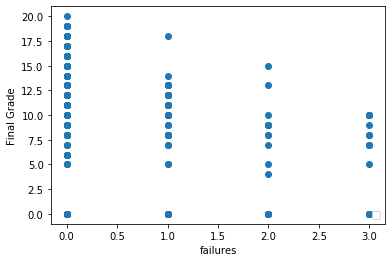

In [500]:
# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


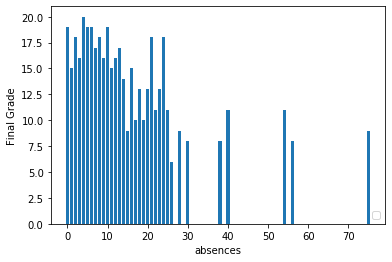

In [501]:
# Drawing and plotting model
plot = "absences"
plt.bar(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()